### 탈모 예측

<img src='./images/1.png' width='500px'>

탈모는 현대인들의 주된 고민거리가 된지 오래되었다. 그에 따라 탈모와 관련된 제품들의 시장도 커지고 있는 추세이다.  
이에 따라 이번 데이터예측의 주제는 탈모인지 아닌지를 예측해보는 것을 주제로 삼았다.  
아래는 프로젝트 진행 순서이다.

1. 이진 분류 데이터 세트 수집
2. 탐색(시각화)
3. 전처리(비중): 10% 넘으면 대체
4. 데이터 세트 분리(stratify=True)
5. GridSearchCV(DTC)
6. fit: graphviz
7. predict
8. 오차 행렬
9. proba
10. 정밀도, 재현율 수립
11. cuv -> thresholds
12. 조정
13. 테스트

### 데이터 탐색

#### 컬럼명 설명

Genetics: 개인이 탈모의 가족력이 있는지를 나타냅니다. (예/아니오)

Hormonal Changes: 개인이 호르몬 변화를 경험했는지를 나타냅니다. (예/아니오)

Medical Conditions: 탈모에 기여할 수 있는 특정 의학적 상태를 나열합니다. 알로페시아 아레아타, 갑상선 문제, 두피 감염, 건선, 피부염 등을 포함합니다.

Medications & Treatments: 탈모로 이어질 수 있는 약물 및 치료를 나열합니다. 화학 요법, 심장 약물, 항우울제, 스테로이드 등을 포함합니다.

Nutritional Deficiencies: 탈모에 기여할 수 있는 영양 결핍을 나열합니다. 철 결핍, 비타민 D 결핍, 비오틴 결핍, 오메가-3 지방산 결핍 등을 포함합니다.

Stress: 개인의 스트레스 수준을 나타냅니다. (낮음/보통/높음)

Age: 개인의 나이를 나타냅니다.

Poor Hair Care Habits: 개인이 불량한 머리 관리 습관을 실천하는지를 나타냅니다. (예/아니오)

Environmental Factors: 탈모에 기여할 수 있는 환경 요인에 노출되었는지를 나타냅니다. (예/아니오)

Smoking: 개인이 흡연하는지를 나타냅니다. (예/아니오)

Weight Loss: 개인이 심한 체중 감량을 경험했는지를 나타냅니다. (예/아니오)

Baldness (Target): 이진 변수로, 개인의 탈모 여부를 나타냅니다. 즉, 탈모가 있으면 1, 없으면 0입니다.

In [1]:
import pandas as pd
import numpy as np

hair_df = pd.read_csv('./datasets/Predict Hair Fall.csv')
hair_df

Id Genetics Hormonal Changes     Medical Conditions  \
0    133992      Yes               No                No Data   
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
4    111915       No               No              Psoriasis   
..      ...      ...              ...                    ...   
994  184367      Yes               No  Seborrheic Dermatitis   
995  164777      Yes              Yes                No Data   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                      No Data      Magnesium deficiency  Moderate   19   
1                  Antibiotics      Magnesium deficiency      High   43   
2             Antifungal Cream        Protein deficiency  Moderate   26   
3                  Antibiotics        Biotin Deficiency   Moderate   46   
4                     Accutane           Iron deficiency  Moderate   30   
..                         ...                       ...       ...  ...   
994                    Rogaine      Vitamin A Deficiency       Low   33   
995                   Accutane        Protein deficiency       Low   47   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
4                       No                   Yes     Yes           No   
..                     ...                   ...     ...          ...   
994                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss  
0            0  
1            0  
2            0  
3            0  
4            1  
..         ...  
994          1  
995          0  
996          1  
997          1  
998          1  

[999 rows x 13 columns]

In [2]:
hair_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [3]:
hair_df.duplicated().sum()

0

In [4]:
hair_df.isna().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [5]:
hair_df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [6]:
hair_df['Medical Conditions'].value_counts()

Medical Conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64

각 컬럼을 시각화.

우선 탈모인 사람만 따로 추출 후 시각화 진행

In [7]:
hair_loss_df = hair_df[hair_df['Hair Loss'] == 1]
hair_loss_df


Id Genetics Hormonal Changes     Medical Conditions  \
4    111915       No               No              Psoriasis   
5    139661      Yes               No              Psoriasis   
6    169255      Yes              Yes                No Data   
8    140785      Yes               No                 Eczema   
11   159158       No              Yes       Alopecia Areata    
..      ...      ...              ...                    ...   
992  181854      Yes              Yes             Dermatosis   
994  184367      Yes               No  Seborrheic Dermatitis   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
4                     Accutane           Iron deficiency  Moderate   30   
5                  Antibiotics      Magnesium deficiency       Low   37   
6                      No Data       Selenium deficiency      High   40   
8                     Steroids       Selenium deficiency  Moderate   19   
11                    Accutane           Zinc Deficiency      High   48   
..                         ...                       ...       ...  ...   
992                    Rogaine      Magnesium deficiency       Low   30   
994                    Rogaine      Vitamin A Deficiency       Low   33   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
4                       No                   Yes     Yes           No   
5                       No                   Yes      No          Yes   
6                      Yes                    No      No           No   
8                       No                    No     Yes          Yes   
11                      No                    No      No           No   
..                     ...                   ...     ...          ...   
992                     No                    No      No           No   
994                    Yes                   Yes     Yes          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss  
4            1  
5            1  
6            1  
8            1  
11           1  
..         ...  
992          1  
994          1  
996          1  
997          1  
998          1  

[497 rows x 13 columns]

In [8]:
no_hair_loss_df = hair_df[hair_df['Hair Loss'] == 0]
no_hair_loss_df

Id Genetics Hormonal Changes     Medical Conditions  \
0    133992      Yes               No                No Data   
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
7    112032      Yes               No             Dermatosis   
..      ...      ...              ...                    ...   
988  174574       No               No  Androgenetic Alopecia   
990  127532      Yes               No       Alopecia Areata    
991  131739       No              Yes       Thyroid Problems   
993  196218       No              Yes        Scalp Infection   
995  164777      Yes              Yes                No Data   

    Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                    No Data      Magnesium deficiency  Moderate   19   
1                Antibiotics      Magnesium deficiency      High   43   
2           Antifungal Cream        Protein deficiency  Moderate   26   
3                Antibiotics        Biotin Deficiency   Moderate   46   
7               Chemotherapy       Omega-3 fatty acids      High   35   
..                       ...                       ...       ...  ...   
988              Antibiotics                   No Data      High   23   
990         Antidepressants            Zinc Deficiency       Low   42   
991         Antidepressants            Zinc Deficiency      High   33   
993         Immunomodulators                   No Data  Moderate   23   
995                 Accutane        Protein deficiency       Low   47   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
7                      Yes                    No     Yes           No   
..                     ...                   ...     ...          ...   
988                    Yes                   Yes      No          Yes   
990                     No                   Yes     Yes           No   
991                    Yes                   Yes      No           No   
993                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   

     Hair Loss  
0            0  
1            0  
2            0  
3            0  
7            0  
..         ...  
988          0  
990          0  
991          0  
993          0  
995          0  

[502 rows x 13 columns]

#### Genetics:   
개인이 탈모의 가족력이 있는지를 나타냅니다. (예/아니오)

In [9]:
hair_df['Genetics'].value_counts()

Genetics
Yes    522
No     477
Name: count, dtype: int64

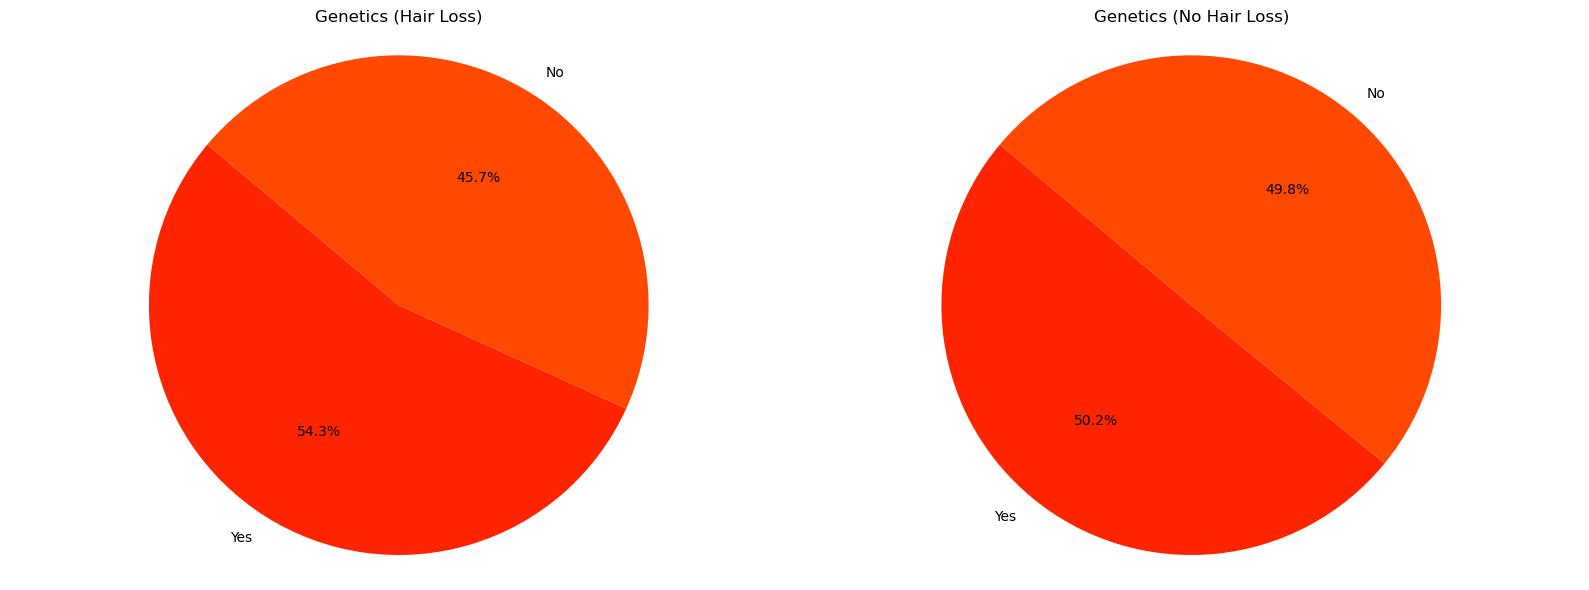

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

hair_genetics_counts = hair_loss_df['Genetics'].value_counts()
no_hair_genetics_counts = no_hair_loss_df['Genetics'].value_counts()

axes[0].pie(hair_genetics_counts, labels=hair_genetics_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[0].set_title('Genetics (Hair Loss)')
axes[0].axis('equal')  

axes[1].pie(no_hair_genetics_counts, labels=no_hair_genetics_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[1].set_title('Genetics (No Hair Loss)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

그래프를 확인한 결과, 탈모인 사람들 중 가족력으로 탈모가 있는 사람의 비율이 정상인 사람보다 4프로 가량 더 많았다.

#### Medical Conditions:   
탈모에 기여할 수 있는 특정 의학적 상태를 나열합니다.

In [11]:
order = hair_df['Medical Conditions'].value_counts().index
order

Index(['No Data', 'Alopecia Areata ', 'Psoriasis', 'Thyroid Problems',
       'Androgenetic Alopecia', 'Dermatitis', 'Dermatosis',
       'Seborrheic Dermatitis', 'Scalp Infection', 'Eczema', 'Ringworm'],
      dtype='object', name='Medical Conditions')

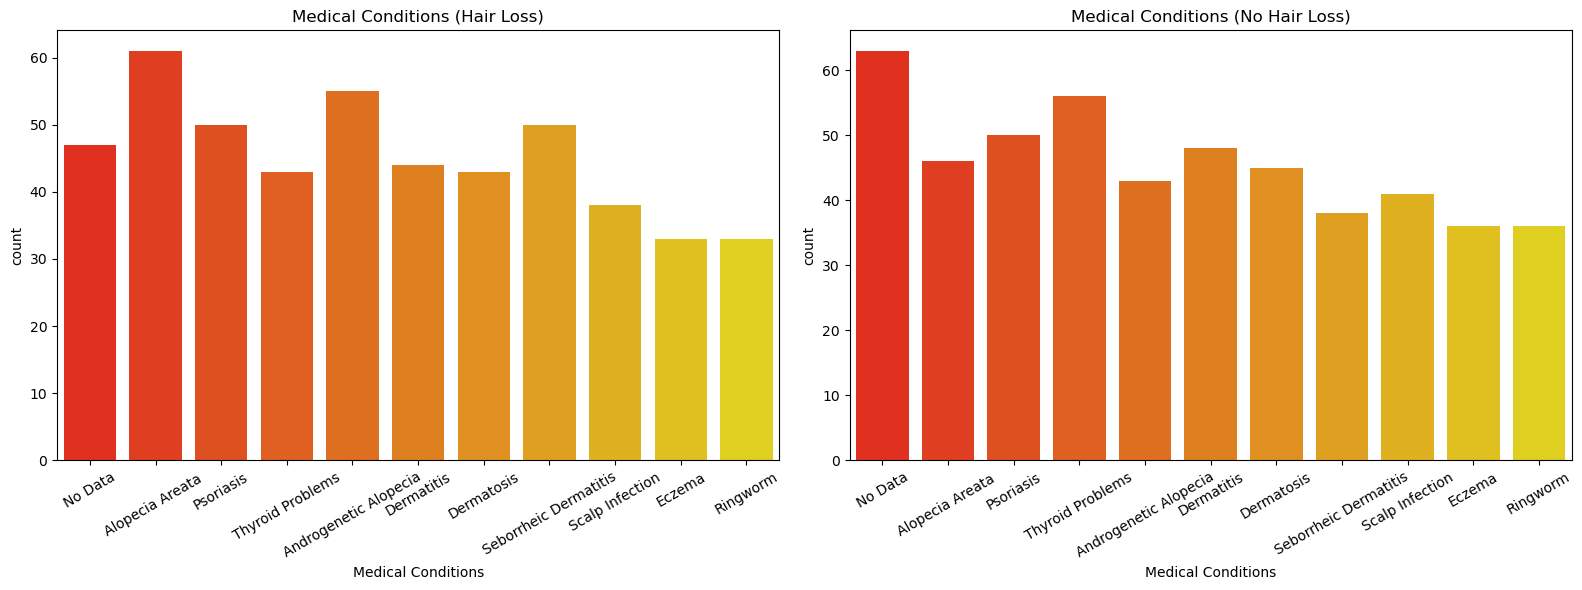

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

sns.countplot(x='Medical Conditions', data=hair_loss_df, palette='autumn', ax=axes[0], order=order)
axes[0].set_title('Medical Conditions (Hair Loss)')

sns.countplot(x='Medical Conditions', data=no_hair_loss_df, palette='autumn', ax=axes[1], order=order)
axes[1].set_title('Medical Conditions (No Hair Loss)')

for ax in axes:
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

각 설명은 다음과 같다.

- No Data - 데이터 없음  
- Alopecia Areata - 알로페시아 아레아타(면역계의 반응으로 인해 머리카락의 성장 주기가 갑작스럽게 중단되는 면역질환)
- Psoriasis - 건선(피부세포의 과도한 성장으로 인해 발생하는 만성 염증성 질환)
- Thyroid Problems - 갑상선 문제
- Androgenetic Alopecia - 남성 호르몬 유전성 탈모
- Dermatitis - 피부염
- Dermatosis - 피부질환
- Seborrheic Dermatitis - 지루성 피부염
- Scalp Infection - 두피 감염
- Eczema - 습진
- Ringworm - 백선생 질병

위에서 확인한 결과, 알로페시아 아레아타와 남성 호르몬 유전성 탈모, 건선과 지루성 피부염이 탈모 환자 중에서 제일 많은 수치를 나타내는 것을 확인할 수 있었다.  
그에 반해 정상인들은 정보가 없는 (No data)를 제외하고 갑상선 문제가 있는 사람이 제일 많았다.

#### Medications & Treatments:   
탈모로 치료하는 약물 및 치료를 나열합니다. 화학 요법, 심장 약물, 항우울제, 스테로이드 등을 포함합니다.

In [13]:
hair_loss_df['Medications & Treatments'].value_counts()

Medications & Treatments
Steroids                     59
Rogaine                      59
Antidepressants              53
Heart Medication             53
Accutane                     50
Antibiotics                  50
Chemotherapy                 46
Antifungal Cream             44
Blood Pressure Medication    42
Immunomodulators             40
No Data                       1
Name: count, dtype: int64

In [14]:
order = hair_df['Medications & Treatments'].value_counts().index

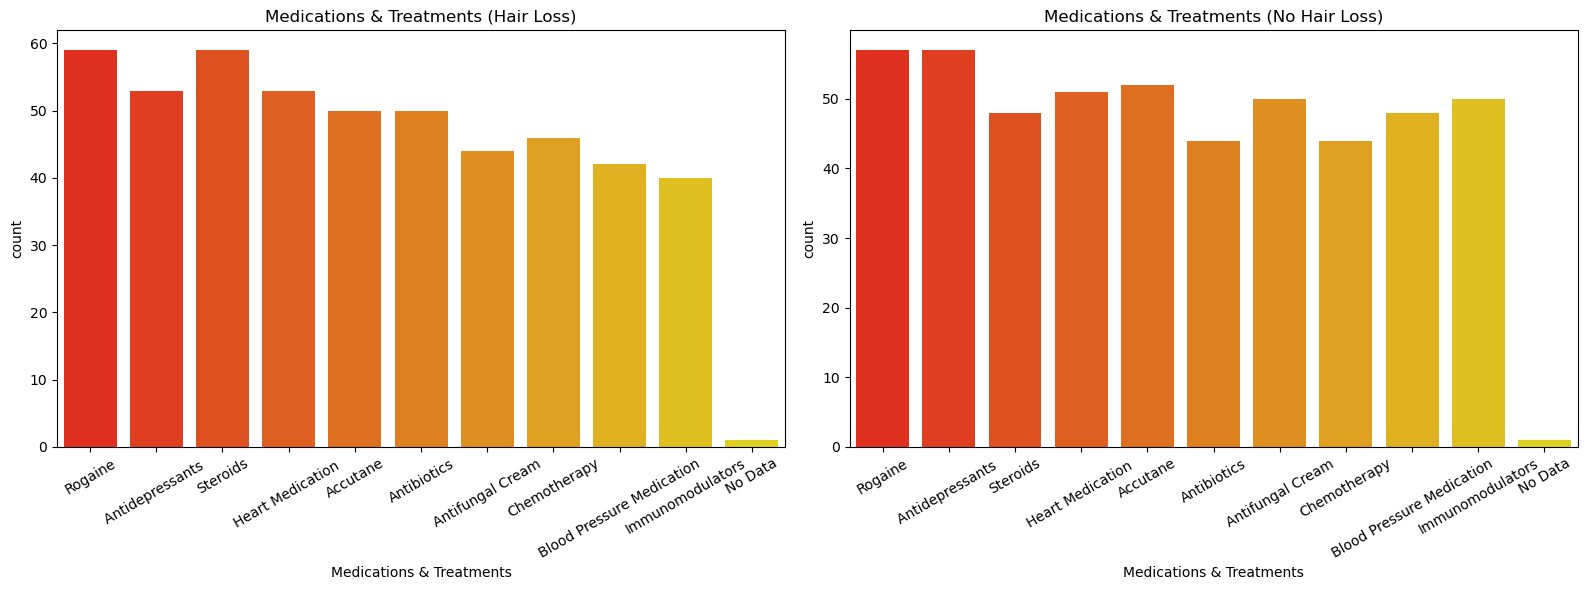

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

sns.countplot(x='Medications & Treatments', data=hair_loss_df, palette='autumn', ax=axes[0], order=order)
axes[0].set_title('Medications & Treatments (Hair Loss)')

sns.countplot(x='Medications & Treatments', data=no_hair_loss_df, palette='autumn', ax=axes[1], order=order)
axes[1].set_title('Medications & Treatments (No Hair Loss)')

for ax in axes:
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

각 설명은 다음과 같다.

- Steroids: 탈모 관련 치료로서 스테로이드를 사용하는 개인의 수입니다.
- Rogaine: 미녹시딜이라는 활성 성분을 함유한 탈모 치료제인 Rogaine을 사용하는 개인의 수입니다.
- Antidepressants: 우울증 치료를 위해 항우울제를 복용하는 개인의 수입니다.
- Heart Medication: 심장 질환 관리를 위해 복용하는 약물의 수입니다.
- Accutane: 피부 질환인 여드름 치료에 사용되는 항생제인 Accutane을 복용하는 개인의 수입니다.
- Antibiotics: 감염 치료를 위해 복용하는 항생제의 수입니다.
- Chemotherapy: 암 치료를 위해 사용되는 화학 요법을 받고 있는 개인의 수입니다.
- Antifungal Cream: 진균 감염 치료를 위해 사용되는 항진균 크림을 사용하는 개인의 수입니다.
- Blood Pressure Medication: 고혈압 관리를 위해 복용하는 약물의 수입니다.
- Immunomodulators: 면역 기능을 조절하기 위해 사용되는 약물의 수입니다.
- No Data: 해당 정보가 없는 개인의 수를 나타냅니다.

위 그래프를 확인한 결과, 탈모환자는 탈모관련된 치료약을 제일 많이 사용함을 알 수 있었다.  
정상인 사람들도 탈모치료제를 많이 사용하고 있고, 또한 항우울제를 그다음으로 많이 사용함을 알 수 있었다.

#### Nutritional Deficiencies:   
탈모에 기여할 수 있는 영양 결핍을 나열합니다. 철 결핍, 비타민 D 결핍, 비오틴 결핍, 오메가-3 지방산 결핍 등을 포함합니다.

In [16]:
hair_loss_df['Nutritional Deficiencies '].value_counts()

Nutritional Deficiencies 
Vitamin D Deficiency    52
Zinc Deficiency         51
Vitamin A Deficiency    51
Protein deficiency      47
Magnesium deficiency    46
Biotin Deficiency       46
Selenium deficiency     42
No Data                 42
Omega-3 fatty acids     42
Iron deficiency         40
Vitamin E deficiency    38
Name: count, dtype: int64

In [17]:
order = hair_df['Nutritional Deficiencies '].value_counts().index

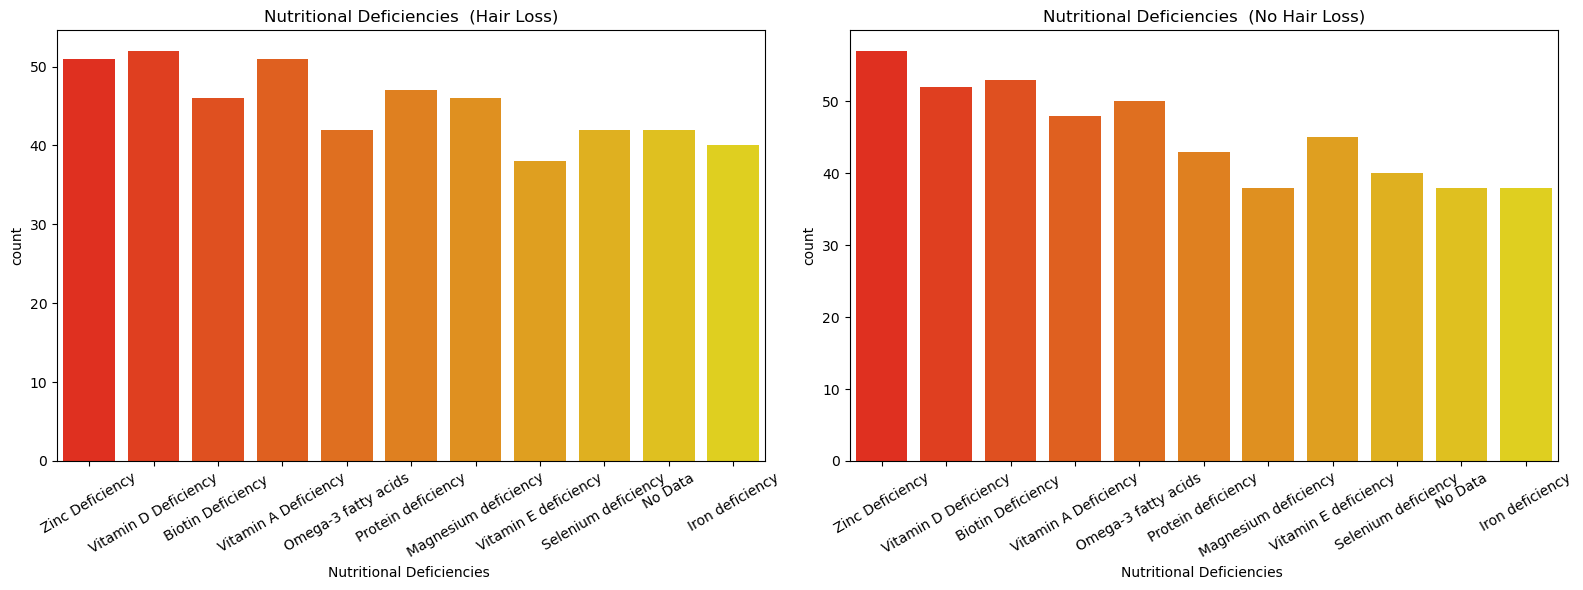

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

sns.countplot(x='Nutritional Deficiencies ', data=hair_loss_df, palette='autumn', ax=axes[0], order=order)
axes[0].set_title('Nutritional Deficiencies  (Hair Loss)')

sns.countplot(x='Nutritional Deficiencies ', data=no_hair_loss_df, palette='autumn', ax=axes[1], order=order)
axes[1].set_title('Nutritional Deficiencies  (No Hair Loss)')

for ax in axes:
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

각 설명은 다음과 같다.

- Vitamin D Deficiency: 비타민 D 결핍
- Zinc Deficiency: 아연 결핍
- Vitamin A Deficiency: 비타민 A 결핍
- Protein deficiency: 단백질 결핍
- Magnesium deficiency: 마그네슘 결핍
- Biotin Deficiency: 비오틴 결핍
- Selenium deficiency: 셀레늄 결핍
- No Data: 해당 정보가 없음
- Omega-3 fatty acids: 오메가-3 지방산
- Iron deficiency: 철 결핍
- Vitamin E deficiency: 비타민 E 결핍  

  
확인한 결과, 탈모환자는 순서대로 비타민 D, A 결핍자, 아연 결핍의 수가 가장 많은 것을 알 수 있었고 이는 각각 모발의 성장과 건강에 영향을 미치는 성분인 것을 알 수 있었다.  
그에 반해 정상인 사람도 아연 결핍, 비오틴 결핍, 비타민 D 결핍의 수가 많았다.




#### Stress:   
개인의 스트레스 수준을 나타냅니다. (낮음/보통/높음)

In [19]:
hair_loss_df['Stress'].value_counts()

Stress
Moderate    182
Low         159
High        156
Name: count, dtype: int64

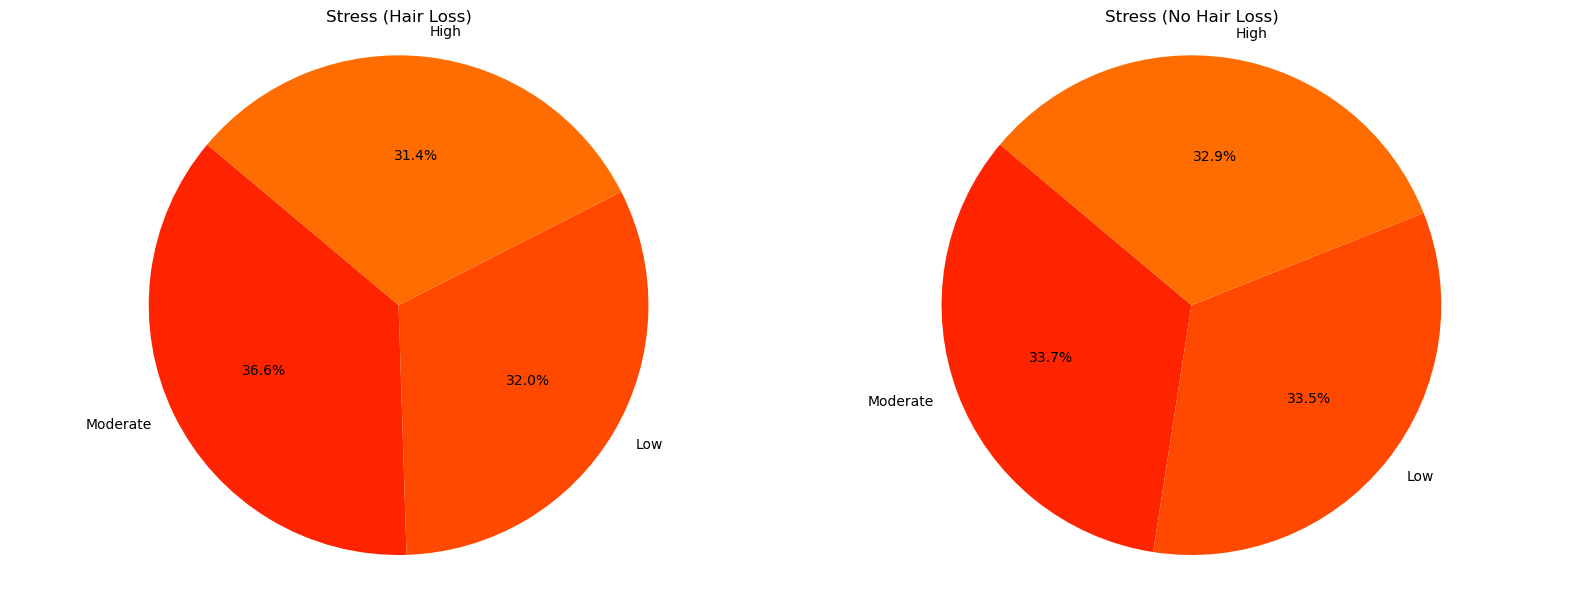

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

hair_stress_counts = hair_loss_df['Stress'].value_counts()
no_hair_stress_counts = no_hair_loss_df['Stress'].value_counts()

axes[0].pie(hair_stress_counts, labels=hair_stress_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[0].set_title('Stress (Hair Loss)')
axes[0].axis('equal')  

axes[1].pie(no_hair_stress_counts, labels=no_hair_stress_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[1].set_title('Stress (No Hair Loss)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

탈모인 사람들 중, 스트레스 지수가 중간인 사람이 36.6%로 제일 많았고 스트레스가 적은 사람이 32% 스트레스가 많은사람이 31%인 것을 알 수 있었다.  
정상인 사람들 또한 중간, 적음, 높음 순서였다.  
탈모인 사람과 정상인 사람 모두 의외로 스트레스 수치가 고르게 분포해있음을 알 수 있었다.

#### Poor Hair Care Habits:   
개인이 불량한 머리 관리 습관을 실천하는지를 나타냅니다. (예/아니오)

In [21]:
hair_loss_df['Poor Hair Care Habits '].value_counts()

Poor Hair Care Habits 
No     262
Yes    235
Name: count, dtype: int64

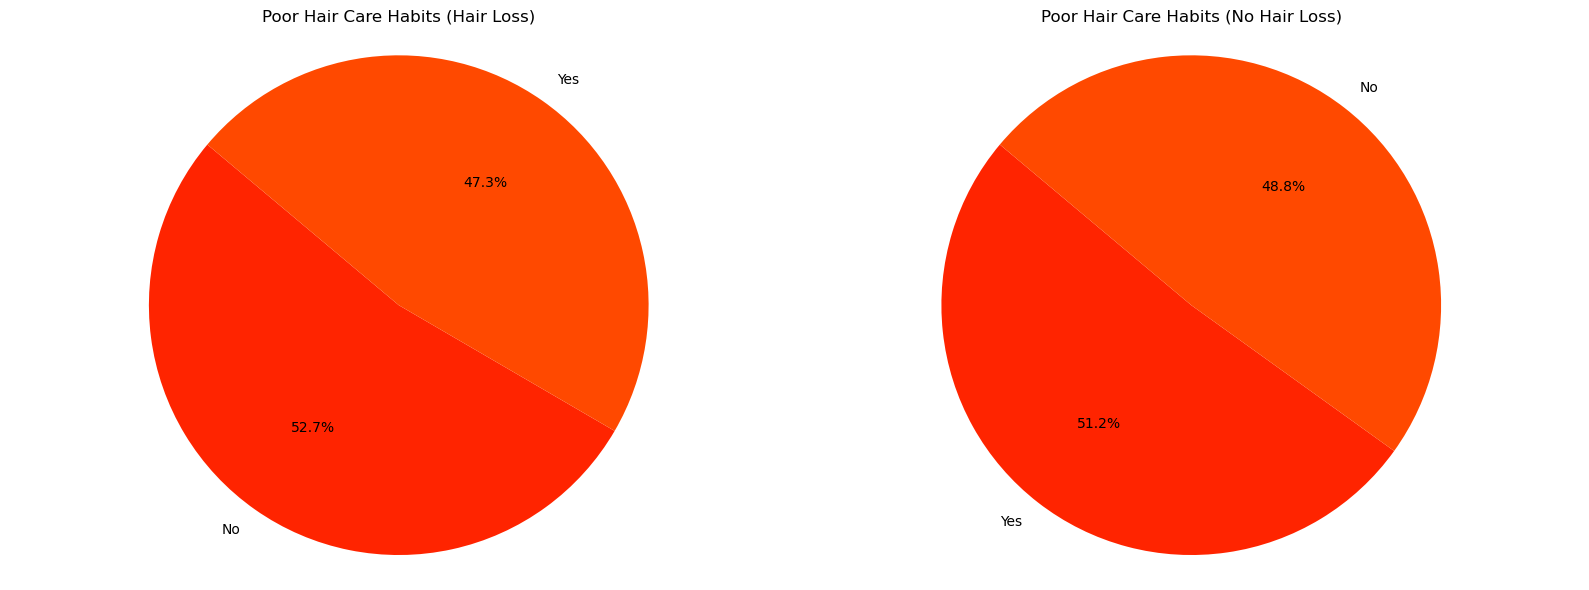

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

hair_care_counts = hair_loss_df['Poor Hair Care Habits '].value_counts()
no_hair_care_counts = no_hair_loss_df['Poor Hair Care Habits '].value_counts()

axes[0].pie(hair_care_counts, labels=hair_care_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[0].set_title('Poor Hair Care Habits (Hair Loss)')
axes[0].axis('equal')  

axes[1].pie(no_hair_care_counts, labels=no_hair_care_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[1].set_title('Poor Hair Care Habits (No Hair Loss)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

머리 관리하는 비율을 확인한 결과, 탈모인 사람들 중 머리 관리를 안하는 사람이 조금 더 많은 것을 알 수 있었다.  
정상인 사람들 또한 머리 관리를 안하는 사람이 조금 더 많았다.

#### Environmental Factors:   
탈모에 기여할 수 있는 환경 요인에 노출되었는지를 나타냅니다. (예/아니오)



In [23]:
hair_df['Environmental Factors'].value_counts()

Environmental Factors
Yes    508
No     491
Name: count, dtype: int64

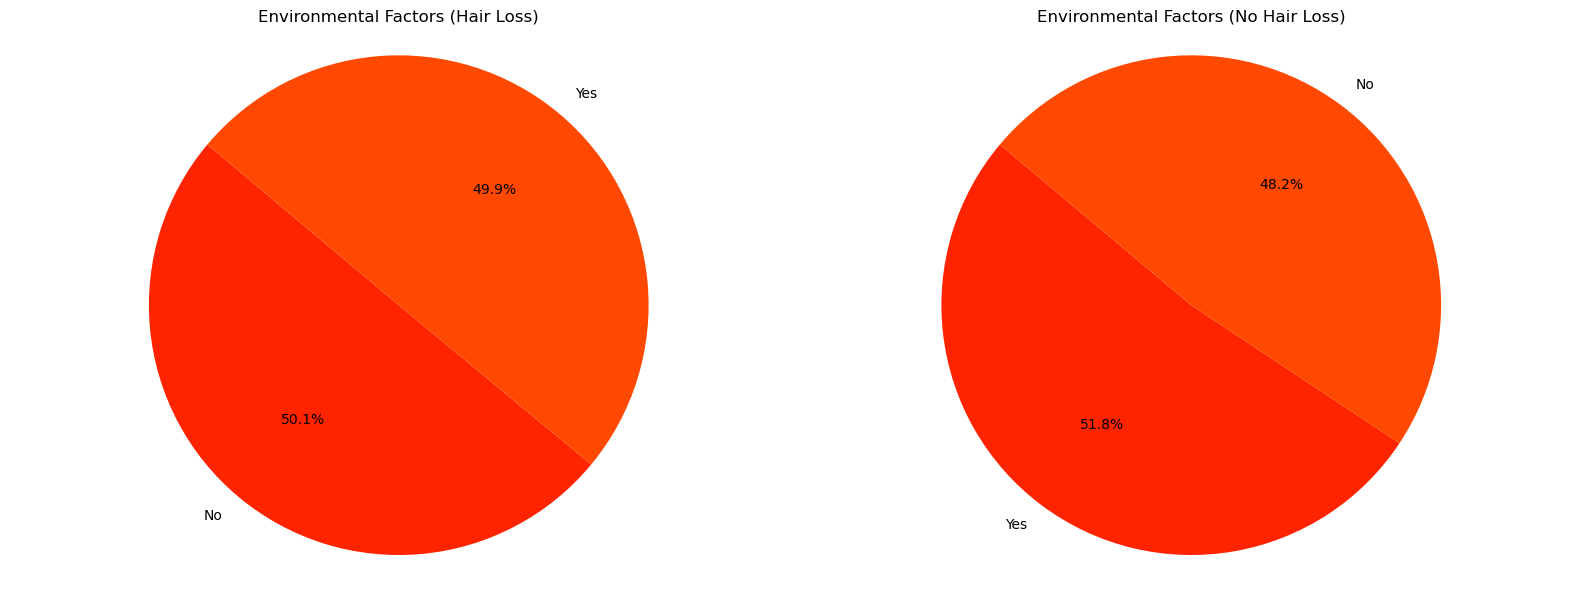

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

hair_environment_counts = hair_loss_df['Environmental Factors'].value_counts()
no_hair_environment_counts = no_hair_loss_df['Environmental Factors'].value_counts()

axes[0].pie(hair_environment_counts, labels=hair_environment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[0].set_title('Environmental Factors (Hair Loss)')
axes[0].axis('equal')  

axes[1].pie(no_hair_environment_counts, labels=no_hair_environment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[1].set_title('Environmental Factors (No Hair Loss)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

그래프를 확인한 결과, 탈모인 사람과 정상인 사람 모두 환경적 요인은 반반에 가까운 수치가 나타났다.  

#### Smoking:   
개인이 흡연하는지를 나타냅니다. (예/아니오)


In [25]:
hair_df['Smoking'].value_counts()

Smoking
Yes    519
No     480
Name: count, dtype: int64

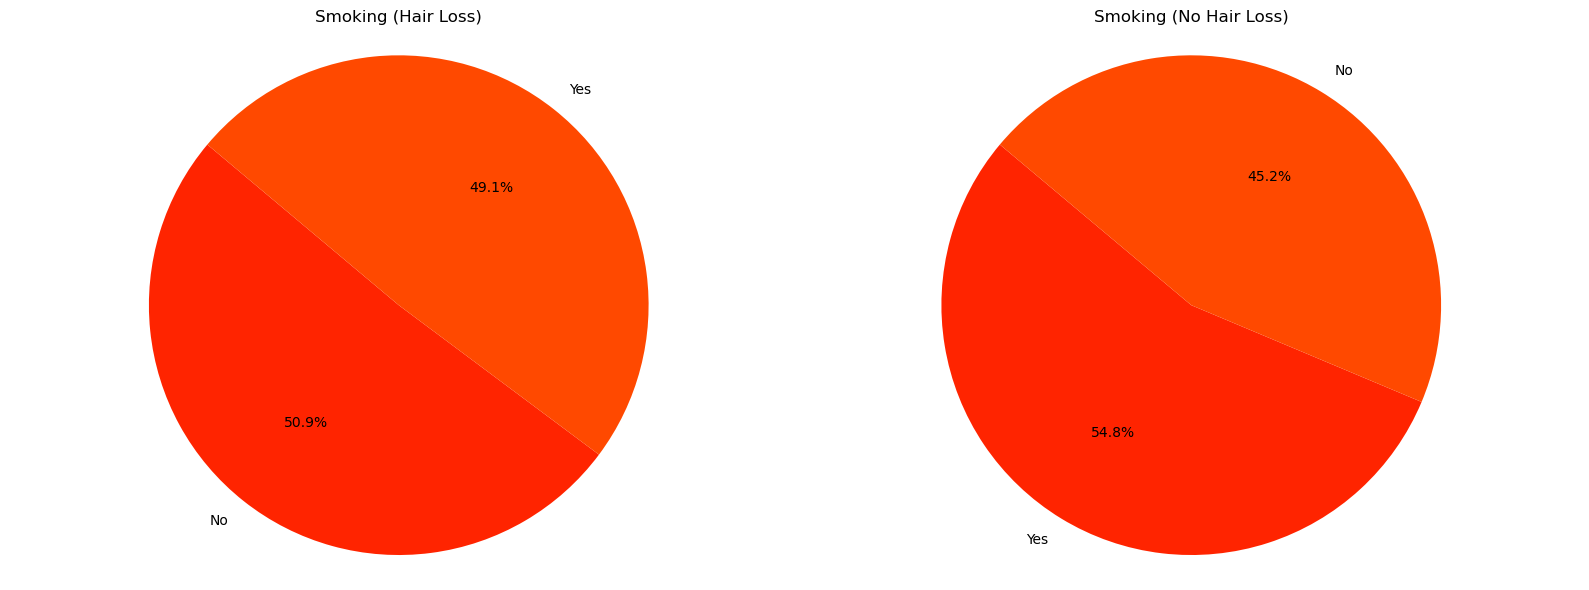

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

hair_smoking_counts = hair_loss_df['Smoking'].value_counts()
no_hair_smoking_counts = no_hair_loss_df['Smoking'].value_counts()

axes[0].pie(hair_smoking_counts, labels=hair_smoking_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[0].set_title('Smoking (Hair Loss)')
axes[0].axis('equal')  

axes[1].pie(no_hair_smoking_counts, labels=no_hair_smoking_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[1].set_title('Smoking (No Hair Loss)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

그래프를 확인한 결과, 탈모인 사람들의 흡연율이 정상인 사람들의 흡연율 보다 더 낮은 것을 알 수 있었다.

#### Weight Loss:   
개인이 심한 체중 감량을 경험했는지를 나타냅니다. (예/아니오)

In [27]:
hair_df['Weight Loss '].value_counts()

Weight Loss 
No     527
Yes    472
Name: count, dtype: int64

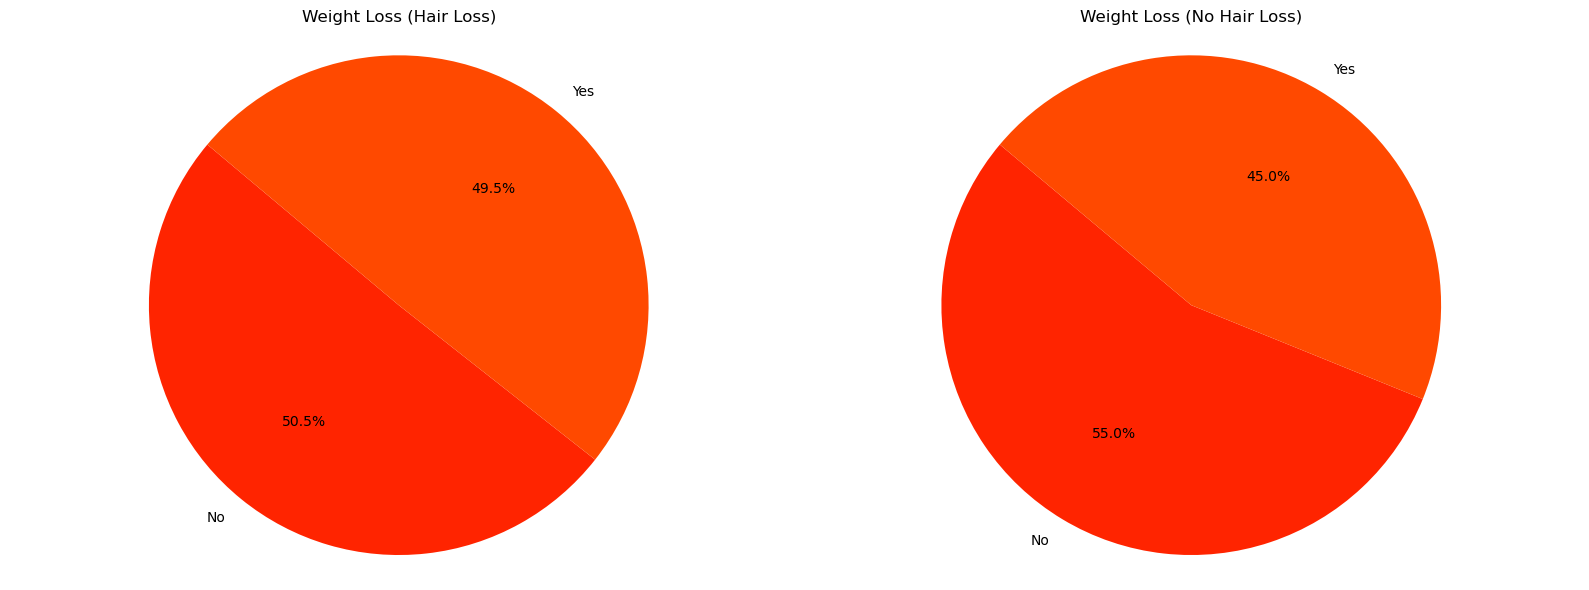

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

hair_weight_loss_counts = hair_loss_df['Weight Loss '].value_counts()
no_hair_weight_loss_counts = no_hair_loss_df['Weight Loss '].value_counts()

axes[0].pie(hair_weight_loss_counts, labels=hair_weight_loss_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[0].set_title('Weight Loss (Hair Loss)')
axes[0].axis('equal')  

axes[1].pie(no_hair_weight_loss_counts, labels=no_hair_weight_loss_counts.index, autopct='%1.1f%%', colors=sns.color_palette('autumn'), startangle=140)
axes[1].set_title('Weight Loss (No Hair Loss)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

그래프를 확인한 결과, 탈모인 사람들 중 급격한 체중 감량을 경험한 사람이 정상인 사람들 보다 더 많은 비율을 가짐을 알 수 있었다.

연령별 비교

In [29]:
hair_df.loc[hair_df['Age'] < 20, 'age_section'] = '10`s'
hair_df.loc[ (20<=hair_df['Age']) & (hair_df['Age'] < 30), 'age_section'] = '20`s'
hair_df.loc[ (30<=hair_df['Age']) & (hair_df['Age'] < 40), 'age_section'] = '30`s'
hair_df.loc[ (40<=hair_df['Age']) & (hair_df['Age'] < 50), 'age_section'] = '40`s'
hair_df.loc[ (50<=hair_df['Age']) & (hair_df['Age'] < 60), 'age_section'] = '50`s'
hair_df.loc[ (60<=hair_df['Age']) , 'age_section'] = '60`s'

hair_df

Id Genetics Hormonal Changes     Medical Conditions  \
0    133992      Yes               No                No Data   
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
4    111915       No               No              Psoriasis   
..      ...      ...              ...                    ...   
994  184367      Yes               No  Seborrheic Dermatitis   
995  164777      Yes              Yes                No Data   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                      No Data      Magnesium deficiency  Moderate   19   
1                  Antibiotics      Magnesium deficiency      High   43   
2             Antifungal Cream        Protein deficiency  Moderate   26   
3                  Antibiotics        Biotin Deficiency   Moderate   46   
4                     Accutane           Iron deficiency  Moderate   30   
..                         ...                       ...       ...  ...   
994                    Rogaine      Vitamin A Deficiency       Low   33   
995                   Accutane        Protein deficiency       Low   47   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
4                       No                   Yes     Yes           No   
..                     ...                   ...     ...          ...   
994                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss age_section  
0            0        10`s  
1            0        40`s  
2            0        20`s  
3            0        40`s  
4            1        30`s  
..         ...         ...  
994          1        30`s  
995          0        40`s  
996          1        20`s  
997          1        30`s  
998          1        30`s  

[999 rows x 14 columns]

In [30]:
Age_hair_df = hair_df.groupby('age_section')['Hair Loss'].sum().reset_index()
Age_hair_df

age_section  Hair Loss
0        10`s         33
1        20`s        147
2        30`s        169
3        40`s        141
4        50`s          7

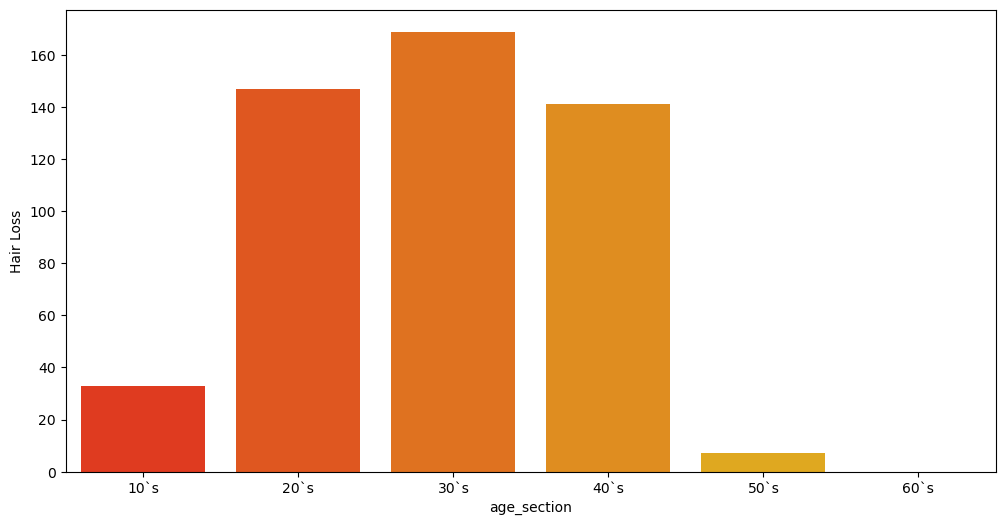

In [31]:
plt.figure(figsize=(12,6))
order = ['10`s','20`s','30`s','40`s','50`s','60`s']
sns.barplot(x='age_section', y='Hair Loss', data=Age_hair_df, palette='autumn', order=order)
plt.show()

확인한 결과, 20대, 30대, 40대에서 가장 탈모가 많이 발생하는 것을 확인하였다.

In [32]:
hair_df

Id Genetics Hormonal Changes     Medical Conditions  \
0    133992      Yes               No                No Data   
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
4    111915       No               No              Psoriasis   
..      ...      ...              ...                    ...   
994  184367      Yes               No  Seborrheic Dermatitis   
995  164777      Yes              Yes                No Data   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                      No Data      Magnesium deficiency  Moderate   19   
1                  Antibiotics      Magnesium deficiency      High   43   
2             Antifungal Cream        Protein deficiency  Moderate   26   
3                  Antibiotics        Biotin Deficiency   Moderate   46   
4                     Accutane           Iron deficiency  Moderate   30   
..                         ...                       ...       ...  ...   
994                    Rogaine      Vitamin A Deficiency       Low   33   
995                   Accutane        Protein deficiency       Low   47   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
4                       No                   Yes     Yes           No   
..                     ...                   ...     ...          ...   
994                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss age_section  
0            0        10`s  
1            0        40`s  
2            0        20`s  
3            0        40`s  
4            1        30`s  
..         ...         ...  
994          1        30`s  
995          0        40`s  
996          1        20`s  
997          1        30`s  
998          1        30`s  

[999 rows x 14 columns]

In [33]:
hair_copy = hair_df.copy()
hair_copy

Id Genetics Hormonal Changes     Medical Conditions  \
0    133992      Yes               No                No Data   
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
4    111915       No               No              Psoriasis   
..      ...      ...              ...                    ...   
994  184367      Yes               No  Seborrheic Dermatitis   
995  164777      Yes              Yes                No Data   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                      No Data      Magnesium deficiency  Moderate   19   
1                  Antibiotics      Magnesium deficiency      High   43   
2             Antifungal Cream        Protein deficiency  Moderate   26   
3                  Antibiotics        Biotin Deficiency   Moderate   46   
4                     Accutane           Iron deficiency  Moderate   30   
..                         ...                       ...       ...  ...   
994                    Rogaine      Vitamin A Deficiency       Low   33   
995                   Accutane        Protein deficiency       Low   47   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
4                       No                   Yes     Yes           No   
..                     ...                   ...     ...          ...   
994                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss age_section  
0            0        10`s  
1            0        40`s  
2            0        20`s  
3            0        40`s  
4            1        30`s  
..         ...         ...  
994          1        30`s  
995          0        40`s  
996          1        20`s  
997          1        30`s  
998          1        30`s  

[999 rows x 14 columns]

In [34]:
hair_copy = hair_copy.drop(['Id','Age'], axis=1)

In [35]:
hair_copy

Genetics Hormonal Changes     Medical Conditions  \
0        Yes               No                No Data   
1         No               No                 Eczema   
2         No               No             Dermatosis   
3        Yes              Yes               Ringworm   
4         No               No              Psoriasis   
..       ...              ...                    ...   
994      Yes               No  Seborrheic Dermatitis   
995      Yes              Yes                No Data   
996       No              Yes  Androgenetic Alopecia   
997       No              Yes             Dermatitis   
998      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  \
0                      No Data      Magnesium deficiency  Moderate   
1                  Antibiotics      Magnesium deficiency      High   
2             Antifungal Cream        Protein deficiency  Moderate   
3                  Antibiotics        Biotin Deficiency   Moderate   
4                     Accutane           Iron deficiency  Moderate   
..                         ...                       ...       ...   
994                    Rogaine      Vitamin A Deficiency       Low   
995                   Accutane        Protein deficiency       Low   
996           Antidepressants         Protein deficiency  Moderate   
997           Immunomodulators        Biotin Deficiency   Moderate   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
4                       No                   Yes     Yes           No   
..                     ...                   ...     ...          ...   
994                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss age_section  
0            0        10`s  
1            0        40`s  
2            0        20`s  
3            0        40`s  
4            1        30`s  
..         ...         ...  
994          1        30`s  
995          0        40`s  
996          1        20`s  
997          1        30`s  
998          1        30`s  

[999 rows x 12 columns]

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
def translate(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [38]:
hair_copy['Genetics'] = hair_copy['Genetics'].apply(translate)

In [39]:
hair_copy['Genetics'].value_counts()

Genetics
1    522
0    477
Name: count, dtype: int64

In [40]:
hair_copy['Hormonal Changes'] = hair_copy['Hormonal Changes'].apply(translate)

In [41]:
hair_copy['Hormonal Changes'].value_counts()


Hormonal Changes
1    509
0    490
Name: count, dtype: int64

In [42]:
hair_copy['Poor Hair Care Habits '] = hair_copy['Poor Hair Care Habits '].apply(translate)
hair_copy['Poor Hair Care Habits '].value_counts()

Poor Hair Care Habits 
0    507
1    492
Name: count, dtype: int64

In [43]:
hair_copy['Environmental Factors'] = hair_copy['Environmental Factors'].apply(translate)
hair_copy['Environmental Factors'].value_counts()

Environmental Factors
1    508
0    491
Name: count, dtype: int64

In [44]:
hair_copy['Smoking'] = hair_copy['Smoking'].apply(translate)
hair_copy['Smoking'].value_counts()

Smoking
1    519
0    480
Name: count, dtype: int64

In [45]:
hair_copy['Weight Loss '] = hair_copy['Weight Loss '].apply(translate)
hair_copy['Weight Loss '].value_counts()

Weight Loss 
0    527
1    472
Name: count, dtype: int64

In [46]:
hair_copy

Genetics  Hormonal Changes     Medical Conditions  \
0           1                 0                No Data   
1           0                 0                 Eczema   
2           0                 0             Dermatosis   
3           1                 1               Ringworm   
4           0                 0              Psoriasis   
..        ...               ...                    ...   
994         1                 0  Seborrheic Dermatitis   
995         1                 1                No Data   
996         0                 1  Androgenetic Alopecia   
997         0                 1             Dermatitis   
998         1                 1              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  \
0                      No Data      Magnesium deficiency  Moderate   
1                  Antibiotics      Magnesium deficiency      High   
2             Antifungal Cream        Protein deficiency  Moderate   
3                  Antibiotics        Biotin Deficiency   Moderate   
4                     Accutane           Iron deficiency  Moderate   
..                         ...                       ...       ...   
994                    Rogaine      Vitamin A Deficiency       Low   
995                   Accutane        Protein deficiency       Low   
996           Antidepressants         Protein deficiency  Moderate   
997           Immunomodulators        Biotin Deficiency   Moderate   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   

     Poor Hair Care Habits   Environmental Factors  Smoking  Weight Loss   \
0                         1                      1        0             0   
1                         1                      1        0             0   
2                         1                      1        0             1   
3                         1                      1        0             0   
4                         0                      1        1             0   
..                      ...                    ...      ...           ...   
994                       1                      1        1             1   
995                       0                      0        0             1   
996                       1                      0        1             1   
997                       1                      1        1             1   
998                       0                      1        0             0   

     Hair Loss age_section  
0            0        10`s  
1            0        40`s  
2            0        20`s  
3            0        40`s  
4            1        30`s  
..         ...         ...  
994          1        30`s  
995          0        40`s  
996          1        20`s  
997          1        30`s  
998          1        30`s  

[999 rows x 12 columns]

In [47]:
medical_encoder = LabelEncoder()
targets = medical_encoder.fit_transform(hair_copy['Medical Conditions'].tolist())
hair_copy['Medical Conditions'] = targets

treatment_encoder = LabelEncoder()
targets = treatment_encoder.fit_transform(hair_copy['Medications & Treatments'].tolist())
hair_copy['Medications & Treatments'] = targets

nutrition_encoder = LabelEncoder()
targets = nutrition_encoder.fit_transform(hair_copy['Nutritional Deficiencies '].tolist())
hair_copy['Nutritional Deficiencies '] = targets

stress_encoder = LabelEncoder()
targets = stress_encoder.fit_transform(hair_copy['Stress'].tolist())
hair_copy['Stress'] = targets

age_encoder = LabelEncoder()
targets = age_encoder.fit_transform(hair_copy['age_section'].tolist())
hair_copy['age_section'] = targets

hair_copy

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0                   5                         8   
1           0                 0                   4                         1   
2           0                 0                   3                         3   
3           1                 1                   7                         1   
4           0                 0                   6                         0   
..        ...               ...                 ...                       ...   
994         1                 0                   9                         9   
995         1                 1                   5                         0   
996         0                 1                   1                         2   
997         0                 1                   2                         7   
998         1                 1                   6                         4   

     Nutritional Deficiencies   Stress  Poor Hair Care Habits   \
0                            2       2                       1   
1                            2       0                       1   
2                            5       2                       1   
3                            0       2                       1   
4                            1       2                       0   
..                         ...     ...                     ...   
994                          7       1                       1   
995                          5       1                       0   
996                          5       2                       1   
997                          0       2                       1   
998                          8       1                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  age_section  
0                        1        0             0          0            0  
1                        1        0             0          0            3  
2                        1        0             1          0            1  
3                        1        0             0          0            3  
4                        1        1             0          1            2  
..                     ...      ...           ...        ...          ...  
994                      1        1             1          1            2  
995                      0        0             1          0            3  
996                      0        1             1          1            1  
997                      1        1             1          1            2  
998                      1        0             0          1            2  

[999 rows x 12 columns]

In [48]:
hair_copy['Hair Loss'], hair_copy['age_section'] = hair_copy['age_section'], hair_copy['Hair Loss']
hair_copy

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0                   5                         8   
1           0                 0                   4                         1   
2           0                 0                   3                         3   
3           1                 1                   7                         1   
4           0                 0                   6                         0   
..        ...               ...                 ...                       ...   
994         1                 0                   9                         9   
995         1                 1                   5                         0   
996         0                 1                   1                         2   
997         0                 1                   2                         7   
998         1                 1                   6                         4   

     Nutritional Deficiencies   Stress  Poor Hair Care Habits   \
0                            2       2                       1   
1                            2       0                       1   
2                            5       2                       1   
3                            0       2                       1   
4                            1       2                       0   
..                         ...     ...                     ...   
994                          7       1                       1   
995                          5       1                       0   
996                          5       2                       1   
997                          0       2                       1   
998                          8       1                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  age_section  
0                        1        0             0          0            0  
1                        1        0             0          3            0  
2                        1        0             1          1            0  
3                        1        0             0          3            0  
4                        1        1             0          2            1  
..                     ...      ...           ...        ...          ...  
994                      1        1             1          2            1  
995                      0        0             1          3            0  
996                      0        1             1          1            1  
997                      1        1             1          2            1  
998                      1        0             0          2            1  

[999 rows x 12 columns]

In [49]:
# 열의 순서 변경 및 이름 변경
hair_copy = hair_copy.rename(columns={'age_section': 'Hair Loss', 'Hair Loss': 'age_section'})


In [50]:
hair_copy

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0                   5                         8   
1           0                 0                   4                         1   
2           0                 0                   3                         3   
3           1                 1                   7                         1   
4           0                 0                   6                         0   
..        ...               ...                 ...                       ...   
994         1                 0                   9                         9   
995         1                 1                   5                         0   
996         0                 1                   1                         2   
997         0                 1                   2                         7   
998         1                 1                   6                         4   

     Nutritional Deficiencies   Stress  Poor Hair Care Habits   \
0                            2       2                       1   
1                            2       0                       1   
2                            5       2                       1   
3                            0       2                       1   
4                            1       2                       0   
..                         ...     ...                     ...   
994                          7       1                       1   
995                          5       1                       0   
996                          5       2                       1   
997                          0       2                       1   
998                          8       1                       0   

     Environmental Factors  Smoking  Weight Loss   age_section  Hair Loss  
0                        1        0             0            0          0  
1                        1        0             0            3          0  
2                        1        0             1            1          0  
3                        1        0             0            3          0  
4                        1        1             0            2          1  
..                     ...      ...           ...          ...        ...  
994                      1        1             1            2          1  
995                      0        0             1            3          0  
996                      0        1             1            1          1  
997                      1        1             1            2          1  
998                      1        0             0            2          1  

[999 rows x 12 columns]

In [51]:
hair_dtc01_graph.render(filename='hair_dtc01', directory='./images', format='png')

NameError: name 'hair_dtc01_graph' is not defined

<img src='./images/hair_dtc01.png'>

In [52]:
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

NameError: name 'dtc' is not defined

In [54]:
pre_h_df = hair_copy.copy()
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0                   5                         8   
1           0                 0                   4                         1   
2           0                 0                   3                         3   
3           1                 1                   7                         1   
4           0                 0                   6                         0   
..        ...               ...                 ...                       ...   
994         1                 0                   9                         9   
995         1                 1                   5                         0   
996         0                 1                   1                         2   
997         0                 1                   2                         7   
998         1                 1                   6                         4   

     Nutritional Deficiencies   Stress  Poor Hair Care Habits   \
0                            2       2                       1   
1                            2       0                       1   
2                            5       2                       1   
3                            0       2                       1   
4                            1       2                       0   
..                         ...     ...                     ...   
994                          7       1                       1   
995                          5       1                       0   
996                          5       2                       1   
997                          0       2                       1   
998                          8       1                       0   

     Environmental Factors  Smoking  Weight Loss   age_section  Hair Loss  
0                        1        0             0            0          0  
1                        1        0             0            3          0  
2                        1        0             1            1          0  
3                        1        0             0            3          0  
4                        1        1             0            2          1  
..                     ...      ...           ...          ...        ...  
994                      1        1             1            2          1  
995                      0        0             1            3          0  
996                      0        1             1            1          1  
997                      1        1             1            2          1  
998                      1        0             0            2          1  

[999 rows x 12 columns]

상관관계확인

In [55]:
corr = pre_h_df.corr()
corr

Genetics  Hormonal Changes  Medical Conditions  \
Genetics                   1.000000         -0.007873           -0.002579   
Hormonal Changes          -0.007873          1.000000           -0.035173   
Medical Conditions        -0.002579         -0.035173            1.000000   
Medications & Treatments  -0.004259         -0.023214            0.024766   
Nutritional Deficiencies  -0.003709          0.056749            0.023830   
Stress                     0.037469          0.045721           -0.052580   
Poor Hair Care Habits     -0.012351         -0.050780            0.000653   
Environmental Factors      0.030300         -0.051391            0.066299   
Smoking                   -0.032848          0.022302           -0.002813   
Weight Loss               -0.006546         -0.054100            0.010870   
age_section               -0.038562         -0.054059            0.045006   
Hair Loss                  0.041309          0.007104           -0.042295   

                           Medications & Treatments  \
Genetics                                  -0.004259   
Hormonal Changes                          -0.023214   
Medical Conditions                         0.024766   
Medications & Treatments                   1.000000   
Nutritional Deficiencies                  -0.029688   
Stress                                     0.045683   
Poor Hair Care Habits                      0.024702   
Environmental Factors                      0.003860   
Smoking                                    0.056599   
Weight Loss                               -0.001946   
age_section                               -0.011583   
Hair Loss                                  0.018535   

                           Nutritional Deficiencies     Stress  \
Genetics                                   -0.003709  0.037469   
Hormonal Changes                            0.056749  0.045721   
Medical Conditions                          0.023830 -0.052580   
Medications & Treatments                   -0.029688  0.045683   
Nutritional Deficiencies                    1.000000 -0.038244   
Stress                                     -0.038244  1.000000   
Poor Hair Care Habits                      -0.032629  0.029865   
Environmental Factors                      -0.005486 -0.039711   
Smoking                                     0.012170  0.067014   
Weight Loss                                 0.018544 -0.032228   
age_section                                 0.067300  0.009244   
Hair Loss                                  -0.014407  0.027052   

                           Poor Hair Care Habits   Environmental Factors  \
Genetics                                -0.012351               0.030300   
Hormonal Changes                        -0.050780              -0.051391   
Medical Conditions                       0.000653               0.066299   
Medications & Treatments                 0.024702               0.003860   
Nutritional Deficiencies                -0.032629              -0.005486   
Stress                                   0.029865              -0.039711   
Poor Hair Care Habits                    1.000000               0.063335   
Environmental Factors                    0.063335               1.000000   
Smoking                                  0.005596               0.012360   
Weight Loss                             -0.001831              -0.004075   
age_section                              0.039995               0.000832   
Hair Loss                               -0.039119              -0.018937   

                            Smoking  Weight Loss   age_section  Hair Loss  
Genetics                  -0.032848     -0.006546    -0.038562   0.041309  
Hormonal Changes           0.022302     -0.054100    -0.054059   0.007104  
Medical Conditions        -0.002813      0.010870     0.045006  -0.042295  
Medications & Treatments   0.056599     -0.001946    -0.011583   0.018535  
Nutritional Deficiencies   0.012170      0.018544     0.067300  -0.014407  
Stres

In [56]:
corr.iloc[:,-1]

Genetics                     0.041309
Hormonal Changes             0.007104
Medical Conditions          -0.042295
Medications & Treatments     0.018535
Nutritional Deficiencies    -0.014407
Stress                       0.027052
Poor Hair Care Habits       -0.039119
Environmental Factors       -0.018937
Smoking                     -0.056906
Weight Loss                  0.044838
age_section                 -0.069477
Hair Loss                    1.000000
Name: Hair Loss, dtype: float64

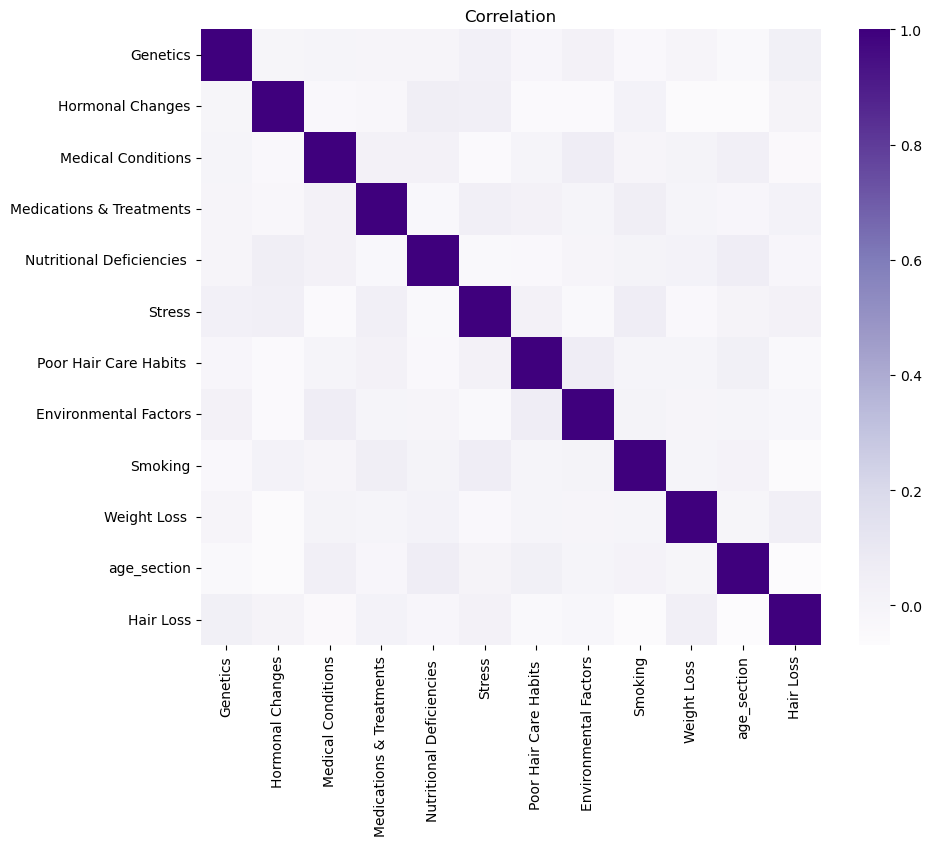

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,8))
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

상관관계를 확인하니 전체 feature를 다 가지고 훈련하기로 결정

array([[<Axes: title={'center': 'Genetics'}>,
        <Axes: title={'center': 'Hormonal Changes'}>,
        <Axes: title={'center': 'Medical Conditions'}>],
       [<Axes: title={'center': 'Medications & Treatments'}>,
        <Axes: title={'center': 'Nutritional Deficiencies '}>,
        <Axes: title={'center': 'Stress'}>],
       [<Axes: title={'center': 'Poor Hair Care Habits '}>,
        <Axes: title={'center': 'Environmental Factors'}>,
        <Axes: title={'center': 'Smoking'}>],
       [<Axes: title={'center': 'Weight Loss '}>,
        <Axes: title={'center': 'age_section'}>,
        <Axes: title={'center': 'Hair Loss'}>]], dtype=object)

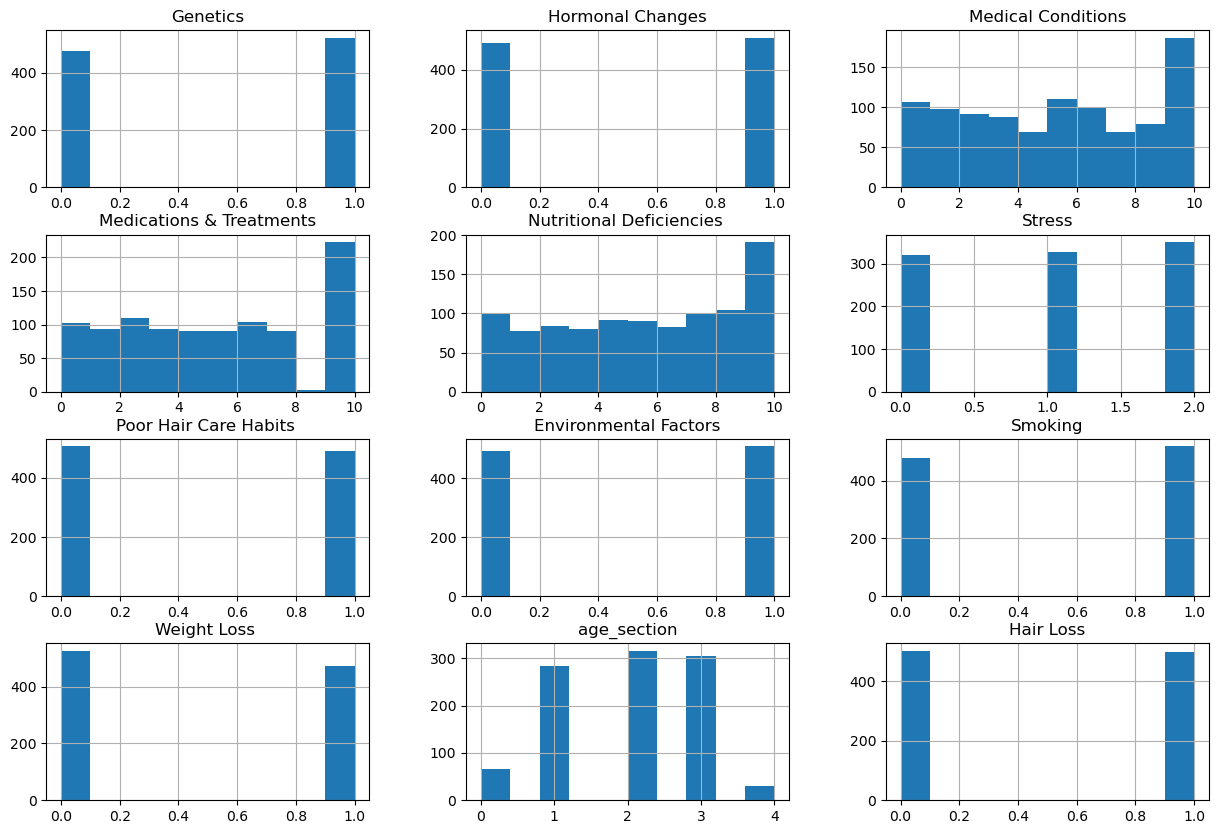

In [58]:
pre_h_df.hist(figsize=(15,10))

오차행렬 & 그래프 함수 선언

In [59]:
# 오차행렬 출력 함수
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [60]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
#roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [61]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def precision_recall_f1_curve_plot(y_test , proba_class1, threshold=0.5):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    plt.plot(thresholds, f1_scores[0:threshold_boundary], linestyle='--', label='f1 Score')

    # Threshold가 0.5인 선 추가
    plt.axvline(x=threshold, color='red', linestyle=':', label='Threshold: {}'.format(threshold))
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall and F1 Score')
    plt.legend()
    plt.grid()
    plt.show()
    



이상치 제거 

In [62]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_h = std.fit_transform(pre_h_df.iloc[:, :-1])
std_pre_h_df = pd.DataFrame(std_pre_h, columns = pre_h_df.iloc[:, :-1].columns)
std_pre_h_df['Hair Loss'] = pre_h_df['Hair Loss']
std_pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0    0.955925         -1.019203            0.039004                  0.989552   
1   -1.046107         -1.019203           -0.270243                 -1.171578   
2   -1.046107         -1.019203           -0.579490                 -0.554112   
3    0.955925          0.981158            0.657498                 -1.171578   
4   -1.046107         -1.019203            0.348251                 -1.480310   
..        ...               ...                 ...                       ...   
994  0.955925         -1.019203            1.275992                  1.298285   
995  0.955925          0.981158            0.039004                 -1.480310   
996 -1.046107          0.981158           -1.197984                 -0.862845   
997 -1.046107          0.981158           -0.888737                  0.680819   
998  0.955925          0.981158            0.348251                 -0.245379   

     Nutritional Deficiencies     Stress  Poor Hair Care Habits   \
0                    -0.981539  1.183444                1.015129   
1                    -0.981539 -1.256722                1.015129   
2                    -0.047675  1.183444                1.015129   
3                    -1.604115  1.183444                1.015129   
4                    -1.292827  1.183444               -0.985096   
..                         ...       ...                     ...   
994                   0.574901 -0.036639                1.015129   
995                  -0.047675 -0.036639               -0.985096   
996                  -0.047675  1.183444                1.015129   
997                  -1.604115  1.183444                1.015129   
998                   0.886190 -0.036639               -0.985096   

     Environmental Factors   Smoking  Weight Loss   age_section  Hair Loss  
0                 0.983125 -1.039832     -0.946380    -1.985328          0  
1                 0.983125 -1.039832     -0.946380     1.065968          0  
2                 0.983125 -1.039832      1.056658    -0.968229          0  
3                 0.983125 -1.039832     -0.946380     1.065968          0  
4                 0.983125  0.961694     -0.946380     0.048870          1  
..                     ...       ...           ...          ...        ...  
994               0.983125  0.961694      1.056658     0.048870          1  
995              -1.017164 -1.039832      1.056658     1.065968          0  
996              -1.017164  0.961694      1.056658    -0.968229          1  
997               0.983125  0.961694      1.056658     0.048870          1  
998               0.983125 -1.039832     -0.946380     0.048870          1  

[999 rows x 12 columns]

In [63]:
std_pre_h_df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'age_section', 'Hair Loss'],
      dtype='object')

In [64]:
columns = ['Genetics',
           'Hormonal Changes',
           'Medical Conditions',
           'Medications & Treatments',
           'Nutritional Deficiencies ',
           'Stress',
           'Poor Hair Care Habits ',
           'Environmental Factors',
           'Smoking',
           'Weight Loss ',
           'age_section']

for column in columns:
    print(f'{column}: {std_pre_h_df[~std_pre_h_df[column].between(-1.96, 1.96)].shape[0]}건')

Genetics: 0건
Hormonal Changes: 0건
Medical Conditions: 0건
Medications & Treatments: 0건
Nutritional Deficiencies : 0건
Stress: 0건
Poor Hair Care Habits : 0건
Environmental Factors: 0건
Smoking: 0건
Weight Loss : 0건
age_section: 95건


In [65]:
for column in columns:
    std_pre_h_df.drop(
        std_pre_h_df[~std_pre_h_df[column].between(-1.96, 1.96)].index,
        axis=0,
        inplace=True
    )

In [66]:
columns = ['Genetics',
           'Hormonal Changes',
           'Medical Conditions',
           'Medications & Treatments',
           'Nutritional Deficiencies ',
           'Stress',
           'Poor Hair Care Habits ',
           'Environmental Factors',
           'Smoking',
           'Weight Loss ',
           'age_section']

for column in columns:
    print(f'{column}: {std_pre_h_df[~std_pre_h_df[column].between(-1.96, 1.96)].shape[0]}건')

Genetics: 0건
Hormonal Changes: 0건
Medical Conditions: 0건
Medications & Treatments: 0건
Nutritional Deficiencies : 0건
Stress: 0건
Poor Hair Care Habits : 0건
Environmental Factors: 0건
Smoking: 0건
Weight Loss : 0건
age_section: 0건


In [67]:
pre_h_df = pre_h_df.iloc[std_pre_h_df.index].reset_index(drop=True)
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           0                 0                   4                         1   
1           0                 0                   3                         3   
2           1                 1                   7                         1   
3           0                 0                   6                         0   
4           1                 0                   6                         1   
..        ...               ...                 ...                       ...   
899         1                 0                   9                         9   
900         1                 1                   5                         0   
901         0                 1                   1                         2   
902         0                 1                   2                         7   
903         1                 1                   6                         4   

     Nutritional Deficiencies   Stress  Poor Hair Care Habits   \
0                            2       0                       1   
1                            5       2                       1   
2                            0       2                       1   
3                            1       2                       0   
4                            2       1                       0   
..                         ...     ...                     ...   
899                          7       1                       1   
900                          5       1                       0   
901                          5       2                       1   
902                          0       2                       1   
903                          8       1                       0   

     Environmental Factors  Smoking  Weight Loss   age_section  Hair Loss  
0                        1        0             0            3          0  
1                        1        0             1            1          0  
2                        1        0             0            3          0  
3                        1        1             0            2          1  
4                        1        0             1            2          1  
..                     ...      ...           ...          ...        ...  
899                      1        1             1            2          1  
900                      0        0             1            3          0  
901                      0        1             1            1          1  
902                      1        1             1            2          1  
903                      1        0             0            2          1  

[904 rows x 12 columns]

array([[<Axes: title={'center': 'Genetics'}>,
        <Axes: title={'center': 'Hormonal Changes'}>,
        <Axes: title={'center': 'Medical Conditions'}>],
       [<Axes: title={'center': 'Medications & Treatments'}>,
        <Axes: title={'center': 'Nutritional Deficiencies '}>,
        <Axes: title={'center': 'Stress'}>],
       [<Axes: title={'center': 'Poor Hair Care Habits '}>,
        <Axes: title={'center': 'Environmental Factors'}>,
        <Axes: title={'center': 'Smoking'}>],
       [<Axes: title={'center': 'Weight Loss '}>,
        <Axes: title={'center': 'age_section'}>,
        <Axes: title={'center': 'Hair Loss'}>]], dtype=object)

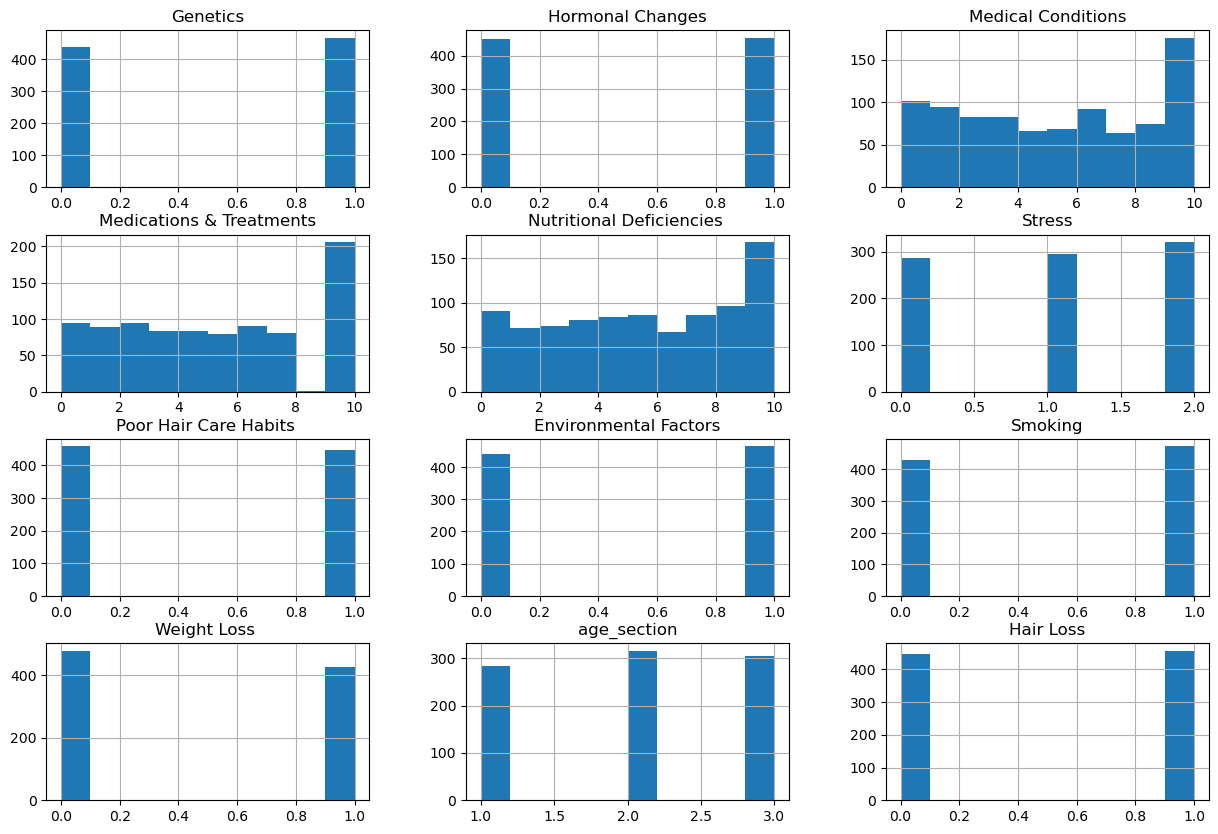

In [68]:
pre_h_df.hist(figsize=(15,10))

In [69]:
pre_h_df['Hair Loss'].value_counts()

Hair Loss
1    457
0    447
Name: count, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features, targets = pre_h_df.iloc[:,:-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

Hair Loss
0    365
1    365
Name: count, dtype: int64

---------------
### **DTC 적용**

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dtc_parameters = {'max_depth': [13,14,15,16,17,18], 'min_samples_split' : [5,6,7,8,9,10]}

dtc = DecisionTreeClassifier()
g_dtc = GridSearchCV(dtc, param_grid= dtc_parameters, cv=5, refit=True, return_train_score=True)



In [72]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [13, 14, 15, 16, 17, 18],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [73]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)


params  mean_test_score  \
0    {'max_depth': 13, 'min_samples_split': 5}         0.523288   
1    {'max_depth': 13, 'min_samples_split': 6}         0.502740   
2    {'max_depth': 13, 'min_samples_split': 7}         0.502740   
3    {'max_depth': 13, 'min_samples_split': 8}         0.494521   
4    {'max_depth': 13, 'min_samples_split': 9}         0.491781   
5   {'max_depth': 13, 'min_samples_split': 10}         0.500000   
6    {'max_depth': 14, 'min_samples_split': 5}         0.508219   
7    {'max_depth': 14, 'min_samples_split': 6}         0.517808   
8    {'max_depth': 14, 'min_samples_split': 7}         0.509589   
9    {'max_depth': 14, 'min_samples_split': 8}         0.490411   
10   {'max_depth': 14, 'min_samples_split': 9}         0.480822   
11  {'max_depth': 14, 'min_samples_split': 10}         0.500000   
12   {'max_depth': 15, 'min_samples_split': 5}         0.512329   
13   {'max_depth': 15, 'min_samples_split': 6}         0.512329   
14   {'max_depth': 15, 'min_samples_split': 7}         0.519178   
15   {'max_depth': 15, 'min_samples_split': 8}         0.497260   
16   {'max_depth': 15, 'min_samples_split': 9}         0.501370   
17  {'max_depth': 15, 'min_samples_split': 10}         0.497260   
18   {'max_depth': 16, 'min_samples_split': 5}         0.502740   
19   {'max_depth': 16, 'min_samples_split': 6}         0.510959   
20   {'max_depth': 16, 'min_samples_split': 7}         0.512329   
21   {'max_depth': 16, 'min_samples_split': 8}         0.502740   
22   {'max_depth': 16, 'min_samples_split': 9}         0.501370   
23  {'max_depth': 16, 'min_samples_split': 10}         0.501370   
24   {'max_depth': 17, 'min_samples_split': 5}         0.500000   
25   {'max_depth': 17, 'min_samples_split': 6}         0.517808   
26   {'max_depth': 17, 'min_samples_split': 7}         0.506849   
27   {'max_depth': 17, 'min_samples_split': 8}         0.495890   
28   {'max_depth': 17, 'min_samples_split': 9}         0.498630   
29  {'max_depth': 17, 'min_samples_split': 10}         0.501370   
30   {'max_depth': 18, 'min_samples_split': 5}         0.513699   
31   {'max_depth': 18, 'min_samples_split': 6}         0.505479   
32   {'max_depth': 18, 'min_samples_split': 7}         0.506849   
33   {'max_depth': 18, 'min_samples_split': 8}         0.483562   
34   {'max_depth': 18, 'min_samples_split': 9}         0.493151   
35  {'max_depth': 18, 'min_samples_split': 10}         0.500000   

    rank_test_score  
0                 1  
1                15  
2                15  
3                31  
4                33  
5                23  
6                11  
7                 3  
8                10  
9                34  
10               36  
11               23  
12                6  
13                6  
14                2  
15               29  
16               19  
17               28  
18               15  
19                9  
20                6  
21               18  
22               19  
23               21  
24               23  
25                3  
26               12  
27               30  
28               27  
29               21  
30                5  
31               14  
32               12  
33               35  
34               32  
35               23

In [74]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)

In [75]:
dtc

DecisionTreeClassifier(max_depth=13, min_samples_split=5)

In [76]:
y_test

396    0
436    1
24     0
493    0
384    1
      ..
785    0
802    0
124    0
717    1
632    0
Name: Hair Loss, Length: 181, dtype: int64

오차 행렬
[[48 41]
 [50 42]]
정확도: 0.4972, 정밀도: 0.5060, 재현율: 0.4565, F1: 0.4800, ROC-AUC: 0.4979
################################################################################


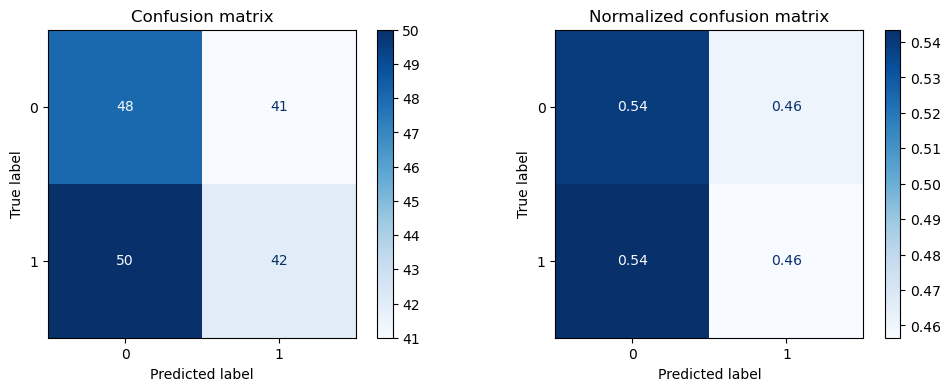

In [77]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

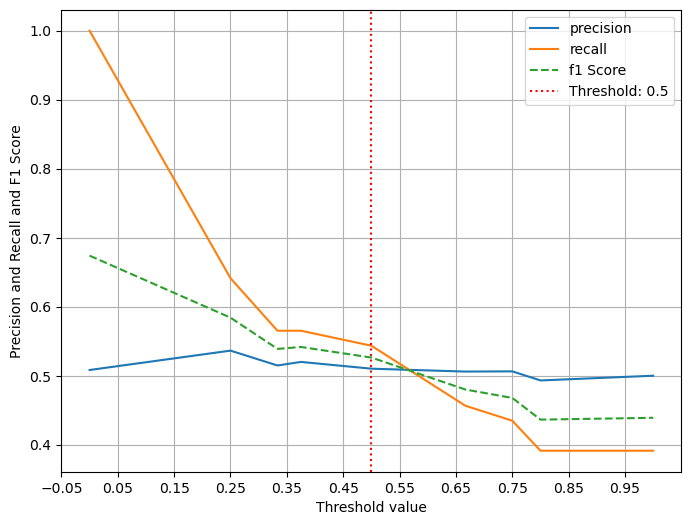

In [78]:
precision_recall_f1_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1,1))

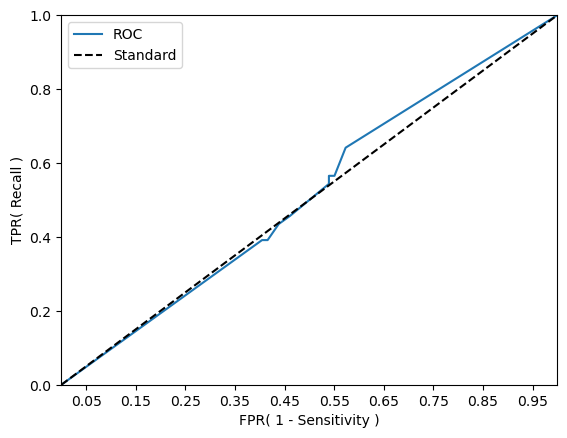

In [79]:
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

확인한 결과 DTC는 매우 처참한 성능임을 알 수 있었다.

-----------
### **SVC 적용**
1. 스케일 적용 X
2. 스케일 적용 O

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_parameters = {'C': [0.1,1,10,100, 1000],
                 'gamma': [0.001,0.01,0.1,1,10,100],
                 'kernel': ['linear', 'rbf']}

svc = SVC(probability=True)

g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)


In [81]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [82]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)


params  mean_test_score  \
0    {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.516438   
1       {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.516438   
2     {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}         0.516438   
3        {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}         0.505479   
4      {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.516438   
5         {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.478082   
6        {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}         0.516438   
7           {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}         0.504110   
8       {'C': 0.1, 'gamma': 10, 'kernel': 'linear'}         0.516438   
9          {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}         0.497260   
10     {'C': 0.1, 'gamma': 100, 'kernel': 'linear'}         0.516438   
11        {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}         0.501370   
12     {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.519178   
13        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.519178   
14      {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}         0.519178   
15         {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}         0.500000   
16       {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}         0.519178   
17          {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.493151   
18         {'C': 1, 'gamma': 1, 'kernel': 'linear'}         0.519178   
19            {'C': 1, 'gamma': 1, 'kernel': 'rbf'}         0.510959   
20        {'C': 1, 'gamma': 10, 'kernel': 'linear'}         0.519178   
21           {'C': 1, 'gamma': 10, 'kernel': 'rbf'}         0.497260   
22       {'C': 1, 'gamma': 100, 'kernel': 'linear'}         0.519178   
23          {'C': 1, 'gamma': 100, 'kernel': 'rbf'}         0.501370   
24    {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}         0.519178   
25       {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}         0.510959   
26     {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}         0.519178   
27        {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}         0.483562   
28      {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}         0.519178   
29         {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}         0.504110   
30        {'C': 10, 'gamma': 1, 'kernel': 'linear'}         0.519178   
31           {'C': 10, 'gamma': 1, 'kernel': 'rbf'}         0.515068   
32       {'C': 10, 'gamma': 10, 'kernel': 'linear'}         0.519178   
33          {'C': 10, 'gamma': 10, 'kernel': 'rbf'}         0.497260   
34      {'C': 10, 'gamma': 100, 'kernel': 'linear'}         0.519178   
35         {'C': 10, 'gamma': 100, 'kernel': 'rbf'}         0.501370   
36   {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}         0.519178   
37      {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}         0.490411   
38    {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}         0.519178   
39       {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}         0.508219   
40     {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}         0.519178   
41        {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}         0.508219   
42       {'C': 100, 'gamma': 1, 'kernel': 'linear'}         0.519178   
43          {'C': 100, 'gamma': 1, 'kernel': 'rbf'}         0.515068   
44      {'C': 100, 'gamma': 10, 'kernel': 'linear'}         0.519178   
45         {'C': 100, 'gamma': 10, 'kernel': 'rbf'}         0.497260   
46     {'C': 100, 'gamma': 100, 'kernel': 'linear'}         0.519178   
47        {'C': 100, 'gamma': 100, 'kernel': 'rbf'}         0.501370   
48  {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}         0.519178   
49     {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}         0.505479   
50   {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}         0.519178   
51      {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}         0.493151   
52    {'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}         0.519178   
53       {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}         0.508219   
54      {'C': 1000, 'gamma': 1, 'kernel': 'linear'}         0.519178   
55         {'

In [83]:
svc = g_svc.best_estimator_
svc_prediction = svc.predict(X_test)

In [84]:
svc

SVC(C=1, gamma=0.001, kernel='linear', probability=True)

오차 행렬
[[46 43]
 [48 44]]
정확도: 0.4972, 정밀도: 0.5057, 재현율: 0.4783, F1: 0.4916, ROC-AUC: 0.4976
################################################################################


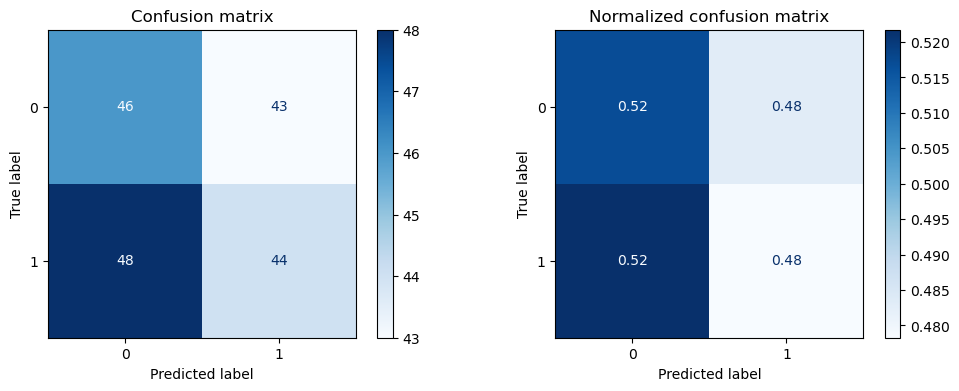

In [85]:
get_evaluation(y_test, svc_prediction, svc, X_test)

C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\4285170516.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


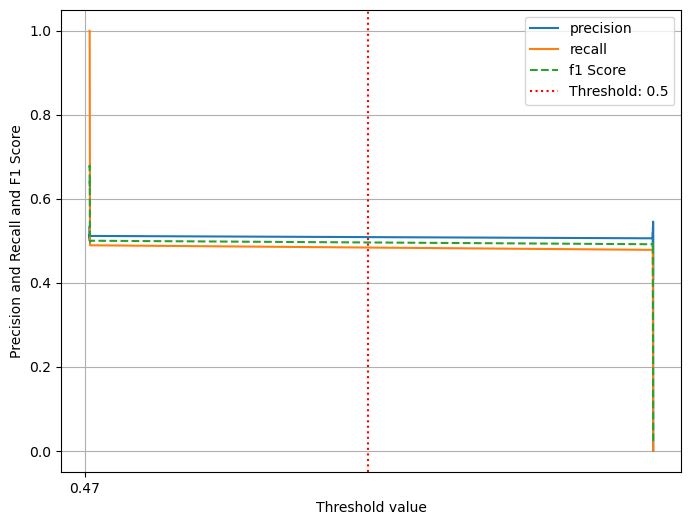

In [86]:
precision_recall_f1_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1,1))

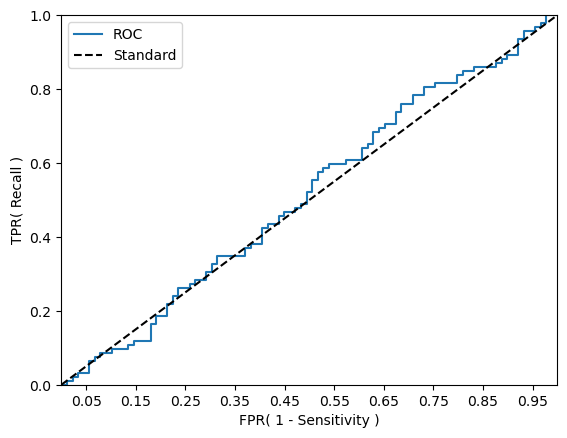

In [87]:
roc_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

스케일 적용

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


svc_parameters = {'svc__C': [0.001, 0.01,0.1,1,10,100, 1000],
                 'svc__gamma': [0.001,0.01,0.1,1,10,100, 1000],
                 'svc__kernel': ['linear', 'rbf']}

svc = SVC(probability=True)


svc_pipe = Pipeline([('standard_scaler', StandardScaler()),('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)


In [89]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [90]:
std_svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(std_svc_result_df)


params  mean_test_score  \
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.530137   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.530137   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.530137   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.535616   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.530137   
..                                                ...              ...   
93  {'svc__C': 1000, 'svc__gamma': 10, 'svc__kerne...         0.505479   
94  {'svc__C': 1000, 'svc__gamma': 100, 'svc__kern...         0.519178   
95  {'svc__C': 1000, 'svc__gamma': 100, 'svc__kern...         0.500000   
96  {'svc__C': 1000, 'svc__gamma': 1000, 'svc__ker...         0.519178   
97  {'svc__C': 1000, 'svc__gamma': 1000, 'svc__ker...         0.506849   

    rank_test_score  
0                13  
1                13  
2                13  
3                 2  
4                13  
..              ...  
93               79  
94               48  
95               87  
96               48  
97               71  

[98 rows x 3 columns]

In [91]:
std_svc = g_svc.best_estimator_
std_svc_prediction = std_svc.predict(X_test)

오차 행렬
[[48 41]
 [49 43]]
정확도: 0.5028, 정밀도: 0.5119, 재현율: 0.4674, F1: 0.4886, ROC-AUC: 0.5034
################################################################################


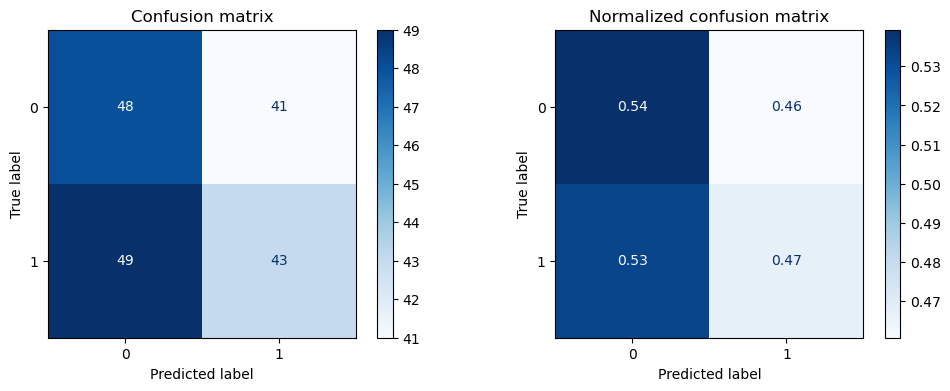

In [92]:
get_evaluation(y_test, std_svc_prediction, std_svc, X_test)

C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\4285170516.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


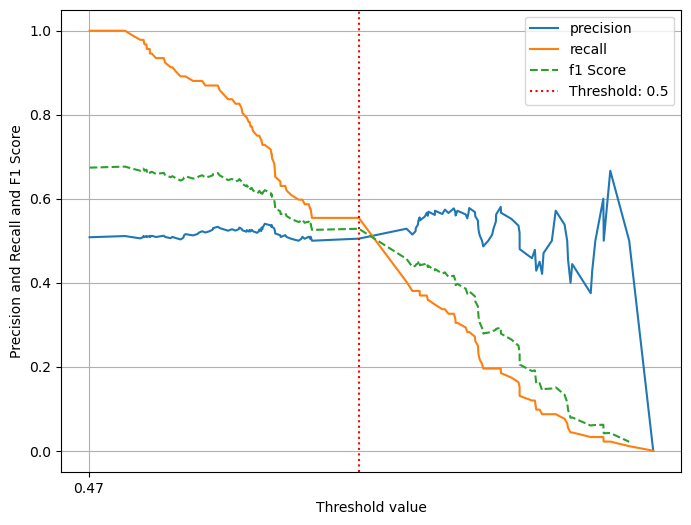

In [93]:
precision_recall_f1_curve_plot(y_test, std_svc.predict_proba(X_test)[:, 1].reshape(-1,1))

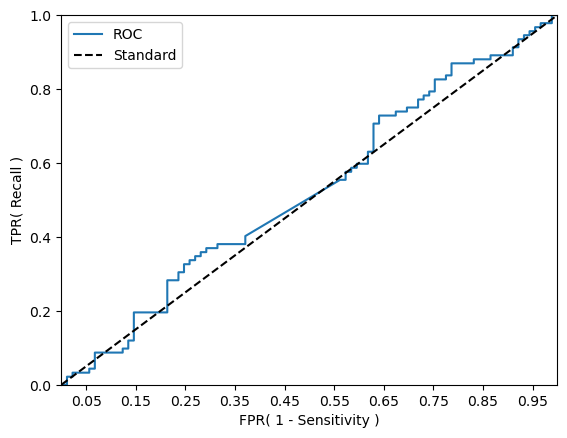

In [94]:
roc_curve_plot(y_test, std_svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

SVC 결론
- DTC 보다는 좋아진 성능을 보였지만 여전히 정확도가 매우 떨어지는 것을 알 수 있었다.

-------------
### **KNN 적용**
1. 스케일적용 X
2. 스케일적용 O

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_c_parameters = {'n_neighbors': [3,5,7,9,11]}

knn = KNeighborsClassifier()
g_knn = GridSearchCV(knn, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [96]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [97]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)


params  mean_test_score  rank_test_score
0   {'n_neighbors': 3}         0.534247                1
1   {'n_neighbors': 5}         0.506849                4
2   {'n_neighbors': 7}         0.502740                5
3   {'n_neighbors': 9}         0.520548                2
4  {'n_neighbors': 11}         0.515068                3

In [98]:
knn= g_knn.best_estimator_
knn_prediction = knn.predict(X_test)

오차 행렬
[[41 48]
 [49 43]]
정확도: 0.4641, 정밀도: 0.4725, 재현율: 0.4674, F1: 0.4699, ROC-AUC: 0.4640
################################################################################


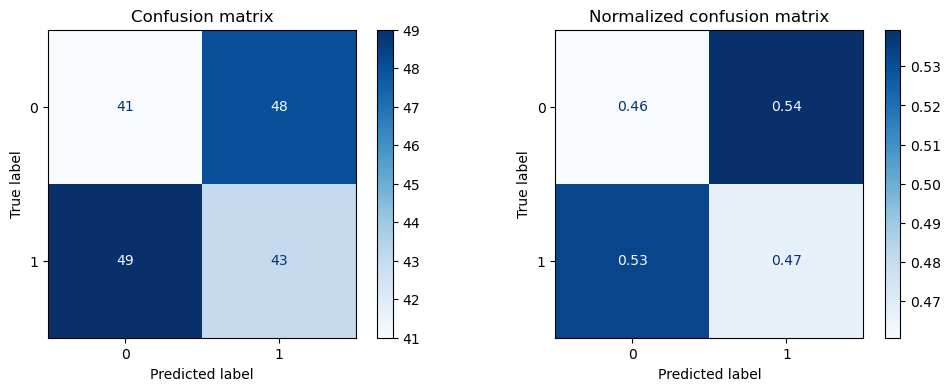

In [99]:
get_evaluation(y_test, knn_prediction, knn, X_test)

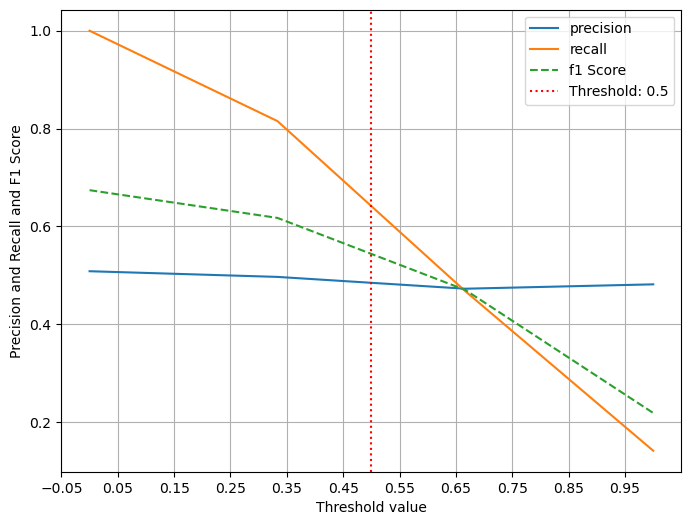

In [100]:
precision_recall_f1_curve_plot(y_test,knn.predict_proba(X_test)[:, 1].reshape(-1,1))

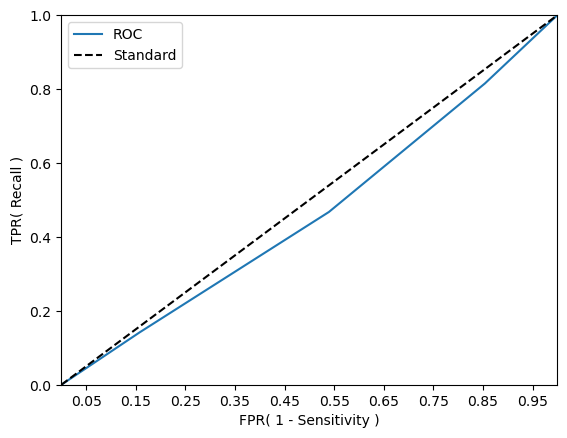

In [101]:
roc_curve_plot(y_test, knn.predict_proba(X_test)[:, 1].reshape(-1,1))

스케일 적용

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_c_parameters = {'knn__n_neighbors': [7,9,11,13,15,17,19,21,23,25]}

knn = KNeighborsClassifier()
knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])

g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [103]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [7, 9, 11, 13, 15, 17, 19, 21, 23,
                                              25]},
             return_train_score=True)

In [104]:
std_knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(std_knn_result_df)


params  mean_test_score  rank_test_score
0   {'knn__n_neighbors': 7}         0.491781               10
1   {'knn__n_neighbors': 9}         0.502740                7
2  {'knn__n_neighbors': 11}         0.513699                4
3  {'knn__n_neighbors': 13}         0.501370                8
4  {'knn__n_neighbors': 15}         0.505479                6
5  {'knn__n_neighbors': 17}         0.520548                1
6  {'knn__n_neighbors': 19}         0.520548                1
7  {'knn__n_neighbors': 21}         0.515068                3
8  {'knn__n_neighbors': 23}         0.495890                9
9  {'knn__n_neighbors': 25}         0.508219                5

In [105]:
std_knn = g_knn.best_estimator_
std_knn_prediction = std_knn.predict(X_test)

오차 행렬
[[43 46]
 [45 47]]
정확도: 0.4972, 정밀도: 0.5054, 재현율: 0.5109, F1: 0.5081, ROC-AUC: 0.4970
################################################################################


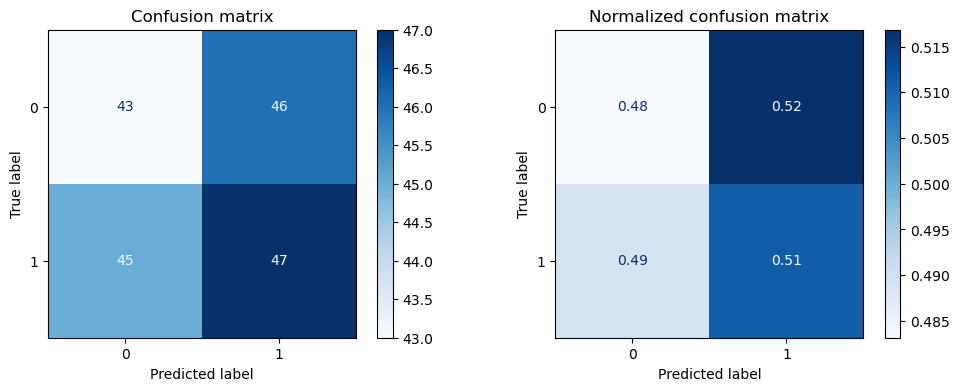

In [106]:
get_evaluation(y_test, std_knn_prediction, std_knn, X_test)

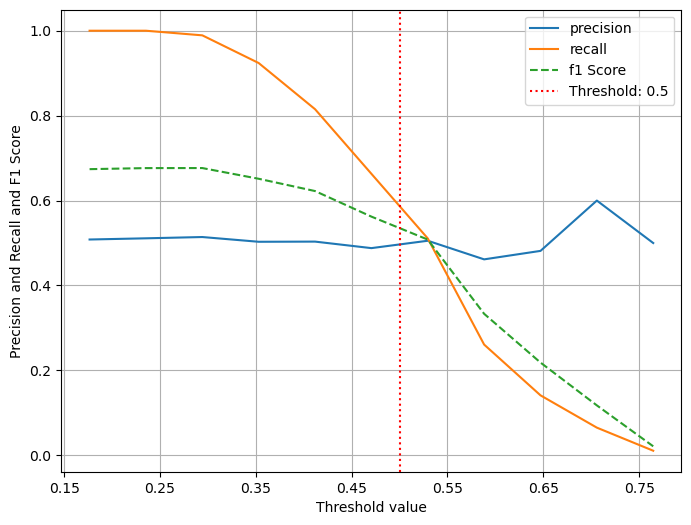

In [107]:
precision_recall_f1_curve_plot(y_test, std_knn.predict_proba(X_test)[:,1].reshape(-1,1))

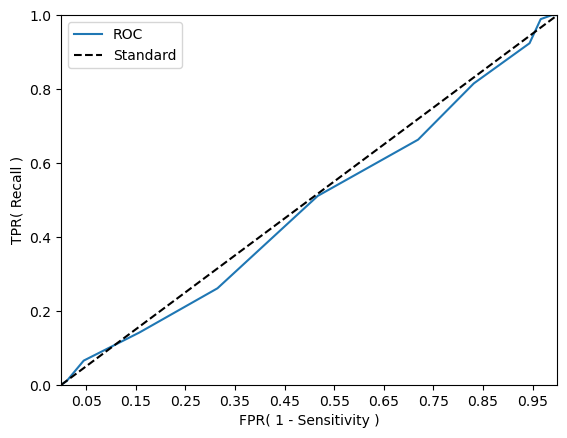

In [108]:
roc_curve_plot(y_test, std_knn.predict_proba(X_test)[:, 1].reshape(-1,1))

### 결과
- 스케일링을 적용한 값이 점수가 조금 더 잘 나온 것을 알 수 있었다.
- 하지만 여전히 그래프와 점수가 낮게 나온다.

----------------
### **Bagging 적용**
1. 스케일 적용 X
2. 스케일 적용 O

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth' : [4,5,6,7,8,9,10,11,12],
    'min_samples_split' : [2,3,4,5,6,7]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)


In [110]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [111]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(rfc_result_df)

params  mean_test_score  \
0    {'max_depth': 4, 'min_samples_split': 2}         0.517808   
1    {'max_depth': 4, 'min_samples_split': 3}         0.528767   
2    {'max_depth': 4, 'min_samples_split': 4}         0.528767   
3    {'max_depth': 4, 'min_samples_split': 5}         0.500000   
4    {'max_depth': 4, 'min_samples_split': 6}         0.505479   
5    {'max_depth': 4, 'min_samples_split': 7}         0.521918   
6    {'max_depth': 5, 'min_samples_split': 2}         0.524658   
7    {'max_depth': 5, 'min_samples_split': 3}         0.512329   
8    {'max_depth': 5, 'min_samples_split': 4}         0.512329   
9    {'max_depth': 5, 'min_samples_split': 5}         0.520548   
10   {'max_depth': 5, 'min_samples_split': 6}         0.502740   
11   {'max_depth': 5, 'min_samples_split': 7}         0.527397   
12   {'max_depth': 6, 'min_samples_split': 2}         0.524658   
13   {'max_depth': 6, 'min_samples_split': 3}         0.531507   
14   {'max_depth': 6, 'min_samples_split': 4}         0.513699   
15   {'max_depth': 6, 'min_samples_split': 5}         0.521918   
16   {'max_depth': 6, 'min_samples_split': 6}         0.519178   
17   {'max_depth': 6, 'min_samples_split': 7}         0.516438   
18   {'max_depth': 7, 'min_samples_split': 2}         0.521918   
19   {'max_depth': 7, 'min_samples_split': 3}         0.530137   
20   {'max_depth': 7, 'min_samples_split': 4}         0.531507   
21   {'max_depth': 7, 'min_samples_split': 5}         0.523288   
22   {'max_depth': 7, 'min_samples_split': 6}         0.534247   
23   {'max_depth': 7, 'min_samples_split': 7}         0.502740   
24   {'max_depth': 8, 'min_samples_split': 2}         0.527397   
25   {'max_depth': 8, 'min_samples_split': 3}         0.536986   
26   {'max_depth': 8, 'min_samples_split': 4}         0.527397   
27   {'max_depth': 8, 'min_samples_split': 5}         0.527397   
28   {'max_depth': 8, 'min_samples_split': 6}         0.523288   
29   {'max_depth': 8, 'min_samples_split': 7}         0.520548   
30   {'max_depth': 9, 'min_samples_split': 2}         0.527397   
31   {'max_depth': 9, 'min_samples_split': 3}         0.541096   
32   {'max_depth': 9, 'min_samples_split': 4}         0.530137   
33   {'max_depth': 9, 'min_samples_split': 5}         0.516438   
34   {'max_depth': 9, 'min_samples_split': 6}         0.515068   
35   {'max_depth': 9, 'min_samples_split': 7}         0.521918   
36  {'max_depth': 10, 'min_samples_split': 2}         0.526027   
37  {'max_depth': 10, 'min_samples_split': 3}         0.510959   
38  {'max_depth': 10, 'min_samples_split': 4}         0.521918   
39  {'max_depth': 10, 'min_samples_split': 5}         0.526027   
40  {'max_depth': 10, 'min_samples_split': 6}         0.539726   
41  {'max_depth': 10, 'min_samples_split': 7}         0.520548   
42  {'max_depth': 11, 'min_samples_split': 2}         0.528767   
43  {'max_depth': 11, 'min_samples_split': 3}         0.552055   
44  {'max_depth': 11, 'min_samples_split': 4}         0.505479   
45  {'max_depth': 11, 'min_samples_split': 5}         0.536986   
46  {'max_depth': 11, 'min_samples_split': 6}         0.532877   
47  {'max_depth': 11, 'min_samples_split': 7}         0.541096   
48  {'max_depth': 12, 'min_samples_split': 2}         0.516438   
49  {'max_depth': 12, 'min_samples_split': 3}         0.520548   
50  {'max_depth': 12, 'min_samples_split': 4}         0.526027   
51  {'max_depth': 12, 'min_samples_split': 5}         0.526027   
52  {'max_depth': 12, 'min_samples_split': 6}         0.509589   
53  {'max_depth': 12, 'min_samples_split': 7}         0.526027   

    rank_test_score  
0                40  
1                13  
2                13  
3                54  
4                50  
5                30  
6                27  
7                46  
8                47  
9                36  
10               52  
11               16  
12               26  
13                9  
14               45  
15               30  
16               39  
17          

In [112]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[44 45]
 [48 44]]
정확도: 0.4862, 정밀도: 0.4944, 재현율: 0.4783, F1: 0.4862, ROC-AUC: 0.4863
################################################################################


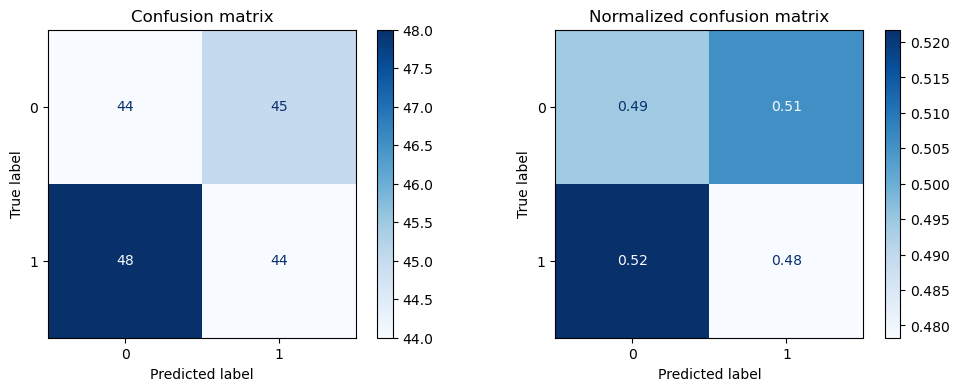

In [113]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\4285170516.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


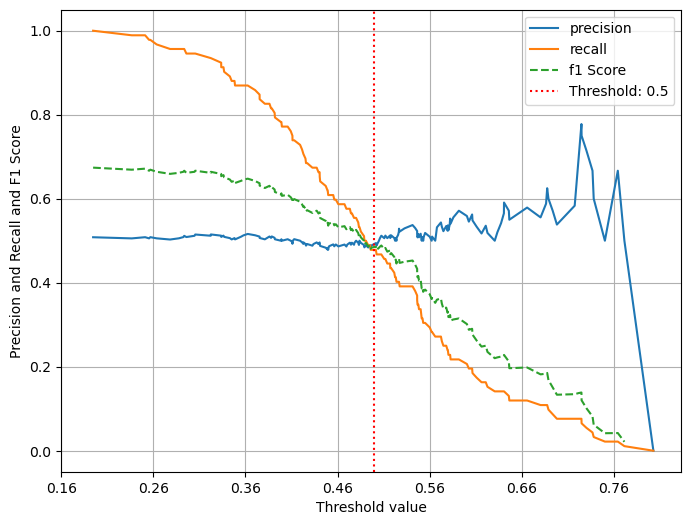

In [114]:
precision_recall_f1_curve_plot(y_test, rfc.predict_proba(X_test)[:,1].reshape(-1,1))

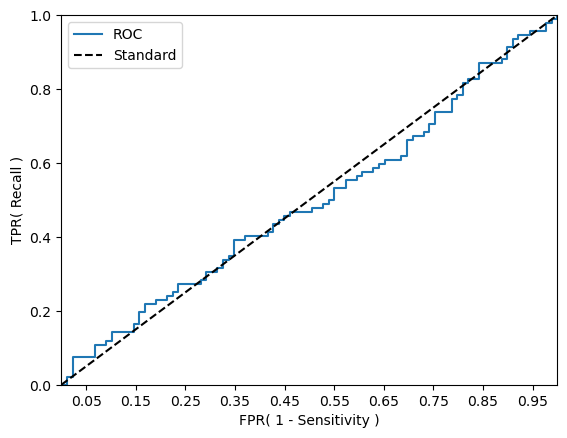

In [115]:
roc_curve_plot(y_test, rfc.predict_proba(X_test)[:,1].reshape(-1,1))

스케일링 진행

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


rfc_parameters = {
    'rfc__max_depth' : [4,5,6,7,8,9,10,11,12],
    'rfc__min_samples_split' : [2,3,4,5,6,7]
}

rfc = RandomForestClassifier(n_estimators=100)
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()),('rfc', rfc)])


g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=10, n_jobs=-1)


In [117]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'rfc__min_samples_split': [2, 3, 4, 5, 6, 7]})

In [118]:
std_rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(std_rfc_result_df)

params  mean_test_score  \
0   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.513699   
1   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.517808   
2   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.512329   
3   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.500000   
4   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.505479   
5   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.513699   
6   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.516438   
7   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.498630   
8   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.520548   
9   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.506849   
10  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.506849   
11  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.501370   
12  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.527397   
13  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.524658   
14  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.508219   
15  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.516438   
16  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.520548   
17  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.531507   
18  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.517808   
19  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.500000   
20  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.534247   
21  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.538356   
22  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.528767   
23  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.521918   
24  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.504110   
25  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.543836   
26  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.530137   
27  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.530137   
28  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.528767   
29  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.523288   
30  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.527397   
31  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.530137   
32  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.509589   
33  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.539726   
34  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.510959   
35  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.539726   
36  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.523288   
37  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.521918   
38  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.515068   
39  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.510959   
40  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.510959   
41  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.520548   
42  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.523288   
43  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.546575   
44  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.520548   
45  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.530137   
46  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.527397   
47  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.528767   
48  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.512329   
49  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.506849   
50  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.538356   
51  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.532877   
52  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.524658   
53  {'rfc__max_depth': 12, 'rfc__min_samples_split.

In [119]:
std_rfc = g_rfc.best_estimator_
std_rfc_prediction = std_rfc.predict(X_test)

오차 행렬
[[47 42]
 [48 44]]
정확도: 0.5028, 정밀도: 0.5116, 재현율: 0.4783, F1: 0.4944, ROC-AUC: 0.5032
################################################################################


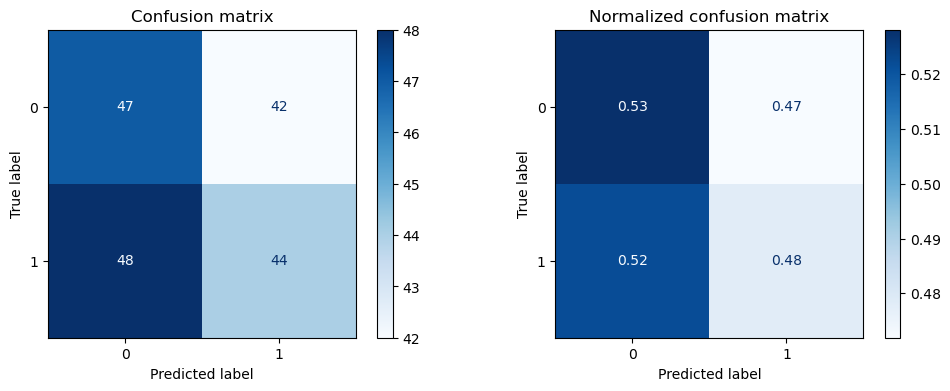

In [120]:
get_evaluation(y_test, std_rfc_prediction, std_rfc, X_test)

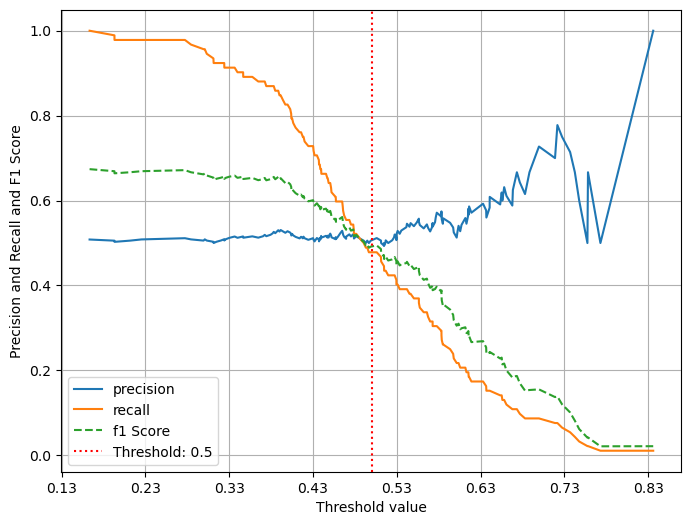

In [121]:
precision_recall_f1_curve_plot(y_test, std_rfc.predict_proba(X_test)[:,1].reshape(-1,1))

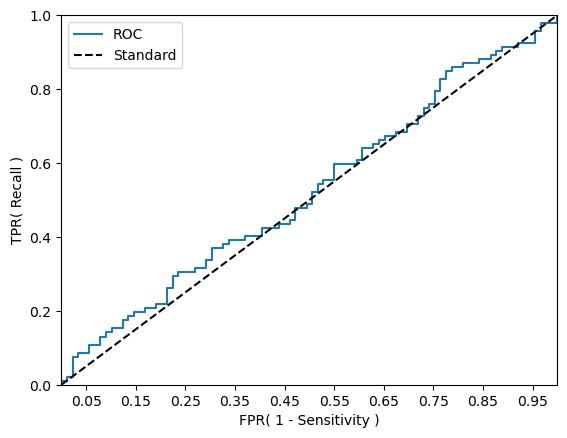

In [122]:
roc_curve_plot(y_test, std_rfc.predict_proba(X_test)[:,1].reshape(-1,1))

### 결론
- 랜덤포레스트 방식으로 스케일링을 진행하지 않고 하던, 진행하고 하던 상관없이 둘 모두 점수가 매우 안 좋게 나옴을 알 수 있었다.

---------
### **Adaboost**
1. 스케일 진행 X
2. 스케일 진행 O

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_parameters = {
    'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate' : [0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4, 0.5, 0.7, 1]
}

ada = AdaBoostClassifier()
g_ada = GridSearchCV(ada, param_grid=ada_parameters, cv=5, refit=True, return_train_score=True)


In [124]:
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True)

In [125]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(ada_result_df['params'].iloc[1])

display(ada_result_df)

{'learning_rate': 0.02, 'n_estimators': 100}


params  mean_test_score  \
0     {'learning_rate': 0.02, 'n_estimators': 50}         0.515068   
1    {'learning_rate': 0.02, 'n_estimators': 100}         0.521918   
2    {'learning_rate': 0.02, 'n_estimators': 150}         0.519178   
3    {'learning_rate': 0.02, 'n_estimators': 200}         0.520548   
4    {'learning_rate': 0.02, 'n_estimators': 250}         0.517808   
..                                            ...              ...   
105     {'learning_rate': 1, 'n_estimators': 300}         0.472603   
106     {'learning_rate': 1, 'n_estimators': 350}         0.472603   
107     {'learning_rate': 1, 'n_estimators': 400}         0.469863   
108     {'learning_rate': 1, 'n_estimators': 450}         0.468493   
109     {'learning_rate': 1, 'n_estimators': 500}         0.467123   

     rank_test_score  
0                 13  
1                  1  
2                  6  
3                  2  
4                  7  
..               ...  
105               90  
106               90  
107               96  
108              100  
109              108  

[110 rows x 3 columns]

In [126]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

오차 행렬
[[46 43]
 [43 49]]
정확도: 0.5249, 정밀도: 0.5326, 재현율: 0.5326, F1: 0.5326, ROC-AUC: 0.5247
################################################################################


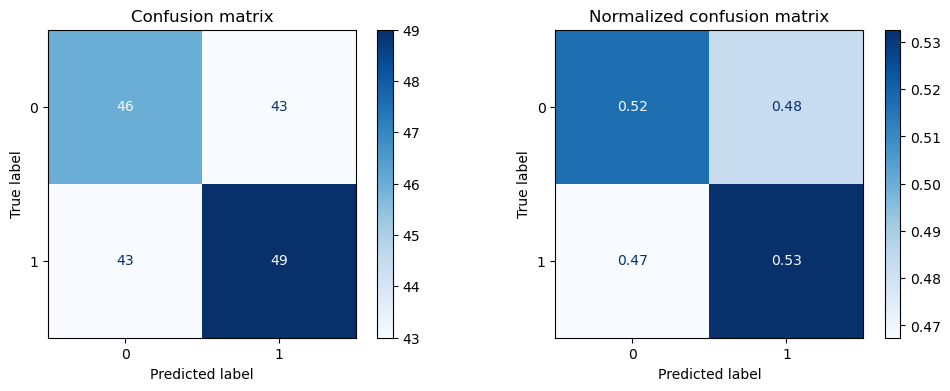

In [127]:
get_evaluation(y_test, ada_prediction, ada, X_test)

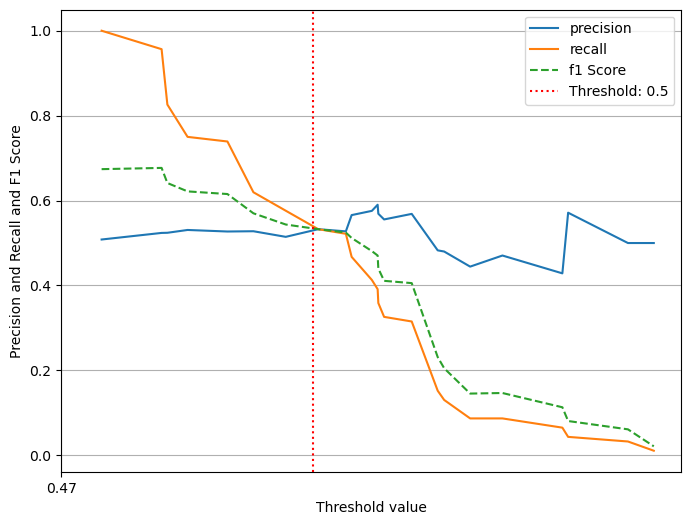

In [128]:
precision_recall_f1_curve_plot(y_test, ada.predict_proba(X_test)[:,1].reshape(-1,1))

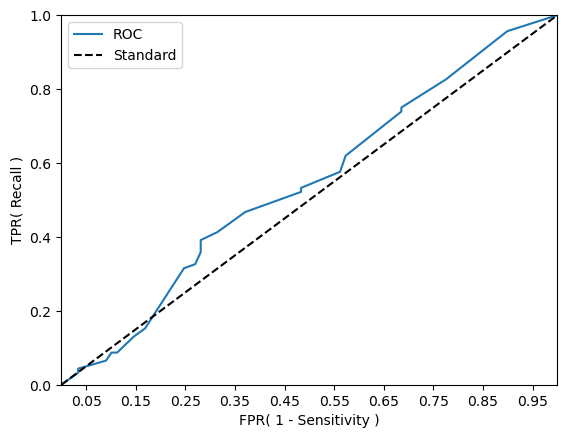

In [129]:
roc_curve_plot(y_test, ada.predict_proba(X_test)[:,1].reshape(-1,1))

스케일링 적용

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


ada_parameters = {
    'ada__n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'ada__learning_rate' : [0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4, 0.5, 0.7, 1]
}

ada = AdaBoostClassifier()
ada_pipe = Pipeline([('standard_scaler', StandardScaler()),('ada', ada)])

g_ada = GridSearchCV(ada_pipe, param_grid=ada_parameters, cv=5, refit=True, return_train_score=True)


In [131]:
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1,
                                                0.2, 0.3, 0.4, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                               400, 450, 500]},
             return_train_score=True)

In [132]:
std_ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(std_ada_result_df['params'].iloc[1])

display(std_ada_result_df)

{'ada__learning_rate': 0.02, 'ada__n_estimators': 100}


params  mean_test_score  \
0    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.515068   
1    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.521918   
2    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.519178   
3    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.520548   
4    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.517808   
..                                                 ...              ...   
105  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.472603   
106  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.472603   
107  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.469863   
108  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.468493   
109  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.467123   

     rank_test_score  
0                 13  
1                  1  
2                  6  
3                  2  
4                  7  
..               ...  
105               90  
106               90  
107               96  
108              100  
109              108  

[110 rows x 3 columns]

In [133]:
std_ada = g_ada.best_estimator_
std_ada_prediction = std_ada.predict(X_test)

오차 행렬
[[46 43]
 [43 49]]
정확도: 0.5249, 정밀도: 0.5326, 재현율: 0.5326, F1: 0.5326, ROC-AUC: 0.5247
################################################################################


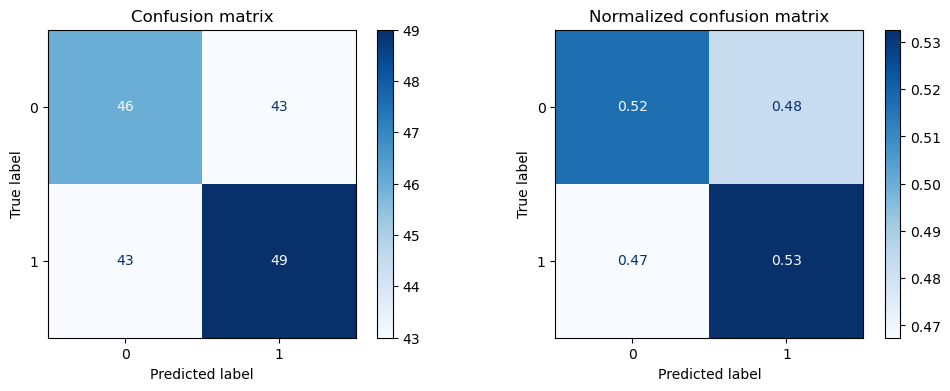

In [134]:
get_evaluation(y_test, std_ada_prediction, std_ada, X_test)

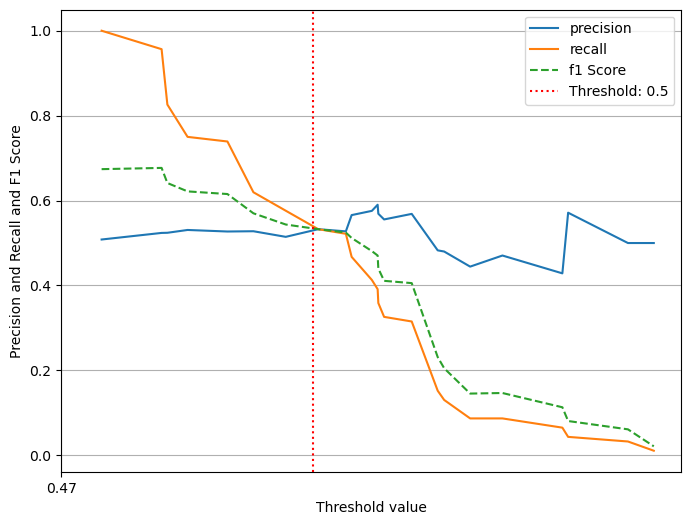

In [135]:
precision_recall_f1_curve_plot(y_test, std_ada.predict_proba(X_test)[:,1].reshape(-1,1))

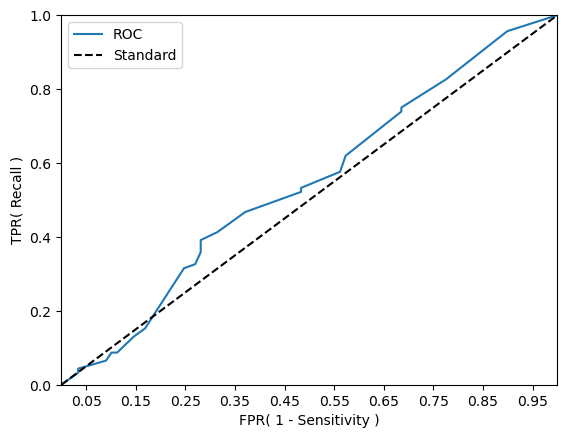

In [136]:
roc_curve_plot(y_test, std_ada.predict_proba(X_test)[:,1].reshape(-1,1))

### 결론
- Adaboost를 활용했을때 나타난 점수가 앞선 DTC,SVC,KNN,RandomForest 보다 더 점수가 높게 나오고 그래프 모양도 조금 더 성능이 좋게 출력됨을 알 수 있었다.

### **GBM 적용**
1. 스케일 적용 X
2. 스케일 적용 O

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate': [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)


In [138]:
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12,
                                           0.14, 0.16, 0.18, 0.2],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [139]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params','mean_test_score', 'rank_test_score']]
print(gbc_result_df.iloc[20])
display(gbc_result_df)

params             {'learning_rate': 0.06, 'n_estimators': 50}
mean_test_score                                       0.542479
rank_test_score                                              1
Name: 20, dtype: object


params  mean_test_score  \
0    {'learning_rate': 0.02, 'n_estimators': 50}         0.520554   
1   {'learning_rate': 0.02, 'n_estimators': 100}         0.527395   
2   {'learning_rate': 0.02, 'n_estimators': 150}         0.542473   
3   {'learning_rate': 0.02, 'n_estimators': 200}         0.538375   
4   {'learning_rate': 0.02, 'n_estimators': 250}         0.539758   
..                                           ...              ...   
95   {'learning_rate': 0.2, 'n_estimators': 300}         0.510957   
96   {'learning_rate': 0.2, 'n_estimators': 350}         0.517816   
97   {'learning_rate': 0.2, 'n_estimators': 400}         0.521909   
98   {'learning_rate': 0.2, 'n_estimators': 450}         0.531488   
99   {'learning_rate': 0.2, 'n_estimators': 500}         0.527379   

    rank_test_score  
0                27  
1                12  
2                 2  
3                 4  
4                 3  
..              ...  
95               68  
96               40  
97               25  
98                8  
99               13  

[100 rows x 3 columns]

In [140]:
print(g_gbc.best_estimator_)

GradientBoostingClassifier(learning_rate=0.06, n_estimators=50)


In [141]:
gbc= g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[45 44]
 [52 40]]
정확도: 0.4696, 정밀도: 0.4762, 재현율: 0.4348, F1: 0.4545, ROC-AUC: 0.4702
################################################################################


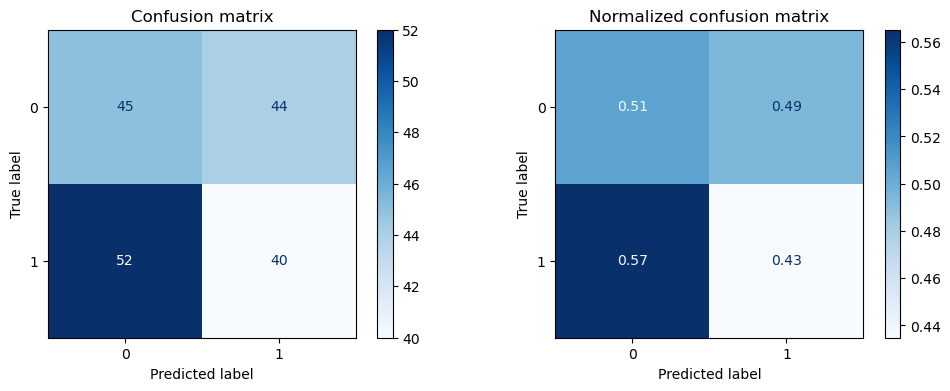

In [142]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\4285170516.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


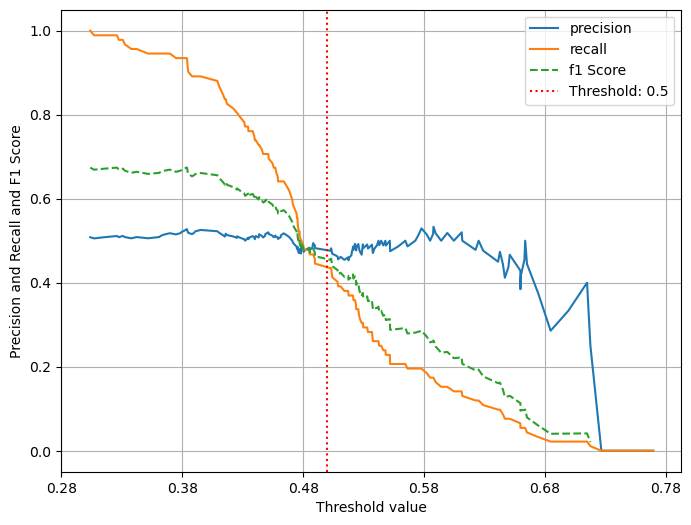

In [143]:
precision_recall_f1_curve_plot(y_test, gbc.predict_proba(X_test)[:,1].reshape(-1,1))

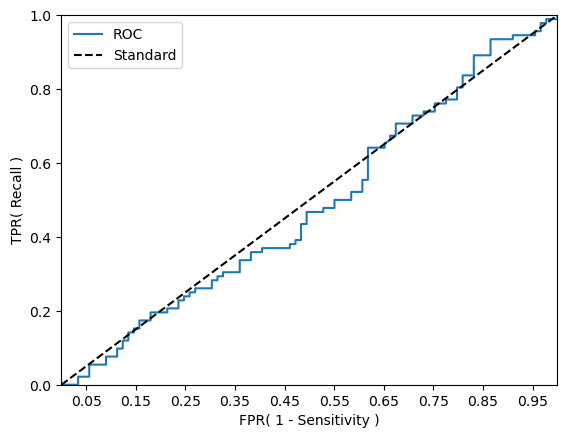

In [144]:
roc_curve_plot(y_test, gbc.predict_proba(X_test)[:,1].reshape(-1,1))

스케일링 진행

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

parameters = {
    'gbc__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'gbc__learning_rate': [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
}

gbc= GradientBoostingClassifier(loss='log_loss')
gbc_pipe = Pipeline([('standard_scaler', StandardScaler()),('gbc', gbc)])

g_gbc = GridSearchCV(gbc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)


In [146]:
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1,
                                                0.12, 0.14, 0.16, 0.18, 0.2],
                         'gbc__n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                               400, 450, 500]},
             return_train_score=True)

In [147]:
std_gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params','mean_test_score', 'rank_test_score']]
print(std_gbc_result_df.iloc[2])
display(std_gbc_result_df)

params             {'gbc__learning_rate': 0.02, 'gbc__n_estimator...
mean_test_score                                              0.54384
rank_test_score                                                    1
Name: 2, dtype: object


params  mean_test_score  \
0   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.520554   
1   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.527395   
2   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.543840   
3   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.539736   
4   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.542490   
..                                                ...              ...   
95  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.512329   
96  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.517816   
97  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.524646   
98  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.532860   
99  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.528750   

    rank_test_score  
0                27  
1                14  
2                 1  
3                 4  
4                 2  
..              ...  
95               62  
96               39  
97               19  
98                8  
99               12  

[100 rows x 3 columns]

In [148]:
std_gbc = g_gbc.best_estimator_
std_gbc_prediction = std_gbc.predict(X_test)

오차 행렬
[[45 44]
 [54 38]]
정확도: 0.4586, 정밀도: 0.4634, 재현율: 0.4130, F1: 0.4368, ROC-AUC: 0.4593
################################################################################


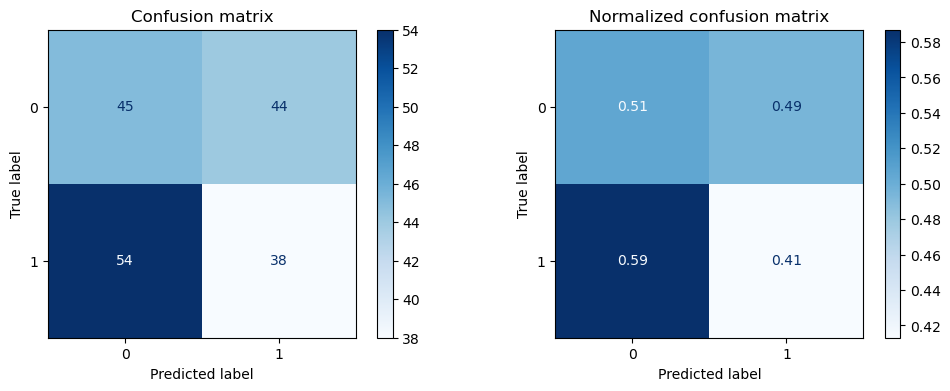

In [149]:
get_evaluation(y_test, std_gbc_prediction, std_gbc, X_test)

C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\4285170516.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


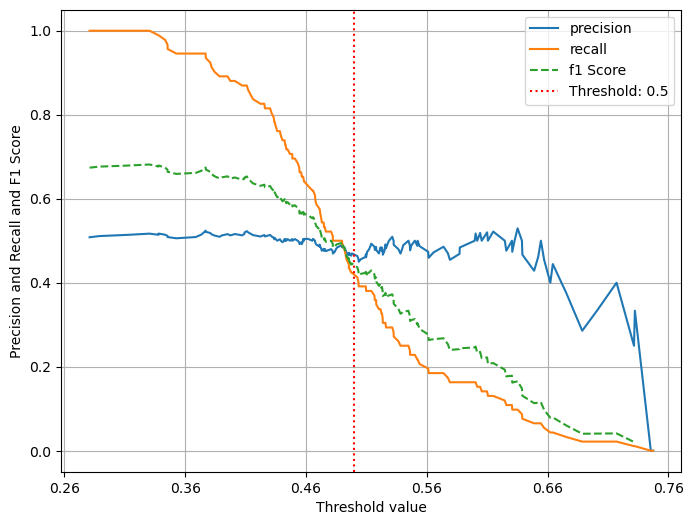

In [150]:
precision_recall_f1_curve_plot(y_test, std_gbc.predict_proba(X_test)[:,1].reshape(-1,1))

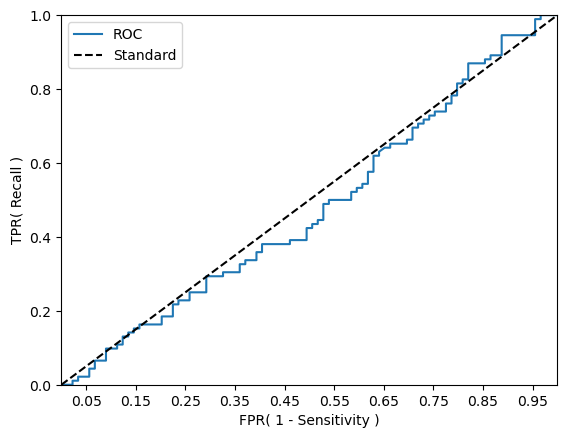

In [151]:
roc_curve_plot(y_test, std_gbc.predict_proba(X_test)[:,1].reshape(-1,1))

### 결론
- GBM은 앞선 모델보다 표준화스케일링을 하여도 성능이 떨어짐을 알 수 있었다.

### **XGBoost**
- 스케일 진행 X
- 스케일 진행 O

In [152]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]


In [153]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.3]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(
    xgb,
    param_grid=parameters,
    cv=5,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

In [154]:
g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=30, eval_set=evals)

[0]	validation_0-logloss:0.67082	validation_1-logloss:0.67735
[1]	validation_0-logloss:0.65415	validation_1-logloss:0.65771
[2]	validation_0-logloss:0.64092	validation_1-logloss:0.64497
[3]	validation_0-logloss:0.62850	validation_1-logloss:0.63121
[4]	validation_0-logloss:0.61506	validation_1-logloss:0.61807
[5]	validation_0-logloss:0.60226	validation_1-logloss:0.60690
[6]	validation_0-logloss:0.59035	validation_1-logloss:0.59537
[7]	validation_0-logloss:0.58158	validation_1-logloss:0.58605
[8]	validation_0-logloss:0.57441	validation_1-logloss:0.57699
[9]	validation_0-logloss:0.56674	validation_1-logloss:0.56997
[10]	validation_0-logloss:0.55977	validation_1-logloss:0.56327
[11]	validation_0-logloss:0.55048	validation_1-logloss:0.55343
[12]	validation_0-logloss:0.54229	validation_1-logloss:0.54646
[13]	validation_0-logloss:0.53491	validation_1-logloss:0.53779
[14]	validation_0-logloss:0.52442	validation_1-logloss:0.52694
[15]	validation_0-logloss:0.51685	validation_1-logloss:0.51976
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [155]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.1, 'n_estimators': 50}         0.524658   
1    {'learning_rate': 0.1, 'n_estimators': 60}         0.528767   
2    {'learning_rate': 0.1, 'n_estimators': 70}         0.527397   
3    {'learning_rate': 0.1, 'n_estimators': 80}         0.521918   
4    {'learning_rate': 0.1, 'n_estimators': 90}         0.520548   
5   {'learning_rate': 0.1, 'n_estimators': 100}         0.515068   
6    {'learning_rate': 0.2, 'n_estimators': 50}         0.505479   
7    {'learning_rate': 0.2, 'n_estimators': 60}         0.506849   
8    {'learning_rate': 0.2, 'n_estimators': 70}         0.506849   
9    {'learning_rate': 0.2, 'n_estimators': 80}         0.504110   
10   {'learning_rate': 0.2, 'n_estimators': 90}         0.506849   
11  {'learning_rate': 0.2, 'n_estimators': 100}         0.504110   
12   {'learning_rate': 0.3, 'n_estimators': 50}         0.506849   
13   {'learning_rate': 0.3, 'n_estimators': 60}         0.504110   
14   {'learning_rate': 0.3, 'n_estimators': 70}         0.516438   
15   {'learning_rate': 0.3, 'n_estimators': 80}         0.513699   
16   {'learning_rate': 0.3, 'n_estimators': 90}         0.512329   
17  {'learning_rate': 0.3, 'n_estimators': 100}         0.510959   

    rank_test_score  
0                 3  
1                 1  
2                 2  
3                 4  
4                 5  
5                 7  
6                15  
7                11  
8                11  
9                16  
10               11  
11               17  
12               11  
13               17  
14                6  
15                8  
16                9  
17               10

In [156]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)


오차 행렬
[[45 44]
 [49 43]]
정확도: 0.4862, 정밀도: 0.4943, 재현율: 0.4674, F1: 0.4804, ROC-AUC: 0.4865
################################################################################


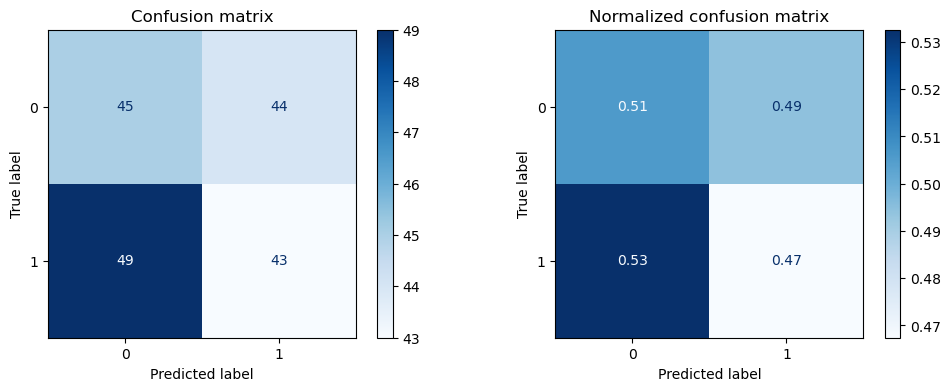

In [157]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\4285170516.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


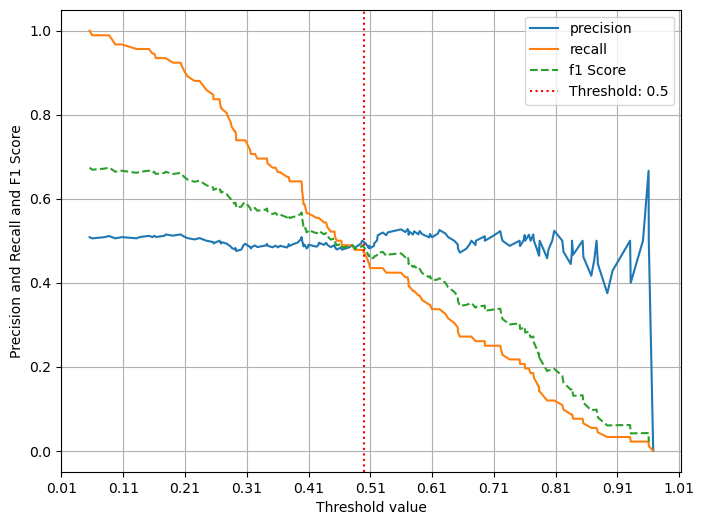

In [158]:
precision_recall_f1_curve_plot(y_test, xgb.predict_proba(X_test)[:,1].reshape(-1,1))

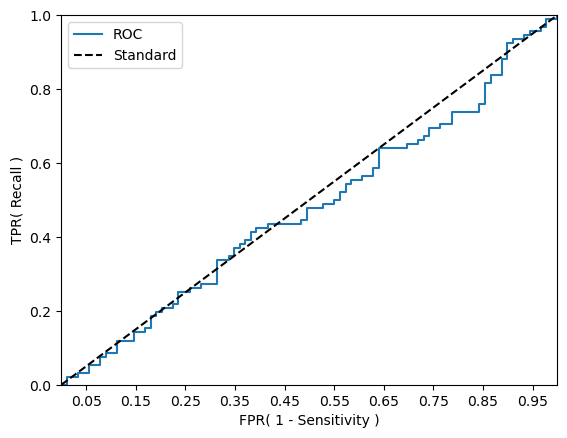

In [159]:
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:,1].reshape(-1,1))

표준화 진행

In [160]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_h = std.fit_transform(pre_h_df.iloc[:, :-1])

In [161]:
std_pre_h_df = pd.DataFrame(std_pre_h, columns=pre_h_df.iloc[:, :-1].columns)
std_pre_h_df['Hair Loss'] = pre_h_df['Hair Loss']
std_pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0   -1.031468         -1.004435           -0.258757                 -1.162877   
1   -1.031468         -1.004435           -0.561366                 -0.549730   
2    0.969492          0.995585            0.649069                 -1.162877   
3   -1.031468         -1.004435            0.346460                 -1.469450   
4    0.969492         -1.004435            0.346460                 -1.162877   
..        ...               ...                 ...                       ...   
899  0.969492         -1.004435            1.254286                  1.289711   
900  0.969492          0.995585            0.043851                 -1.469450   
901 -1.031468          0.995585           -1.166583                 -0.856303   
902 -1.031468          0.995585           -0.863974                  0.676564   
903  0.969492          0.995585            0.346460                 -0.243156   

     Nutritional Deficiencies     Stress  Poor Hair Care Habits   \
0                    -0.964617 -1.266555                1.013364   
1                    -0.028310  1.174736                1.013364   
2                    -1.588822  1.174736                1.013364   
3                    -1.276720  1.174736               -0.986813   
4                    -0.964617 -0.045909               -0.986813   
..                         ...       ...                     ...   
899                   0.595895 -0.045909                1.013364   
900                  -0.028310 -0.045909               -0.986813   
901                  -0.028310  1.174736                1.013364   
902                  -1.588822  1.174736                1.013364   
903                   0.907997 -0.045909               -0.986813   

     Environmental Factors   Smoking  Weight Loss   age_section  Hair Loss  
0                 0.973795 -1.047591     -0.944041     1.210301          0  
1                 0.973795 -1.047591      1.059276    -1.270679          0  
2                 0.973795 -1.047591     -0.944041     1.210301          0  
3                 0.973795  0.954571     -0.944041    -0.030189          1  
4                 0.973795 -1.047591      1.059276    -0.030189          1  
..                     ...       ...           ...          ...        ...  
899               0.973795  0.954571      1.059276    -0.030189          1  
900              -1.026911 -1.047591      1.059276     1.210301          0  
901              -1.026911  0.954571      1.059276    -1.270679          1  
902               0.973795  0.954571      1.059276    -0.030189          1  
903               0.973795 -1.047591     -0.944041    -0.030189          1  

[904 rows x 12 columns]

In [162]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = std_pre_h_df.iloc[:, :-1], std_pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

Hair Loss
0    365
1    365
Name: count, dtype: int64

In [163]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.3]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(
    xgb,
    param_grid=parameters,
    cv=5,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)



In [164]:
g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=30, eval_set=evals)

[0]	validation_0-logloss:0.67083	validation_1-logloss:0.67683
[1]	validation_0-logloss:0.65513	validation_1-logloss:0.66470
[2]	validation_0-logloss:0.64050	validation_1-logloss:0.65089
[3]	validation_0-logloss:0.62421	validation_1-logloss:0.63782
[4]	validation_0-logloss:0.61152	validation_1-logloss:0.62368
[5]	validation_0-logloss:0.60049	validation_1-logloss:0.61496
[6]	validation_0-logloss:0.58984	validation_1-logloss:0.60530
[7]	validation_0-logloss:0.57725	validation_1-logloss:0.59019
[8]	validation_0-logloss:0.56661	validation_1-logloss:0.58078
[9]	validation_0-logloss:0.55455	validation_1-logloss:0.56785
[10]	validation_0-logloss:0.54544	validation_1-logloss:0.55673
[11]	validation_0-logloss:0.53494	validation_1-logloss:0.54556
[12]	validation_0-logloss:0.52729	validation_1-logloss:0.53515
[13]	validation_0-logloss:0.51636	validation_1-logloss:0.52368
[14]	validation_0-logloss:0.50731	validation_1-logloss:0.51507
[15]	validation_0-logloss:0.49949	validation_1-logloss:0.50541
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [165]:
std_xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(std_xgb_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.1, 'n_estimators': 50}         0.512329   
1    {'learning_rate': 0.1, 'n_estimators': 60}         0.523288   
2    {'learning_rate': 0.1, 'n_estimators': 70}         0.509589   
3    {'learning_rate': 0.1, 'n_estimators': 80}         0.506849   
4    {'learning_rate': 0.1, 'n_estimators': 90}         0.500000   
5   {'learning_rate': 0.1, 'n_estimators': 100}         0.495890   
6    {'learning_rate': 0.2, 'n_estimators': 50}         0.491781   
7    {'learning_rate': 0.2, 'n_estimators': 60}         0.504110   
8    {'learning_rate': 0.2, 'n_estimators': 70}         0.498630   
9    {'learning_rate': 0.2, 'n_estimators': 80}         0.489041   
10   {'learning_rate': 0.2, 'n_estimators': 90}         0.497260   
11  {'learning_rate': 0.2, 'n_estimators': 100}         0.498630   
12   {'learning_rate': 0.3, 'n_estimators': 50}         0.502740   
13   {'learning_rate': 0.3, 'n_estimators': 60}         0.517808   
14   {'learning_rate': 0.3, 'n_estimators': 70}         0.520548   
15   {'learning_rate': 0.3, 'n_estimators': 80}         0.521918   
16   {'learning_rate': 0.3, 'n_estimators': 90}         0.519178   
17  {'learning_rate': 0.3, 'n_estimators': 100}         0.516438   

    rank_test_score  
0                 7  
1                 1  
2                 8  
3                 9  
4                12  
5                16  
6                17  
7                10  
8                14  
9                18  
10               15  
11               13  
12               11  
13                5  
14                3  
15                2  
16                4  
17                6

In [166]:
std_xgb = g_xgb.best_estimator_
std_xgb_prediction = std_xgb.predict(X_test)


오차 행렬
[[50 39]
 [50 42]]
정확도: 0.5083, 정밀도: 0.5185, 재현율: 0.4565, F1: 0.4855, ROC-AUC: 0.5092
################################################################################


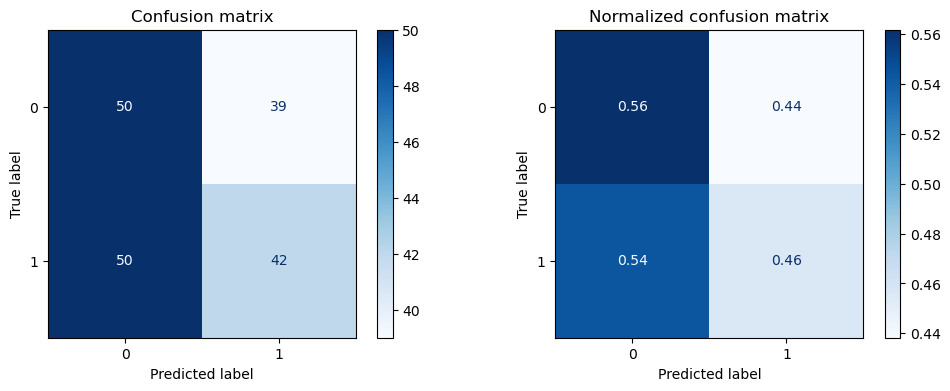

In [167]:
get_evaluation(y_test, std_xgb_prediction, std_xgb, X_test)

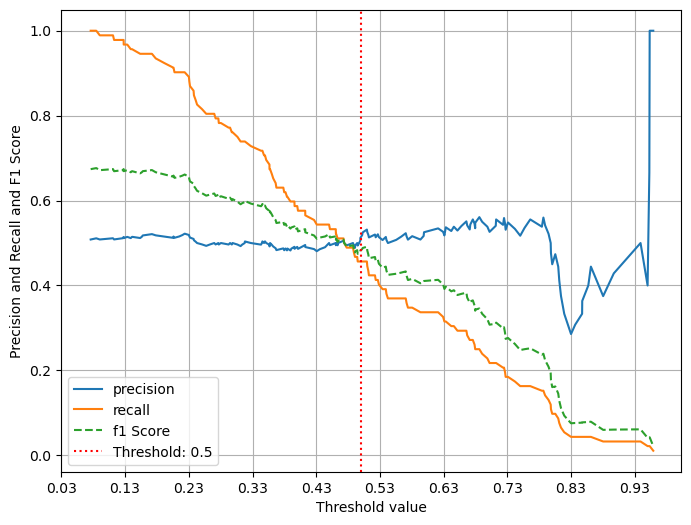

In [168]:
precision_recall_f1_curve_plot(y_test, std_xgb.predict_proba(X_test)[:,1].reshape(-1,1))

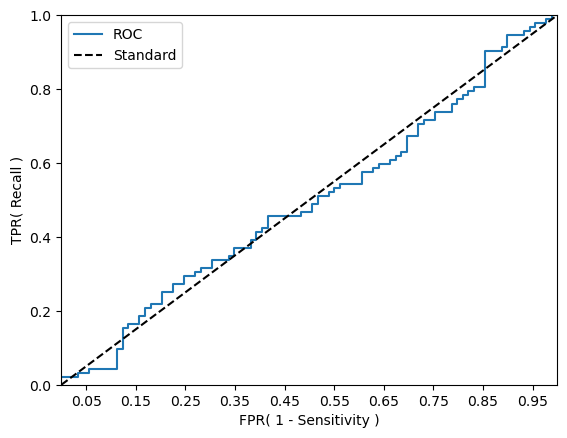

In [169]:
roc_curve_plot(y_test, std_xgb.predict_proba(X_test)[:,1].reshape(-1,1))

## 결론
- XGBoost로 진행해도 아주 미세하게 더 좋은 성능이 나올뿐 더 좋은 성능이 나오지 않았다.

----------
### **LightGBM**
- 스케일 적용 X
- 스케일 적용 O

In [170]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, refit=True, return_train_score=True, n_jobs=-1)

y_train_over.value_counts()

Hair Loss
0    365
1    365
Name: count, dtype: int64

In [171]:
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 365, number of negative: 365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 730, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [172]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.509589   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.512329   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.517808   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.523288   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.505479   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.516438   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.516438   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.515068   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.516438   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.508219   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.508219   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.493151   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.498630   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.505479   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.504110   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.508219   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.495890   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.505479   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.501370   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.508219   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.497260   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.498630   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.517808   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.516438   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.510959   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.498630   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.489041   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.495890   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.495890   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.504110   

    rank_test_score  
0                11  
1                 9  
2                 2  
3                 1  
4                16  
5                 4  
6                 4  
7                 8  
8                 6  
9                12  
10               12  
11               29  
12               22  
13               16  
14               19  
15               14  
16               26  
17               16  
18               21  
19               14  
20               25  
21               22  
22                2  
23                6  
24               10  
25               22  
26               30  
27               26  
28               26  
29               19

In [173]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[41 48]
 [47 45]]
정확도: 0.4751, 정밀도: 0.4839, 재현율: 0.4891, F1: 0.4865, ROC-AUC: 0.4749
################################################################################


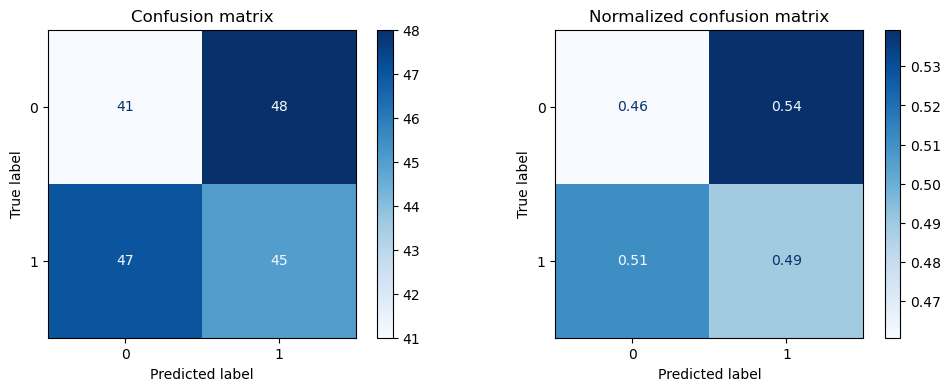

In [174]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

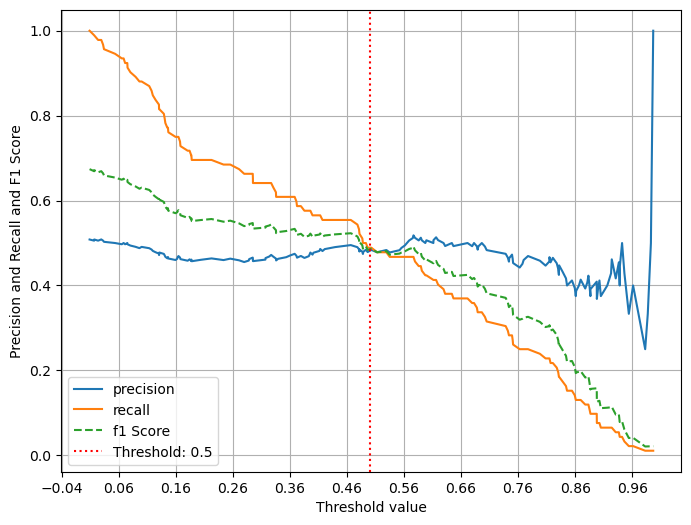

In [175]:
precision_recall_f1_curve_plot(y_test, lgbm.predict_proba(X_test)[:,1].reshape(-1,1))

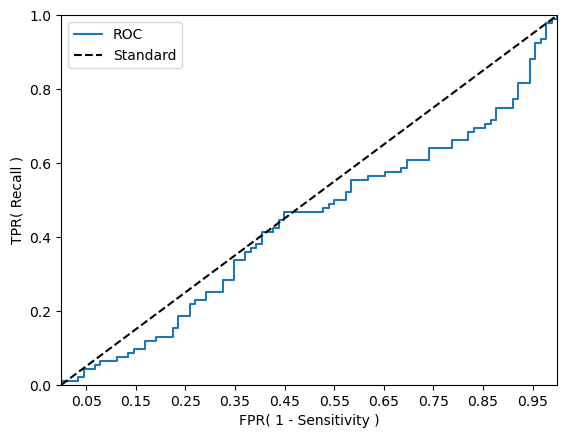

In [176]:
roc_curve_plot(y_test, lgbm.predict_proba(X_test)[:,1].reshape(-1,1))

표준화 진행

In [177]:
std_pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0   -1.031468         -1.004435           -0.258757                 -1.162877   
1   -1.031468         -1.004435           -0.561366                 -0.549730   
2    0.969492          0.995585            0.649069                 -1.162877   
3   -1.031468         -1.004435            0.346460                 -1.469450   
4    0.969492         -1.004435            0.346460                 -1.162877   
..        ...               ...                 ...                       ...   
899  0.969492         -1.004435            1.254286                  1.289711   
900  0.969492          0.995585            0.043851                 -1.469450   
901 -1.031468          0.995585           -1.166583                 -0.856303   
902 -1.031468          0.995585           -0.863974                  0.676564   
903  0.969492          0.995585            0.346460                 -0.243156   

     Nutritional Deficiencies     Stress  Poor Hair Care Habits   \
0                    -0.964617 -1.266555                1.013364   
1                    -0.028310  1.174736                1.013364   
2                    -1.588822  1.174736                1.013364   
3                    -1.276720  1.174736               -0.986813   
4                    -0.964617 -0.045909               -0.986813   
..                         ...       ...                     ...   
899                   0.595895 -0.045909                1.013364   
900                  -0.028310 -0.045909               -0.986813   
901                  -0.028310  1.174736                1.013364   
902                  -1.588822  1.174736                1.013364   
903                   0.907997 -0.045909               -0.986813   

     Environmental Factors   Smoking  Weight Loss   age_section  Hair Loss  
0                 0.973795 -1.047591     -0.944041     1.210301          0  
1                 0.973795 -1.047591      1.059276    -1.270679          0  
2                 0.973795 -1.047591     -0.944041     1.210301          0  
3                 0.973795  0.954571     -0.944041    -0.030189          1  
4                 0.973795 -1.047591      1.059276    -0.030189          1  
..                     ...       ...           ...          ...        ...  
899               0.973795  0.954571      1.059276    -0.030189          1  
900              -1.026911 -1.047591      1.059276     1.210301          0  
901              -1.026911  0.954571      1.059276    -1.270679          1  
902               0.973795  0.954571      1.059276    -0.030189          1  
903               0.973795 -1.047591     -0.944041    -0.030189          1  

[904 rows x 12 columns]

In [178]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


features, targets = std_pre_h_df.iloc[:, :-1], std_pre_h_df.iloc[:, -1]

parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, refit=True, return_train_score=True, n_jobs=-1)

y_train_over.value_counts()

Hair Loss
0    365
1    365
Name: count, dtype: int64

In [179]:
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 365, number of negative: 365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 730, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [180]:
std_lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(std_lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.515068   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.520548   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.502740   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.498630   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.502740   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.519178   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.495890   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.504110   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.506849   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.501370   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.512329   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.500000   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.504110   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.497260   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.498630   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.505479   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.501370   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.506849   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.513699   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.515068   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.502740   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.498630   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.516438   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.508219   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.516438   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.516438   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.512329   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.508219   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.497260   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.498630   

    rank_test_score  
0                 6  
1                 1  
2                18  
3                24  
4                18  
5                 2  
6                30  
7                16  
8                13  
9                22  
10                9  
11               23  
12               16  
13               28  
14               24  
15               15  
16               21  
17               13  
18                8  
19                7  
20               18  
21               24  
22                3  
23               11  
24                4  
25                4  
26                9  
27               11  
28               28  
29               24

In [181]:
std_lgbm = g_lgbm.best_estimator_
std_lgbm_prediction = std_lgbm.predict(X_test)

오차 행렬
[[41 48]
 [46 46]]
정확도: 0.4807, 정밀도: 0.4894, 재현율: 0.5000, F1: 0.4946, ROC-AUC: 0.4803
################################################################################


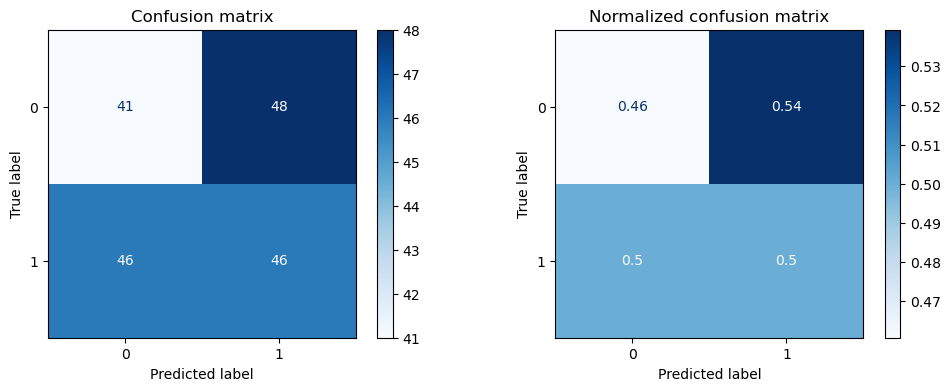

In [182]:
get_evaluation(y_test, std_lgbm_prediction, std_lgbm, X_test)

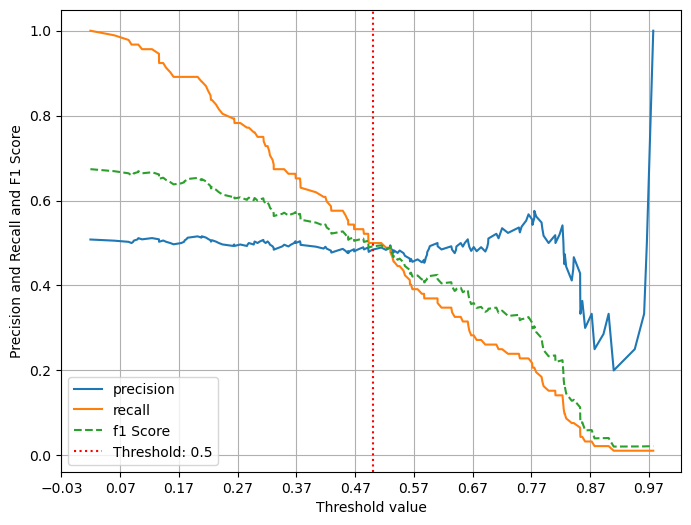

In [183]:
precision_recall_f1_curve_plot(y_test, std_lgbm.predict_proba(X_test)[:,1].reshape(-1,1))

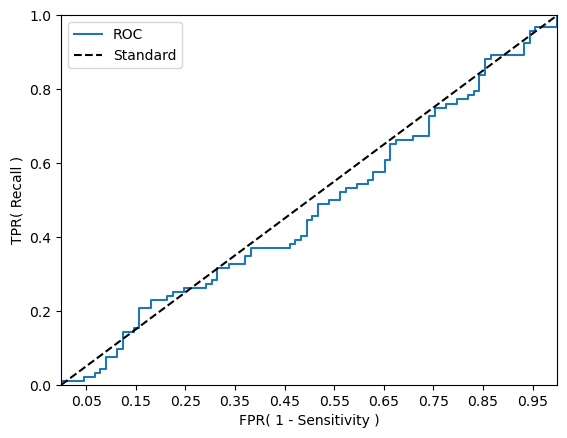

In [184]:
roc_curve_plot(y_test, std_lgbm.predict_proba(X_test)[:,1].reshape(-1,1))

array([[<Axes: title={'center': 'Genetics'}>,
        <Axes: title={'center': 'Hormonal Changes'}>,
        <Axes: title={'center': 'Medical Conditions'}>],
       [<Axes: title={'center': 'Medications & Treatments'}>,
        <Axes: title={'center': 'Nutritional Deficiencies '}>,
        <Axes: title={'center': 'Stress'}>],
       [<Axes: title={'center': 'Poor Hair Care Habits '}>,
        <Axes: title={'center': 'Environmental Factors'}>,
        <Axes: title={'center': 'Smoking'}>],
       [<Axes: title={'center': 'Weight Loss '}>,
        <Axes: title={'center': 'age_section'}>,
        <Axes: title={'center': 'Hair Loss'}>]], dtype=object)

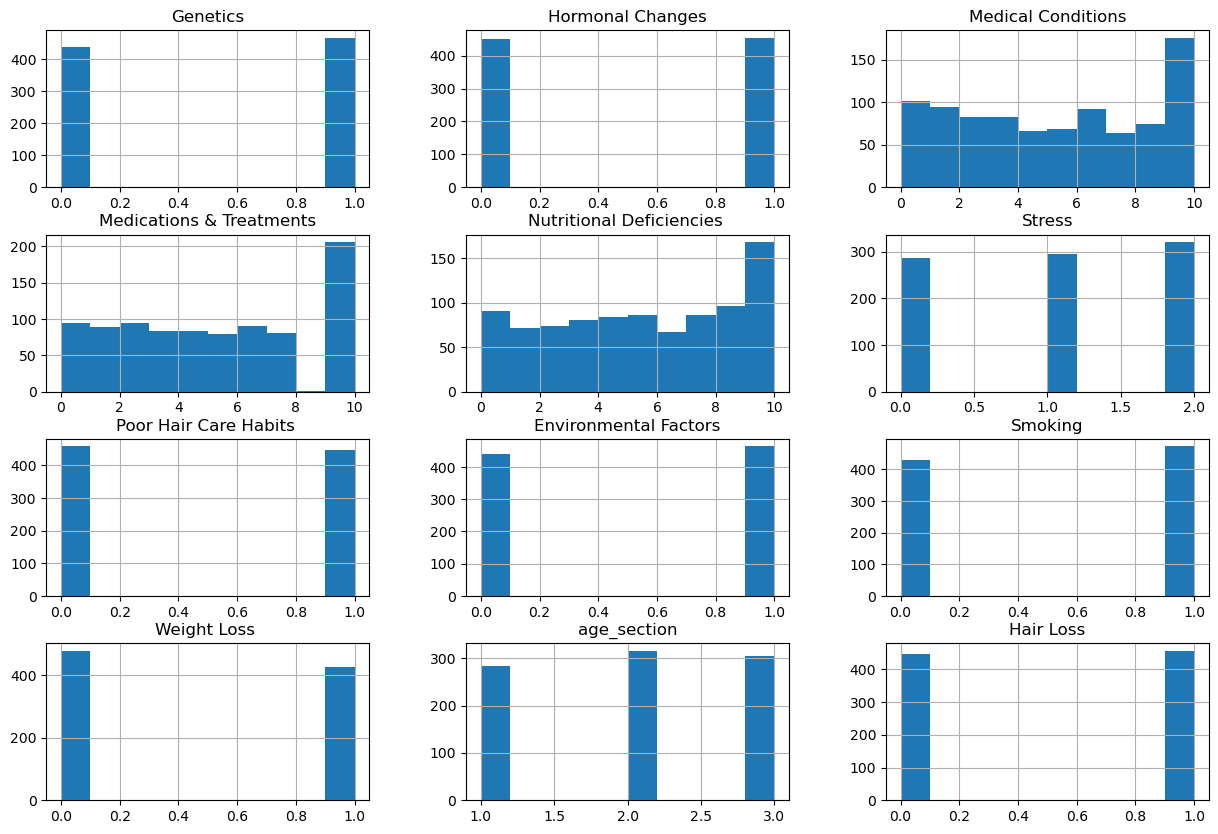

In [185]:
pre_h_df.hist(figsize=(15,10))

In [186]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [188]:
from sklearn.preprocessing import Binarizer

# 반올림
threshold = 0.23

proba = std_lgbm.predict_proba(X_test)
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)


오차 행렬
[[14 75]
 [16 76]]
정확도: 0.4972, 정밀도: 0.5033, 재현율: 0.8261, F1: 0.6255, ROC-AUC: 0.4917
################################################################################


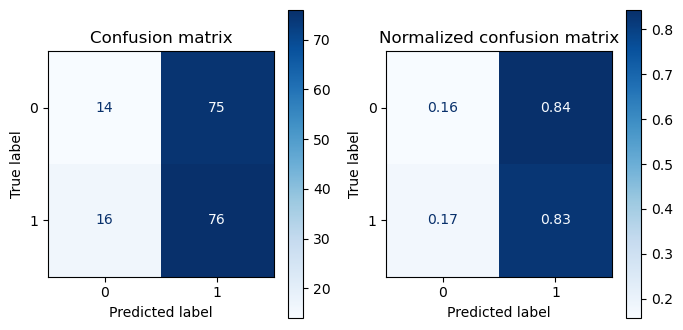

In [189]:
get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

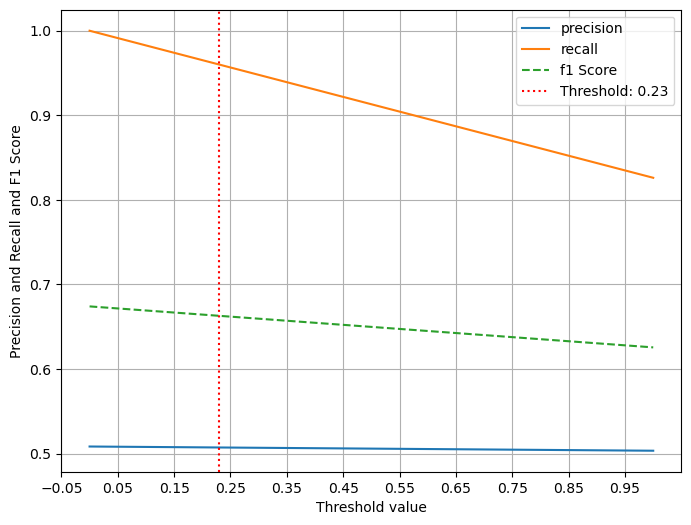

In [190]:
precision_recall_f1_curve_plot(y_test, custom_prediction, 0.23)

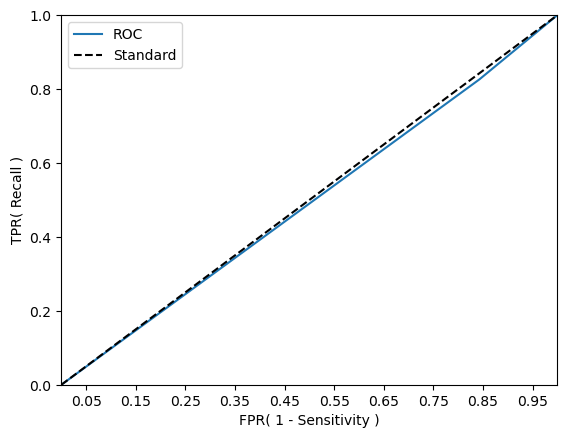

In [191]:
roc_curve_plot(y_test, custom_prediction)

In [192]:
threshold = 0.47

proba = std_xgb.predict_proba(X_test)
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)


오차 행렬
[[43 46]
 [45 47]]
정확도: 0.4972, 정밀도: 0.5054, 재현율: 0.5109, F1: 0.5081, ROC-AUC: 0.4970
################################################################################


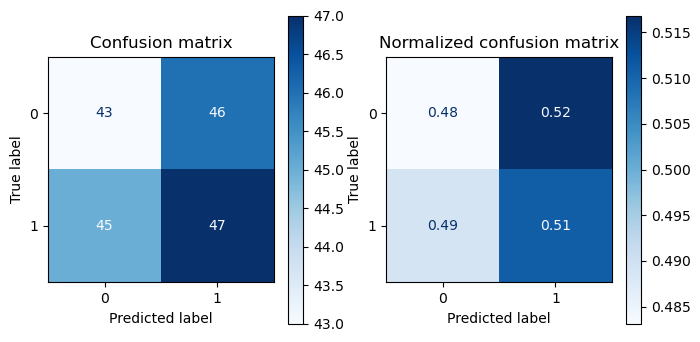

In [193]:
get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 각 모델의 예측값 계산
dtc_prediction = dtc.predict(X_test)
svc_prediction = std_svc.predict(X_test)
knn_prediction = std_knn.predict(X_test)
rfc_prediction = std_rfc.predict(X_test)
ada_prediction = std_ada.predict(X_test)
gbc_prediction = std_gbc.predict(X_test)
xgb_prediction = std_xgb.predict(X_test)
lgbm_prediction = std_lgbm.predict(X_test)

# 각 모델의 성능 지표 계산
dtc_accuracy = accuracy_score(y_test, dtc_prediction)
svc_accuracy = accuracy_score(y_test, svc_prediction)
knn_accuracy = accuracy_score(y_test, knn_prediction)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)
ada_accuracy = accuracy_score(y_test, ada_prediction)
gbc_accuracy = accuracy_score(y_test, gbc_prediction)
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
lgbm_accuracy = accuracy_score(y_test, lgbm_prediction)

dtc_precision = precision_score(y_test, dtc_prediction)
svc_precision = precision_score(y_test, svc_prediction)
knn_precision = precision_score(y_test, knn_prediction)
rfc_precision = precision_score(y_test, rfc_prediction)
ada_precision = precision_score(y_test, ada_prediction)
gbc_precision = precision_score(y_test, gbc_prediction)
xgb_precision = precision_score(y_test, xgb_prediction)
lgbm_precision = precision_score(y_test, lgbm_prediction)

dtc_recall = recall_score(y_test, dtc_prediction)
svc_recall = recall_score(y_test, svc_prediction)
knn_recall = recall_score(y_test, knn_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)
ada_recall = recall_score(y_test, ada_prediction)
gbc_recall = recall_score(y_test, gbc_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
lgbm_recall = recall_score(y_test, lgbm_prediction)

dtc_f1 = f1_score(y_test, dtc_prediction)
svc_f1 = f1_score(y_test, svc_prediction)
knn_f1 = f1_score(y_test, knn_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)
ada_f1 = f1_score(y_test, ada_prediction)
gbc_f1 = f1_score(y_test, gbc_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)
lgbm_f1 = f1_score(y_test, lgbm_prediction)

dtc_roc_auc = roc_auc_score(y_test, dtc_prediction)
svc_roc_auc = roc_auc_score(y_test, svc_prediction)
knn_roc_auc = roc_auc_score(y_test, knn_prediction)
rfc_roc_auc = roc_auc_score(y_test, rfc_prediction)
ada_roc_auc = roc_auc_score(y_test, ada_prediction)
gbc_roc_auc = roc_auc_score(y_test, gbc_prediction)
xgb_roc_auc = roc_auc_score(y_test, xgb_prediction)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_prediction)


In [195]:
accuracies = [dtc_accuracy, svc_accuracy,knn_accuracy,rfc_accuracy, ada_accuracy, gbc_accuracy, xgb_accuracy, lgbm_accuracy]
precisions = [dtc_precision, svc_precision, knn_precision, rfc_precision, ada_precision, gbc_precision, xgb_precision, lgbm_precision]
recalls = [dtc_recall, svc_recall, knn_recall, rfc_recall, ada_recall,gbc_recall, xgb_recall, lgbm_recall]
f1s = [dtc_f1, svc_f1, knn_f1, rfc_f1, ada_f1, gbc_f1, xgb_f1, lgbm_f1]
roc_aucs = [dtc_roc_auc, svc_roc_auc, knn_roc_auc, rfc_roc_auc, ada_roc_auc, gbc_roc_auc, xgb_roc_auc, lgbm_roc_auc]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\a

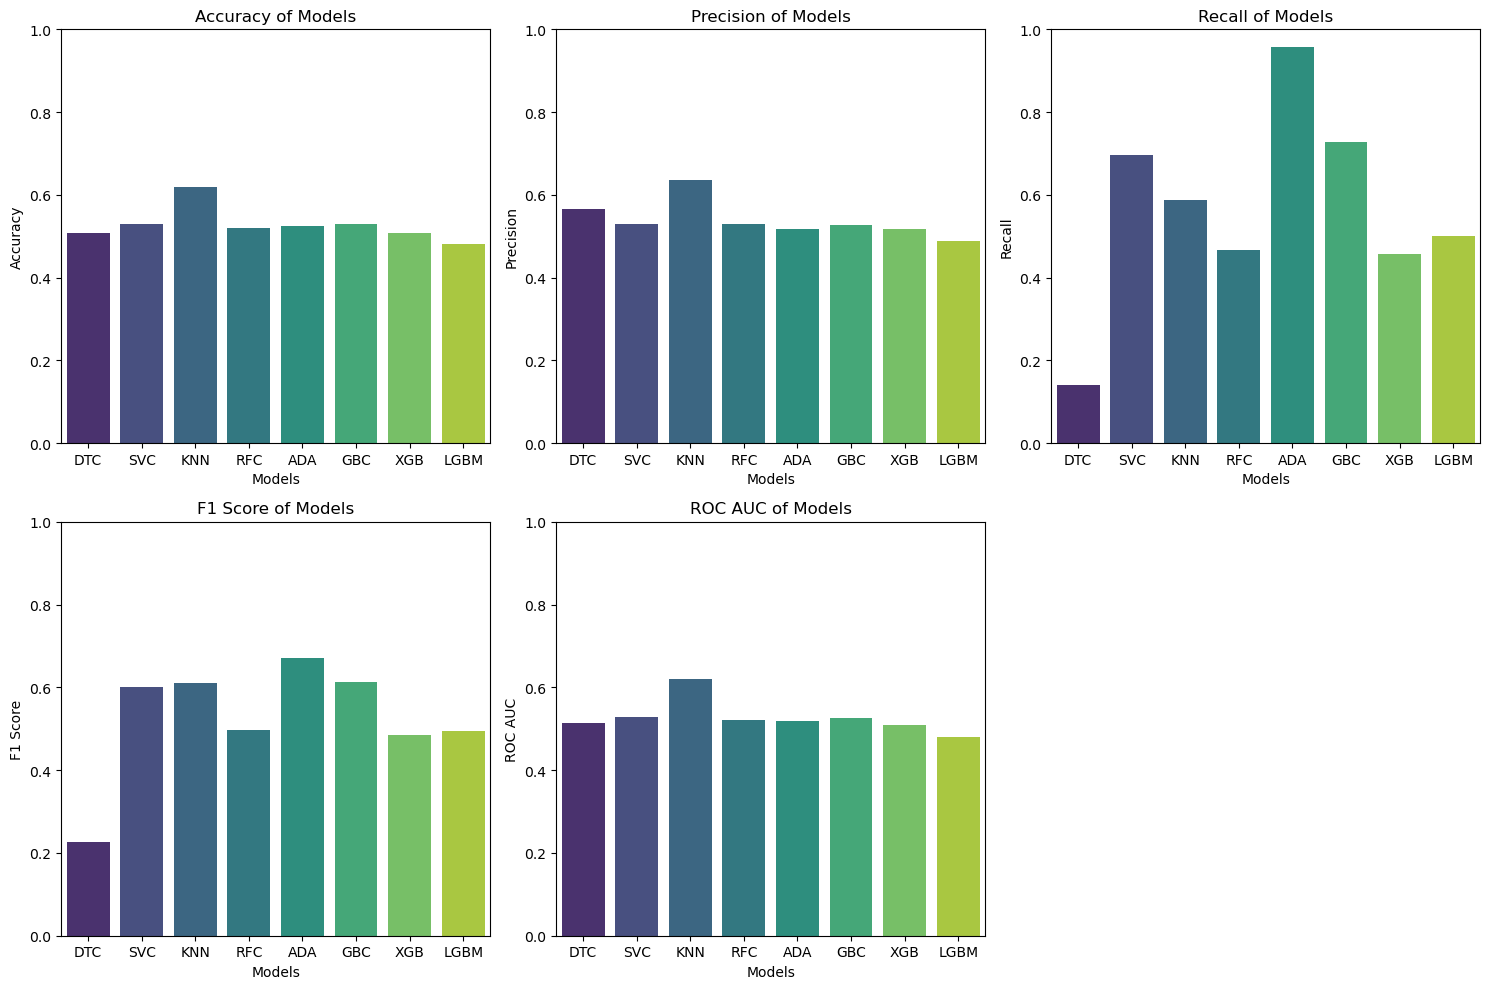

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

models_x = ['DTC', 'SVC', 'KNN', 'RFC', 'ADA', 'GBC', 'XGB', 'LGBM']
scores = [accuracies, precisions,recalls,f1s,roc_aucs ]
score_names = ['Accuracy','Precision','Recall','F1 Score','ROC AUC']

plt.figure(figsize=(15,10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=models_x, y=scores[i], palette='viridis')
    plt.xlabel('Models')
    plt.ylabel(score_names[i])
    plt.title('{} of Models'.format(score_names[i]))
    plt.ylim(0.0, 1.0)

plt.tight_layout()
plt.show()

-----------
## 최종 결론
- 탈모를 예측하기 위해 feature들을 분석했다.
- 상관관계는 다음과 같았다.

<img src='./hair_images/correlation.png' width='500px'>

- 상관관계 heatmap을 확인한 결과, 타겟 데이터와의 상관정도가 크게 있어보이지는 않는 것으로 확인이 되었다.
- 수치로 나타낸 결과는 다음과 같았다.

<img src='./hair_images/correlation_target.png' width='400px'>

- 수치로도 보았을 때 어떠한 feature가 ±0.1을 넘는 값이 없었다.
> 예측 모델을 구성해도 모델이 이 데이터를 잘 예측할 패턴을 찾지 못할 가능성이 크다.

### 훈련
- 훈련시킨 모델은 각각 다음과 같다.
> - DTC  
> - SVC  
> - KNN  
> - RandomForest  
> - Adaboost  
> - GBM  
> - XGBoost  
> - LightGBM  

In [197]:
predictions = [dtc_prediction, std_svc_prediction, std_knn_prediction, std_rfc_prediction, std_ada_prediction, std_gbc_prediction, std_xgb_prediction, std_lgbm_prediction]
model_names = ['Decision Tree', 'SVC', 'KNN', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM']

for model, prediction in zip(model_names,predictions):
    print(model)
    get_evaluation(y_test, prediction)

Decision Tree
오차 행렬
[[79 10]
 [79 13]]
정확도: 0.5083, 정밀도: 0.5652, 재현율: 0.1413, F1: 0.2261, ROC-AUC: 0.5145
################################################################################
SVC
오차 행렬
[[48 41]
 [49 43]]
정확도: 0.5028, 정밀도: 0.5119, 재현율: 0.4674, F1: 0.4886, ROC-AUC: 0.5034
################################################################################
KNN
오차 행렬
[[43 46]
 [45 47]]
정확도: 0.4972, 정밀도: 0.5054, 재현율: 0.5109, F1: 0.5081, ROC-AUC: 0.4970
################################################################################
Random Forest
오차 행렬
[[47 42]
 [48 44]]
정확도: 0.5028, 정밀도: 0.5116, 재현율: 0.4783, F1: 0.4944, ROC-AUC: 0.5032
################################################################################
AdaBoost
오차 행렬
[[46 43]
 [43 49]]
정확도: 0.5249, 정밀도: 0.5326, 재현율: 0.5326, F1: 0.5326, ROC-AUC: 0.5247
################################################################################
Gradient Boosting
오차 행렬
[[45 44]
 [54 38]]
정확도: 0.4586, 정밀도: 0.4634, 재현율: 0.4130, F1: 0.43

- 각 오차행렬을 확인한 결과, 정확도가 0.5 ±0.03 범위내에서 있다는 것을 알 수 있었다.
- 각 모델별로 점수의 그래프를 확인하면 다음과 같았다.

<img src='./hair_images/graphs.png'>

- 가장 향상된 모델로 알려진 LightGBM을 precision, recall, f1_score와 roc_auc 그래프를 나타내었다.

<img src='./hair_images/lgbm_matrix.png' width='700px'>
<div style="display: flex;">
    <img src='./hair_images/precision_recall.png' width='400px'>
    <img src='./hair_images/roc_auc.png' width='400px'>
</div>


- 오차행렬을 확인하면, 위 모델은 맞추는 경우와 틀리는 경우가 반반인 것을 알 수 있다.
- 이에 맞춰 precision_recall_curve를 확인해보면 recall수치는 급격히 감소하는데 반면, precision은 거의 일정하게 유지되고 있다.
-  f1_score는 recall 수치가 급격히 감소함에 따라 맞춰서 0.5를 기준으로 급격히 감소한다.
-  roc_auc curve를 확인한 결과, 가운데 기준선을 넘지 못하고 있다.



- 탈모를 예측할 때, 실제 탈모 환자를 놓치지 않고 예측하는 것이 더 좋다고 판단했고, 위 precision 그래프를 통해서도 Threshold수치를 낮추어 주는것이 전체적인 점수가 올라가는 것으로 판단되어, 임계값을 내려주었다.
- 아래는 임계값을 0.23으로 내려주었을 때의 오차행렬과 그래프이다.

<img src='./hair_images/lgbm_matrix02.png' width='700px'>
<div style='display: flex;'>
    <img src='./hair_images/precision_recall02.png' width='400px'>
    <img src='./hair_images/roc_auc02.png' width='400px'>
</div>

### 🚩최종 결론
- 1. 임계값을 조정하여 재현율을 높였지만, 이로 인해 정밀도가 더 낮아지는 등의 트레이드오프가 발생했다.
  2. 상관관계와 전체적인 그래프의 형태, 그리고 오차행렬을 확인한 결과 모델이 패턴을 충분히 학습하지 못했음을 확인했다.
  3. 평균적인 accuracy_score가 0.5에 머무르는 것으로 보아 모델이 무작위로 예측하는 것과 다르지 않다는 것을 볼 수 있었다.
> 따라서, 이 데이터셋만으로는 모델이 탈모 여부를 예측하는 데에 한계가 있다고 결론을 지었다.  
> 이에 추가적인 데이터 수집이 필요할 것으로 보인다.


### 느낀점
- 특성간의 상관관계를 조사하고 permutation_importance 기법을 활용해 중요도가 낮은 특성을 제거하면 모델의 성능을 높일 수 있었을 텐데, 이번 데이터 세트 분석에서는 이러한 접근법을 충분히 활용하지 못하여 아쉬웠다.

## **data engineering** 적용

In [198]:
import pandas as pd
import numpy as np

hair_df = pd.read_csv('./datasets/Predict Hair Fall.csv', low_memory=False)
hair_df

Id Genetics Hormonal Changes     Medical Conditions  \
0    133992      Yes               No                No Data   
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
4    111915       No               No              Psoriasis   
..      ...      ...              ...                    ...   
994  184367      Yes               No  Seborrheic Dermatitis   
995  164777      Yes              Yes                No Data   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                      No Data      Magnesium deficiency  Moderate   19   
1                  Antibiotics      Magnesium deficiency      High   43   
2             Antifungal Cream        Protein deficiency  Moderate   26   
3                  Antibiotics        Biotin Deficiency   Moderate   46   
4                     Accutane           Iron deficiency  Moderate   30   
..                         ...                       ...       ...  ...   
994                    Rogaine      Vitamin A Deficiency       Low   33   
995                   Accutane        Protein deficiency       Low   47   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
4                       No                   Yes     Yes           No   
..                     ...                   ...     ...          ...   
994                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss  
0            0  
1            0  
2            0  
3            0  
4            1  
..         ...  
994          1  
995          0  
996          1  
997          1  
998          1  

[999 rows x 13 columns]

In [199]:
pre_h_df = hair_df.copy()

In [200]:
pre_h_df=pre_h_df.drop(labels=['Id'], axis=1)

In [201]:
pre_h_df

Genetics Hormonal Changes     Medical Conditions  \
0        Yes               No                No Data   
1         No               No                 Eczema   
2         No               No             Dermatosis   
3        Yes              Yes               Ringworm   
4         No               No              Psoriasis   
..       ...              ...                    ...   
994      Yes               No  Seborrheic Dermatitis   
995      Yes              Yes                No Data   
996       No              Yes  Androgenetic Alopecia   
997       No              Yes             Dermatitis   
998      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                      No Data      Magnesium deficiency  Moderate   19   
1                  Antibiotics      Magnesium deficiency      High   43   
2             Antifungal Cream        Protein deficiency  Moderate   26   
3                  Antibiotics        Biotin Deficiency   Moderate   46   
4                     Accutane           Iron deficiency  Moderate   30   
..                         ...                       ...       ...  ...   
994                    Rogaine      Vitamin A Deficiency       Low   33   
995                   Accutane        Protein deficiency       Low   47   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
0                      Yes                   Yes      No           No   
1                      Yes                   Yes      No           No   
2                      Yes                   Yes      No          Yes   
3                      Yes                   Yes      No           No   
4                       No                   Yes     Yes           No   
..                     ...                   ...     ...          ...   
994                    Yes                   Yes     Yes          Yes   
995                     No                    No      No          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss  
0            0  
1            0  
2            0  
3            0  
4            1  
..         ...  
994          1  
995          0  
996          1  
997          1  
998          1  

[999 rows x 12 columns]

In [202]:
hair1_df = pre_h_df[pre_h_df['Hair Loss']==1]
hair1_df

Genetics Hormonal Changes     Medical Conditions  \
4         No               No              Psoriasis   
5        Yes               No              Psoriasis   
6        Yes              Yes                No Data   
8        Yes               No                 Eczema   
11        No              Yes       Alopecia Areata    
..       ...              ...                    ...   
992      Yes              Yes             Dermatosis   
994      Yes               No  Seborrheic Dermatitis   
996       No              Yes  Androgenetic Alopecia   
997       No              Yes             Dermatitis   
998      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
4                     Accutane           Iron deficiency  Moderate   30   
5                  Antibiotics      Magnesium deficiency       Low   37   
6                      No Data       Selenium deficiency      High   40   
8                     Steroids       Selenium deficiency  Moderate   19   
11                    Accutane           Zinc Deficiency      High   48   
..                         ...                       ...       ...  ...   
992                    Rogaine      Magnesium deficiency       Low   30   
994                    Rogaine      Vitamin A Deficiency       Low   33   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

    Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   \
4                       No                   Yes     Yes           No   
5                       No                   Yes      No          Yes   
6                      Yes                    No      No           No   
8                       No                    No     Yes          Yes   
11                      No                    No      No           No   
..                     ...                   ...     ...          ...   
992                     No                    No      No           No   
994                    Yes                   Yes     Yes          Yes   
996                    Yes                    No     Yes          Yes   
997                    Yes                   Yes     Yes          Yes   
998                     No                   Yes      No           No   

     Hair Loss  
4            1  
5            1  
6            1  
8            1  
11           1  
..         ...  
992          1  
994          1  
996          1  
997          1  
998          1  

[497 rows x 12 columns]

In [203]:
def translate(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [204]:
hair1_df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [205]:
hair1_df['Genetics'] = hair1_df['Genetics'].apply(translate)
hair1_df['Hormonal Changes'] = hair1_df['Hormonal Changes'].apply(translate)
hair1_df['Poor Hair Care Habits '] = hair1_df['Poor Hair Care Habits '].apply(translate)
hair1_df['Environmental Factors'] = hair1_df['Environmental Factors'].apply(translate)
hair1_df['Smoking'] = hair1_df['Smoking'].apply(translate)
hair1_df['Weight Loss '] = hair1_df['Weight Loss '].apply(translate)

C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\3387634447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair1_df['Genetics'] = hair1_df['Genetics'].apply(translate)
C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\3387634447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair1_df['Hormonal Changes'] = hair1_df['Hormonal Changes'].apply(translate)
C:\Users\kangh\AppData\Local\Temp\ipykernel_23148\3387634447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [206]:
hair1_df

Genetics  Hormonal Changes     Medical Conditions  \
4           0                 0              Psoriasis   
5           1                 0              Psoriasis   
6           1                 1                No Data   
8           1                 0                 Eczema   
11          0                 1       Alopecia Areata    
..        ...               ...                    ...   
992         1                 1             Dermatosis   
994         1                 0  Seborrheic Dermatitis   
996         0                 1  Androgenetic Alopecia   
997         0                 1             Dermatitis   
998         1                 1              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
4                     Accutane           Iron deficiency  Moderate   30   
5                  Antibiotics      Magnesium deficiency       Low   37   
6                      No Data       Selenium deficiency      High   40   
8                     Steroids       Selenium deficiency  Moderate   19   
11                    Accutane           Zinc Deficiency      High   48   
..                         ...                       ...       ...  ...   
992                    Rogaine      Magnesium deficiency       Low   30   
994                    Rogaine      Vitamin A Deficiency       Low   33   
996           Antidepressants         Protein deficiency  Moderate   20   
997           Immunomodulators        Biotin Deficiency   Moderate   32   
998  Blood Pressure Medication      Vitamin D Deficiency       Low   34   

     Poor Hair Care Habits   Environmental Factors  Smoking  Weight Loss   \
4                         0                      1        1             0   
5                         0                      1        0             1   
6                         1                      0        0             0   
8                         0                      0        1             1   
11                        0                      0        0             0   
..                      ...                    ...      ...           ...   
992                       0                      0        0             0   
994                       1                      1        1             1   
996                       1                      0        1             1   
997                       1                      1        1             1   
998                       0                      1        0             0   

     Hair Loss  
4            1  
5            1  
6            1  
8            1  
11           1  
..         ...  
992          1  
994          1  
996          1  
997          1  
998          1  

[497 rows x 12 columns]

In [207]:
hair1_df['Medical Conditions'].value_counts()

Medical Conditions
Alopecia Areata          61
Androgenetic Alopecia    55
Psoriasis                50
Seborrheic Dermatitis    50
No Data                  47
Dermatitis               44
Dermatosis               43
Thyroid Problems         43
Scalp Infection          38
Eczema                   33
Ringworm                 33
Name: count, dtype: int64

Alopecia Areata          61  
Androgenetic Alopecia    55  
Psoriasis                50  
Seborrheic Dermatitis    50  
No Data                  47  
Dermatitis               44  
Dermatosis               43  
Thyroid Problems         43  
Scalp Infection          38  
Eczema                   33  
Ringworm                 33  

In [208]:
new_df = hair1_df['Medical Conditions'].reset_index(drop=True)
new_df.value_counts().index

Index(['Alopecia Areata ', 'Androgenetic Alopecia', 'Psoriasis',
       'Seborrheic Dermatitis', 'No Data', 'Dermatitis', 'Dermatosis',
       'Thyroid Problems', 'Scalp Infection', 'Eczema', 'Ringworm'],
      dtype='object', name='Medical Conditions')

In [209]:
new_df = new_df.value_counts().reset_index()
new_df

Medical Conditions  count
0        Alopecia Areata      61
1   Androgenetic Alopecia     55
2               Psoriasis     50
3   Seborrheic Dermatitis     50
4                 No Data     47
5              Dermatitis     44
6              Dermatosis     43
7        Thyroid Problems     43
8         Scalp Infection     38
9                  Eczema     33
10               Ringworm     33

In [210]:
new_df['count'].sum()

497

In [211]:
new_df['ratio'] = new_df['count'] / new_df['count'].sum()

In [212]:
new_df

Medical Conditions  count     ratio
0        Alopecia Areata      61  0.122736
1   Androgenetic Alopecia     55  0.110664
2               Psoriasis     50  0.100604
3   Seborrheic Dermatitis     50  0.100604
4                 No Data     47  0.094567
5              Dermatitis     44  0.088531
6              Dermatosis     43  0.086519
7        Thyroid Problems     43  0.086519
8         Scalp Infection     38  0.076459
9                  Eczema     33  0.066398
10               Ringworm     33  0.066398

In [213]:
def translate_MC(x):
    if x == 'Alopecia Areata ':
        return 1 + 1 * 0.122736
    if x == 'Androgenetic Alopecia':
        return 1 + 1 * 0.110664
    if x == 'Seborrheic Dermatitis':
        return 1 + 1 * 0.100604
    if x == 'Psoriasis':
        return 1 + 1 * 0.100604
    if x == 'No Data':
        return 1 + 1 * 0.094567
    if x == 'Dermatitis':
        return 1 + 1 * 0.088531
    if x == 'Dermatosis':
        return 1 + 1 * 0.086519
    if x == 'Thyroid Problems':
        return 1 + 1 * 0.086519
    if x == 'Scalp Infection':
        return 1 + 1 * 0.076459
    if x == 'Eczema':
        return 1 + 1 * 0.066398
    if x == 'Ringworm':
        return 1 + 1 * 0.066398

In [214]:
pre_h_df['Medical Conditions'] = pre_h_df['Medical Conditions'].apply(translate_MC)

In [215]:
pre_h_df

Genetics Hormonal Changes  Medical Conditions   Medications & Treatments  \
0        Yes               No            1.094567                    No Data   
1         No               No            1.066398                Antibiotics   
2         No               No            1.086519           Antifungal Cream   
3        Yes              Yes            1.066398                Antibiotics   
4         No               No            1.100604                   Accutane   
..       ...              ...                 ...                        ...   
994      Yes               No            1.100604                    Rogaine   
995      Yes              Yes            1.094567                   Accutane   
996       No              Yes            1.110664           Antidepressants    
997       No              Yes            1.088531           Immunomodulators   
998      Yes              Yes            1.100604  Blood Pressure Medication   

    Nutritional Deficiencies     Stress  Age Poor Hair Care Habits   \
0        Magnesium deficiency  Moderate   19                    Yes   
1        Magnesium deficiency      High   43                    Yes   
2          Protein deficiency  Moderate   26                    Yes   
3          Biotin Deficiency   Moderate   46                    Yes   
4             Iron deficiency  Moderate   30                     No   
..                        ...       ...  ...                    ...   
994      Vitamin A Deficiency       Low   33                    Yes   
995        Protein deficiency       Low   47                     No   
996        Protein deficiency  Moderate   20                    Yes   
997        Biotin Deficiency   Moderate   32                    Yes   
998      Vitamin D Deficiency       Low   34                     No   

    Environmental Factors Smoking Weight Loss   Hair Loss  
0                     Yes      No           No          0  
1                     Yes      No           No          0  
2                     Yes      No          Yes          0  
3                     Yes      No           No          0  
4                     Yes     Yes           No          1  
..                    ...     ...          ...        ...  
994                   Yes     Yes          Yes          1  
995                    No      No          Yes          0  
996                    No     Yes          Yes          1  
997                   Yes     Yes          Yes          1  
998                   Yes      No           No          1  

[999 rows x 12 columns]

In [216]:
new1_df = hair1_df['Medications & Treatments'].reset_index(drop=True)
new1_df.value_counts().index

Index(['Steroids', 'Rogaine', 'Antidepressants ', 'Heart Medication ',
       'Accutane', 'Antibiotics', 'Chemotherapy', 'Antifungal Cream',
       'Blood Pressure Medication', 'Immunomodulators', 'No Data'],
      dtype='object', name='Medications & Treatments')

In [217]:
new1_df = new1_df.value_counts().reset_index()
new1_df

Medications & Treatments  count
0                    Steroids     59
1                     Rogaine     59
2            Antidepressants      53
3           Heart Medication      53
4                    Accutane     50
5                 Antibiotics     50
6                Chemotherapy     46
7            Antifungal Cream     44
8   Blood Pressure Medication     42
9            Immunomodulators     40
10                    No Data      1

In [218]:
new1_df['ratio'] = new1_df['count'] / new1_df['count'].sum()
new1_df

Medications & Treatments  count     ratio
0                    Steroids     59  0.118712
1                     Rogaine     59  0.118712
2            Antidepressants      53  0.106640
3           Heart Medication      53  0.106640
4                    Accutane     50  0.100604
5                 Antibiotics     50  0.100604
6                Chemotherapy     46  0.092555
7            Antifungal Cream     44  0.088531
8   Blood Pressure Medication     42  0.084507
9            Immunomodulators     40  0.080483
10                    No Data      1  0.002012

In [219]:
def translate_MT(x):
    if x == 'Steroids':
        return 1 + 1 * 0.118712
    if x == 'Rogaine':
        return 1 + 1 * 0.118712
    if x == 'Antidepressants ':
        return 1 + 1 * 0.106640
    if x == 'Heart Medication ':
        return 1 + 1 * 0.106640
    if x == 'Accutane':
        return 1 + 1 * 0.100604
    if x == 'Antibiotics':
        return 1 + 1 * 0.100604
    if x == 'Chemotherapy':
        return 1 + 1 * 0.092555
    if x == 'Antifungal Cream':
        return 1 + 1 * 0.088531
    if x == 'Blood Pressure Medication':
        return 1 + 1 * 0.084507
    if x == 'Immunomodulators':
        return 1 + 1 * 0.080483
    if x == 'No Data':
        return 1 + 1 * 0.002012

In [220]:
pre_h_df['Medications & Treatments'] = pre_h_df['Medications & Treatments'].apply(translate_MT)

In [221]:
pre_h_df

Genetics Hormonal Changes  Medical Conditions  Medications & Treatments  \
0        Yes               No            1.094567                  1.002012   
1         No               No            1.066398                  1.100604   
2         No               No            1.086519                  1.088531   
3        Yes              Yes            1.066398                  1.100604   
4         No               No            1.100604                  1.100604   
..       ...              ...                 ...                       ...   
994      Yes               No            1.100604                  1.118712   
995      Yes              Yes            1.094567                  1.100604   
996       No              Yes            1.110664                  1.106640   
997       No              Yes            1.088531                  1.080483   
998      Yes              Yes            1.100604                  1.084507   

    Nutritional Deficiencies     Stress  Age Poor Hair Care Habits   \
0        Magnesium deficiency  Moderate   19                    Yes   
1        Magnesium deficiency      High   43                    Yes   
2          Protein deficiency  Moderate   26                    Yes   
3          Biotin Deficiency   Moderate   46                    Yes   
4             Iron deficiency  Moderate   30                     No   
..                        ...       ...  ...                    ...   
994      Vitamin A Deficiency       Low   33                    Yes   
995        Protein deficiency       Low   47                     No   
996        Protein deficiency  Moderate   20                    Yes   
997        Biotin Deficiency   Moderate   32                    Yes   
998      Vitamin D Deficiency       Low   34                     No   

    Environmental Factors Smoking Weight Loss   Hair Loss  
0                     Yes      No           No          0  
1                     Yes      No           No          0  
2                     Yes      No          Yes          0  
3                     Yes      No           No          0  
4                     Yes     Yes           No          1  
..                    ...     ...          ...        ...  
994                   Yes     Yes          Yes          1  
995                    No      No          Yes          0  
996                    No     Yes          Yes          1  
997                   Yes     Yes          Yes          1  
998                   Yes      No           No          1  

[999 rows x 12 columns]

In [222]:
pre_h_df[pre_h_df['Medications & Treatments'].isna()]

Empty DataFrame
Columns: [Genetics, Hormonal Changes, Medical Conditions, Medications & Treatments, Nutritional Deficiencies , Stress, Age, Poor Hair Care Habits , Environmental Factors, Smoking, Weight Loss , Hair Loss]
Index: []

In [223]:
new2_df = hair1_df['Nutritional Deficiencies '].reset_index(drop=True)
new2_df.value_counts().index

Index(['Vitamin D Deficiency', 'Zinc Deficiency', 'Vitamin A Deficiency',
       'Protein deficiency', 'Magnesium deficiency', 'Biotin Deficiency ',
       'Selenium deficiency', 'No Data', 'Omega-3 fatty acids',
       'Iron deficiency', 'Vitamin E deficiency'],
      dtype='object', name='Nutritional Deficiencies ')

In [224]:
new2_df = new2_df.value_counts().reset_index()
new2_df

Nutritional Deficiencies   count
0       Vitamin D Deficiency     52
1            Zinc Deficiency     51
2       Vitamin A Deficiency     51
3         Protein deficiency     47
4       Magnesium deficiency     46
5         Biotin Deficiency      46
6        Selenium deficiency     42
7                    No Data     42
8        Omega-3 fatty acids     42
9            Iron deficiency     40
10      Vitamin E deficiency     38

In [225]:
new2_df['ratio'] = new2_df['count'] / new2_df['count'].sum()
new2_df

Nutritional Deficiencies   count     ratio
0       Vitamin D Deficiency     52  0.104628
1            Zinc Deficiency     51  0.102616
2       Vitamin A Deficiency     51  0.102616
3         Protein deficiency     47  0.094567
4       Magnesium deficiency     46  0.092555
5         Biotin Deficiency      46  0.092555
6        Selenium deficiency     42  0.084507
7                    No Data     42  0.084507
8        Omega-3 fatty acids     42  0.084507
9            Iron deficiency     40  0.080483
10      Vitamin E deficiency     38  0.076459

In [226]:
def translate_ND(x):
    if x == 'Vitamin D Deficiency':
        return 1 + 1 * 0.104628
    if x == 'Zinc Deficiency':
        return 1 + 1 * 0.102616
    if x == 'Vitamin A Deficiency':
        return 1 + 1 * 0.102616
    if x == 'Protein deficiency':
        return 1 + 1 * 0.094567
    if x == 'Magnesium deficiency':
        return 1 + 1 * 0.092555
    if x == 'Biotin Deficiency ':
        return 1 + 1 * 0.092555
    if x == 'Selenium deficiency':
        return 1 + 1 * 0.084507
    if x == 'No Data':
        return 1 + 1 * 0.084507
    if x == 'Omega-3 fatty acids':
        return 1 + 1 * 0.084507
    if x == 'Iron deficiency':
        return 1 + 1 * 0.080483
    if x == 'Vitamin E deficiency':
        return 1 + 1 * 0.076459

In [227]:
pre1_h_df = pre_h_df.copy()

In [228]:
pre1_h_df['Nutritional Deficiencies '] = pre1_h_df['Nutritional Deficiencies '].apply(translate_ND)

In [229]:
pre1_h_df

Genetics Hormonal Changes  Medical Conditions  Medications & Treatments  \
0        Yes               No            1.094567                  1.002012   
1         No               No            1.066398                  1.100604   
2         No               No            1.086519                  1.088531   
3        Yes              Yes            1.066398                  1.100604   
4         No               No            1.100604                  1.100604   
..       ...              ...                 ...                       ...   
994      Yes               No            1.100604                  1.118712   
995      Yes              Yes            1.094567                  1.100604   
996       No              Yes            1.110664                  1.106640   
997       No              Yes            1.088531                  1.080483   
998      Yes              Yes            1.100604                  1.084507   

     Nutritional Deficiencies     Stress  Age Poor Hair Care Habits   \
0                     1.092555  Moderate   19                    Yes   
1                     1.092555      High   43                    Yes   
2                     1.094567  Moderate   26                    Yes   
3                     1.092555  Moderate   46                    Yes   
4                     1.080483  Moderate   30                     No   
..                         ...       ...  ...                    ...   
994                   1.102616       Low   33                    Yes   
995                   1.094567       Low   47                     No   
996                   1.094567  Moderate   20                    Yes   
997                   1.092555  Moderate   32                    Yes   
998                   1.104628       Low   34                     No   

    Environmental Factors Smoking Weight Loss   Hair Loss  
0                     Yes      No           No          0  
1                     Yes      No           No          0  
2                     Yes      No          Yes          0  
3                     Yes      No           No          0  
4                     Yes     Yes           No          1  
..                    ...     ...          ...        ...  
994                   Yes     Yes          Yes          1  
995                    No      No          Yes          0  
996                    No     Yes          Yes          1  
997                   Yes     Yes          Yes          1  
998                   Yes      No           No          1  

[999 rows x 12 columns]

In [230]:
pre1_h_df['Nutritional Deficiencies '].isna().sum()

0

In [231]:
pre_h_df['Nutritional Deficiencies '] = pre_h_df['Nutritional Deficiencies '].apply(translate_ND)

In [232]:
pre_h_df

Genetics Hormonal Changes  Medical Conditions  Medications & Treatments  \
0        Yes               No            1.094567                  1.002012   
1         No               No            1.066398                  1.100604   
2         No               No            1.086519                  1.088531   
3        Yes              Yes            1.066398                  1.100604   
4         No               No            1.100604                  1.100604   
..       ...              ...                 ...                       ...   
994      Yes               No            1.100604                  1.118712   
995      Yes              Yes            1.094567                  1.100604   
996       No              Yes            1.110664                  1.106640   
997       No              Yes            1.088531                  1.080483   
998      Yes              Yes            1.100604                  1.084507   

     Nutritional Deficiencies     Stress  Age Poor Hair Care Habits   \
0                     1.092555  Moderate   19                    Yes   
1                     1.092555      High   43                    Yes   
2                     1.094567  Moderate   26                    Yes   
3                     1.092555  Moderate   46                    Yes   
4                     1.080483  Moderate   30                     No   
..                         ...       ...  ...                    ...   
994                   1.102616       Low   33                    Yes   
995                   1.094567       Low   47                     No   
996                   1.094567  Moderate   20                    Yes   
997                   1.092555  Moderate   32                    Yes   
998                   1.104628       Low   34                     No   

    Environmental Factors Smoking Weight Loss   Hair Loss  
0                     Yes      No           No          0  
1                     Yes      No           No          0  
2                     Yes      No          Yes          0  
3                     Yes      No           No          0  
4                     Yes     Yes           No          1  
..                    ...     ...          ...        ...  
994                   Yes     Yes          Yes          1  
995                    No      No          Yes          0  
996                    No     Yes          Yes          1  
997                   Yes     Yes          Yes          1  
998                   Yes      No           No          1  

[999 rows x 12 columns]

In [233]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

feature = encoder.fit_transform(pre_h_df['Stress'])
pre_h_df['Stress'] = feature

In [234]:
pre_h_df

Genetics Hormonal Changes  Medical Conditions  Medications & Treatments  \
0        Yes               No            1.094567                  1.002012   
1         No               No            1.066398                  1.100604   
2         No               No            1.086519                  1.088531   
3        Yes              Yes            1.066398                  1.100604   
4         No               No            1.100604                  1.100604   
..       ...              ...                 ...                       ...   
994      Yes               No            1.100604                  1.118712   
995      Yes              Yes            1.094567                  1.100604   
996       No              Yes            1.110664                  1.106640   
997       No              Yes            1.088531                  1.080483   
998      Yes              Yes            1.100604                  1.084507   

     Nutritional Deficiencies   Stress  Age Poor Hair Care Habits   \
0                     1.092555       2   19                    Yes   
1                     1.092555       0   43                    Yes   
2                     1.094567       2   26                    Yes   
3                     1.092555       2   46                    Yes   
4                     1.080483       2   30                     No   
..                         ...     ...  ...                    ...   
994                   1.102616       1   33                    Yes   
995                   1.094567       1   47                     No   
996                   1.094567       2   20                    Yes   
997                   1.092555       2   32                    Yes   
998                   1.104628       1   34                     No   

    Environmental Factors Smoking Weight Loss   Hair Loss  
0                     Yes      No           No          0  
1                     Yes      No           No          0  
2                     Yes      No          Yes          0  
3                     Yes      No           No          0  
4                     Yes     Yes           No          1  
..                    ...     ...          ...        ...  
994                   Yes     Yes          Yes          1  
995                    No      No          Yes          0  
996                    No     Yes          Yes          1  
997                   Yes     Yes          Yes          1  
998                   Yes      No           No          1  

[999 rows x 12 columns]

In [235]:
pre_h_df['Genetics'] = pre_h_df['Genetics'].apply(translate)
pre_h_df['Hormonal Changes'] = pre_h_df['Hormonal Changes'].apply(translate)
pre_h_df['Poor Hair Care Habits '] = pre_h_df['Poor Hair Care Habits '].apply(translate)
pre_h_df['Environmental Factors'] = pre_h_df['Environmental Factors'].apply(translate)
pre_h_df['Smoking'] = pre_h_df['Smoking'].apply(translate)
pre_h_df['Weight Loss '] = pre_h_df['Weight Loss '].apply(translate)

In [236]:
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0            1.094567                  1.002012   
1           0                 0            1.066398                  1.100604   
2           0                 0            1.086519                  1.088531   
3           1                 1            1.066398                  1.100604   
4           0                 0            1.100604                  1.100604   
..        ...               ...                 ...                       ...   
994         1                 0            1.100604                  1.118712   
995         1                 1            1.094567                  1.100604   
996         0                 1            1.110664                  1.106640   
997         0                 1            1.088531                  1.080483   
998         1                 1            1.100604                  1.084507   

     Nutritional Deficiencies   Stress  Age  Poor Hair Care Habits   \
0                     1.092555       2   19                       1   
1                     1.092555       0   43                       1   
2                     1.094567       2   26                       1   
3                     1.092555       2   46                       1   
4                     1.080483       2   30                       0   
..                         ...     ...  ...                     ...   
994                   1.102616       1   33                       1   
995                   1.094567       1   47                       0   
996                   1.094567       2   20                       1   
997                   1.092555       2   32                       1   
998                   1.104628       1   34                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  
0                        1        0             0          0  
1                        1        0             0          0  
2                        1        0             1          0  
3                        1        0             0          0  
4                        1        1             0          1  
..                     ...      ...           ...        ...  
994                      1        1             1          1  
995                      0        0             1          0  
996                      0        1             1          1  
997                      1        1             1          1  
998                      1        0             0          1  

[999 rows x 12 columns]

In [237]:
pre_h_df['Total_Score'] = pre_h_df['Genetics'] + pre_h_df['Hormonal Changes'] + pre_h_df['Medical Conditions'] + \
pre_h_df['Medications & Treatments'] + pre_h_df['Nutritional Deficiencies '] + pre_h_df['Stress'] + pre_h_df['Age'] +\
pre_h_df['Poor Hair Care Habits ']+ pre_h_df['Environmental Factors'] + pre_h_df['Smoking'] + pre_h_df['Weight Loss ']

In [238]:
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0            1.094567                  1.002012   
1           0                 0            1.066398                  1.100604   
2           0                 0            1.086519                  1.088531   
3           1                 1            1.066398                  1.100604   
4           0                 0            1.100604                  1.100604   
..        ...               ...                 ...                       ...   
994         1                 0            1.100604                  1.118712   
995         1                 1            1.094567                  1.100604   
996         0                 1            1.110664                  1.106640   
997         0                 1            1.088531                  1.080483   
998         1                 1            1.100604                  1.084507   

     Nutritional Deficiencies   Stress  Age  Poor Hair Care Habits   \
0                     1.092555       2   19                       1   
1                     1.092555       0   43                       1   
2                     1.094567       2   26                       1   
3                     1.092555       2   46                       1   
4                     1.080483       2   30                       0   
..                         ...     ...  ...                     ...   
994                   1.102616       1   33                       1   
995                   1.094567       1   47                       0   
996                   1.094567       2   20                       1   
997                   1.092555       2   32                       1   
998                   1.104628       1   34                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Total_Score  
0                        1        0             0          0    27.189134  
1                        1        0             0          0    48.259557  
2                        1        0             1          0    34.269617  
3                        1        0             0          0    55.259557  
4                        1        1             0          1    37.281691  
..                     ...      ...           ...        ...          ...  
994                      1        1             1          1    42.321932  
995                      0        0             1          0    54.289738  
996                      0        1             1          1    29.311871  
997                      1        1             1          1    42.261569  
998                      1        0             0          1    41.289739  

[999 rows x 13 columns]

In [239]:
pre_h_df_1 = pre_h_df.copy()

In [240]:
pre_h_df_1= pre_h_df_1.drop(labels=['Genetics','Hormonal Changes','Medical Conditions','Medications & Treatments','Nutritional Deficiencies ',
                       'Stress','Age','Poor Hair Care Habits ','Environmental Factors', 'Smoking', 'Weight Loss '], axis=1)

In [241]:
pre_h_df[pre_h_df['Medical Conditions'].isna()]

Empty DataFrame
Columns: [Genetics, Hormonal Changes, Medical Conditions, Medications & Treatments, Nutritional Deficiencies , Stress, Age, Poor Hair Care Habits , Environmental Factors, Smoking, Weight Loss , Hair Loss, Total_Score]
Index: []

In [242]:
pre_h_df_1

Hair Loss  Total_Score
0            0    27.189134
1            0    48.259557
2            0    34.269617
3            0    55.259557
4            1    37.281691
..         ...          ...
994          1    42.321932
995          0    54.289738
996          1    29.311871
997          1    42.261569
998          1    41.289739

[999 rows x 2 columns]

In [243]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_h_df_1.Total_Score.values.reshape(-1,1), pre_h_df_1['Hair Loss'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dtc_parameters = {'max_depth': [8,9,10,11,12,13,14,15,16,17,18], 'min_samples_split' : [5,6,7,8,9,10]}

dtc = DecisionTreeClassifier()
g_dtc = GridSearchCV(dtc, param_grid= dtc_parameters, cv=5, refit=True, return_train_score=True)



In [245]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                       18],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [246]:
result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(result_df)

params  mean_test_score  \
0     {'max_depth': 8, 'min_samples_split': 5}         0.493734   
1     {'max_depth': 8, 'min_samples_split': 6}         0.493734   
2     {'max_depth': 8, 'min_samples_split': 7}         0.494984   
3     {'max_depth': 8, 'min_samples_split': 8}         0.494984   
4     {'max_depth': 8, 'min_samples_split': 9}         0.494984   
..                                         ...              ...   
61   {'max_depth': 18, 'min_samples_split': 6}         0.507516   
62   {'max_depth': 18, 'min_samples_split': 7}         0.507539   
63   {'max_depth': 18, 'min_samples_split': 8}         0.510039   
64   {'max_depth': 18, 'min_samples_split': 9}         0.511289   
65  {'max_depth': 18, 'min_samples_split': 10}         0.512547   

    rank_test_score  
0                63  
1                63  
2                59  
3                59  
4                59  
..              ...  
61               27  
62               26  
63               21  
64               18  
65               16  

[66 rows x 3 columns]

In [247]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)

In [248]:
# 오차행렬 출력 함수
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[41 60]
 [34 65]]
정확도: 0.5300, 정밀도: 0.5200, 재현율: 0.6566, F1: 0.5804, ROC-AUC: 0.5313
################################################################################


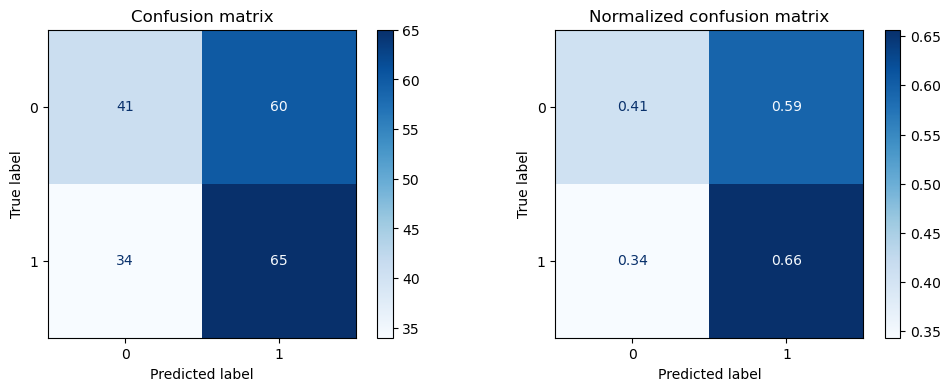

In [249]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

In [250]:
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMClassifier


features, targets = pre_h_df_1.iloc[:, 1:], pre_h_df_1.iloc[:, 1]

parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, refit=True, return_train_score=True, n_jobs=-1)



In [251]:
g_lgbm.fit(X_train_over, y_train_over)

[LightGBM] [Info] Number of positive: 401, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 802, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [252]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.502539   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.514969   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.516242   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.521234   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.519977   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.512469   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.522477   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.512516   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.510008   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.503758   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.518742   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.513766   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.502508   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.502516   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.500016   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.510016   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.508750   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.500016   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.497516   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.497516   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.512523   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.503766   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.500016   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.500016   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.497516   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.511266   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.501266   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.501266   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.497516   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.495031   

    rank_test_score  
0                17  
1                 6  
2                 5  
3                 2  
4                 3  
5                10  
6                 1  
7                 9  
8                13  
9                16  
10                4  
11                7  
12               19  
13               18  
14               22  
15               12  
16               14  
17               22  
18               26  
19               26  
20                8  
21               15  
22               22  
23               22  
24               26  
25               11  
26               20  
27               20  
28               26  
29               30

In [253]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[47 54]
 [41 58]]
정확도: 0.5250, 정밀도: 0.5179, 재현율: 0.5859, F1: 0.5498, ROC-AUC: 0.5256
################################################################################


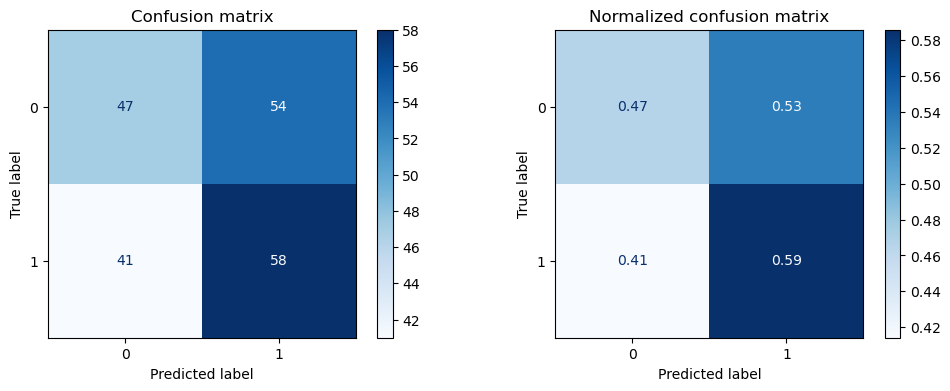

In [254]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

In [255]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.3]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(
    xgb,
    param_grid=parameters,
    cv=5,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

In [256]:
g_xgb.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [257]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params','mean_test_score','rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.1, 'n_estimators': 50}         0.505031   
1    {'learning_rate': 0.1, 'n_estimators': 60}         0.505023   
2    {'learning_rate': 0.1, 'n_estimators': 70}         0.501289   
3    {'learning_rate': 0.1, 'n_estimators': 80}         0.510023   
4    {'learning_rate': 0.1, 'n_estimators': 90}         0.510008   
5   {'learning_rate': 0.1, 'n_estimators': 100}         0.508789   
6    {'learning_rate': 0.2, 'n_estimators': 50}         0.510008   
7    {'learning_rate': 0.2, 'n_estimators': 60}         0.507539   
8    {'learning_rate': 0.2, 'n_estimators': 70}         0.515008   
9    {'learning_rate': 0.2, 'n_estimators': 80}         0.516258   
10   {'learning_rate': 0.2, 'n_estimators': 90}         0.523734   
11  {'learning_rate': 0.2, 'n_estimators': 100}         0.513758   
12   {'learning_rate': 0.3, 'n_estimators': 50}         0.515016   
13   {'learning_rate': 0.3, 'n_estimators': 60}         0.513773   
14   {'learning_rate': 0.3, 'n_estimators': 70}         0.508773   
15   {'learning_rate': 0.3, 'n_estimators': 80}         0.510023   
16   {'learning_rate': 0.3, 'n_estimators': 90}         0.508766   
17  {'learning_rate': 0.3, 'n_estimators': 100}         0.513742   

    rank_test_score  
0                16  
1                17  
2                18  
3                 8  
4                10  
5                12  
6                10  
7                15  
8                 4  
9                 2  
10                1  
11                6  
12                3  
13                5  
14               13  
15                8  
16               14  
17                7

In [258]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

오차 행렬
[[51 50]
 [49 50]]
정확도: 0.5050, 정밀도: 0.5000, 재현율: 0.5051, F1: 0.5025, ROC-AUC: 0.5050
################################################################################


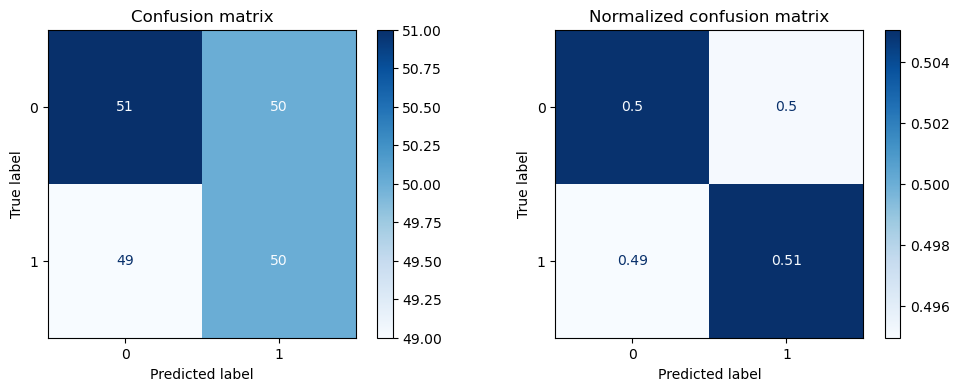

In [259]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

In [260]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svc_parameters = {'C': [0.1,1,10,100, 1000],
#                  'gamma': [0.001,0.01,0.1,1,10,100],
#                  'kernel': ['linear', 'rbf']}

# svc = SVC(probability=True)

# g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)


In [261]:
#g_svc.fit(X_train_over, y_train_over)

In [262]:
# result_df = pd.DataFrame(g_svc.cv_results_)[['params','mean_test_score','rank_test_score']]
# display(result_df)

In [263]:
# svc = g_svc.best_estimator_
# svc_prediction = svc.predict(X_test)

In [264]:
# get_evaluation(y_test, svc_prediction, svc, X_test)

In [265]:
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0            1.094567                  1.002012   
1           0                 0            1.066398                  1.100604   
2           0                 0            1.086519                  1.088531   
3           1                 1            1.066398                  1.100604   
4           0                 0            1.100604                  1.100604   
..        ...               ...                 ...                       ...   
994         1                 0            1.100604                  1.118712   
995         1                 1            1.094567                  1.100604   
996         0                 1            1.110664                  1.106640   
997         0                 1            1.088531                  1.080483   
998         1                 1            1.100604                  1.084507   

     Nutritional Deficiencies   Stress  Age  Poor Hair Care Habits   \
0                     1.092555       2   19                       1   
1                     1.092555       0   43                       1   
2                     1.094567       2   26                       1   
3                     1.092555       2   46                       1   
4                     1.080483       2   30                       0   
..                         ...     ...  ...                     ...   
994                   1.102616       1   33                       1   
995                   1.094567       1   47                       0   
996                   1.094567       2   20                       1   
997                   1.092555       2   32                       1   
998                   1.104628       1   34                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Total_Score  
0                        1        0             0          0    27.189134  
1                        1        0             0          0    48.259557  
2                        1        0             1          0    34.269617  
3                        1        0             0          0    55.259557  
4                        1        1             0          1    37.281691  
..                     ...      ...           ...        ...          ...  
994                      1        1             1          1    42.321932  
995                      0        0             1          0    54.289738  
996                      0        1             1          1    29.311871  
997                      1        1             1          1    42.261569  
998                      1        0             0          1    41.289739  

[999 rows x 13 columns]

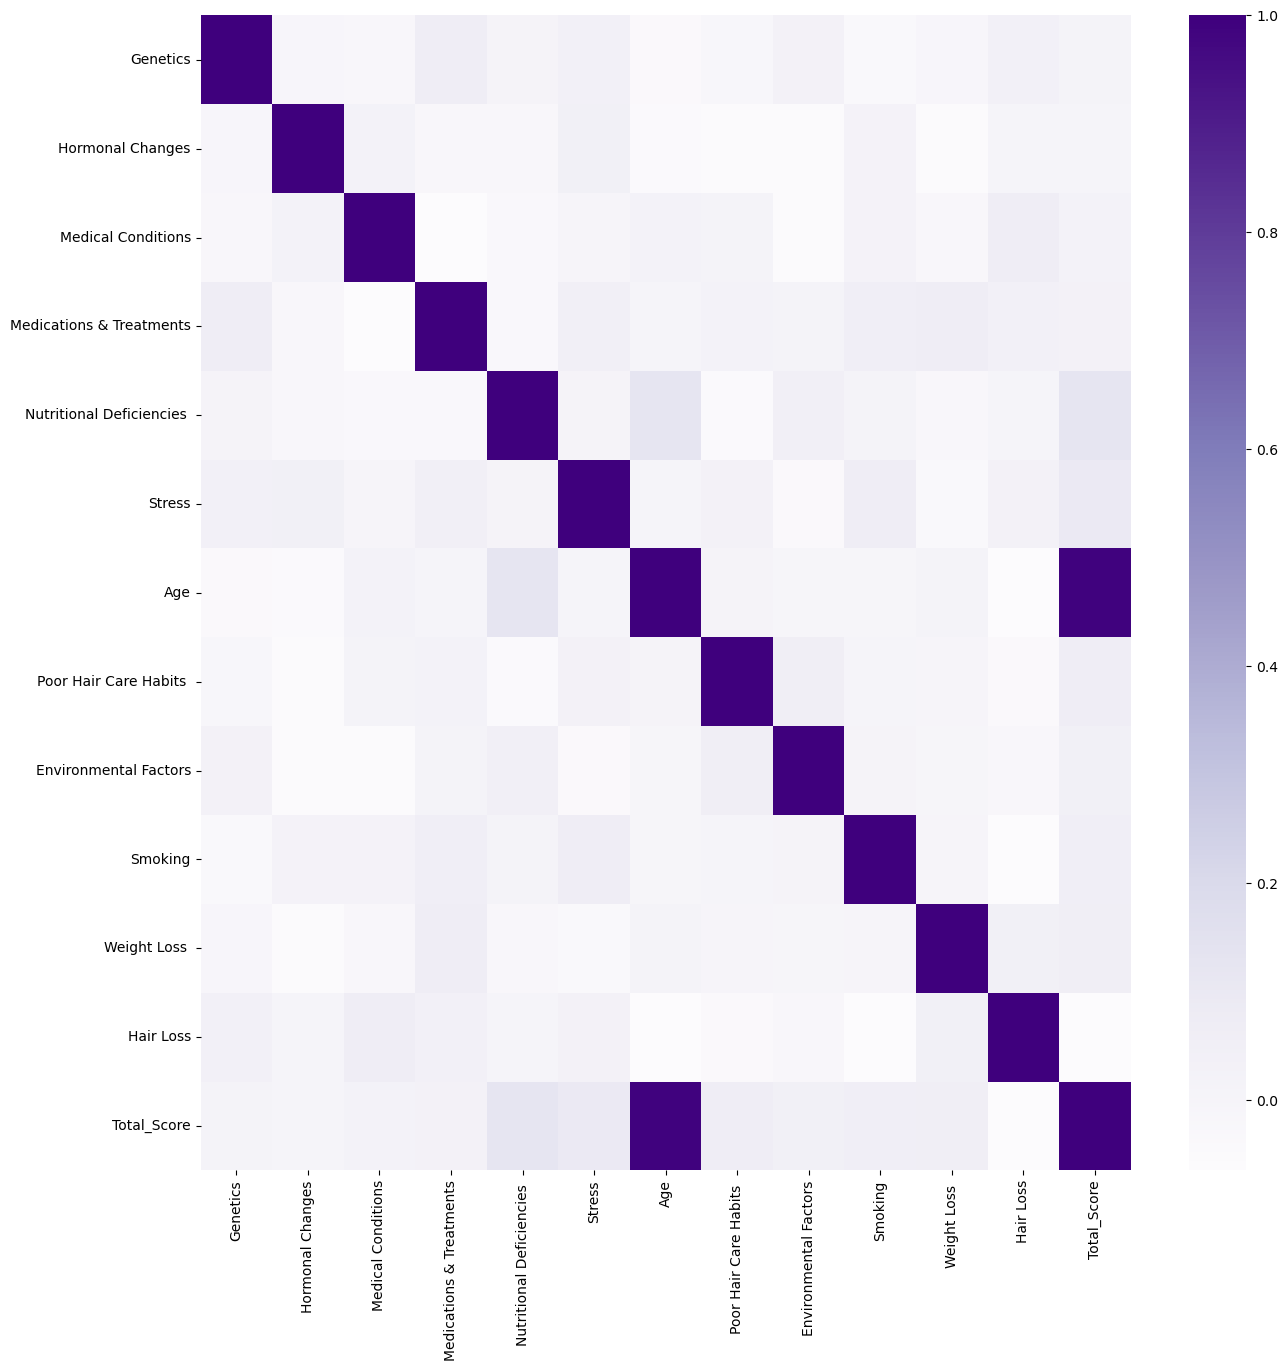

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = pre_h_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='Purples')
plt.show()

In [267]:
corr['Hair Loss'].sort_values(ascending=False)

Hair Loss                    1.000000
Medical Conditions           0.064381
Weight Loss                  0.044838
Medications & Treatments     0.043111
Genetics                     0.041309
Stress                       0.027052
Nutritional Deficiencies     0.008508
Hormonal Changes             0.007104
Environmental Factors       -0.018937
Poor Hair Care Habits       -0.039119
Smoking                     -0.056906
Total_Score                 -0.060505
Age                         -0.062481
Name: Hair Loss, dtype: float64

array([[<Axes: title={'center': 'Hair Loss'}>,
        <Axes: title={'center': 'Total_Score'}>]], dtype=object)

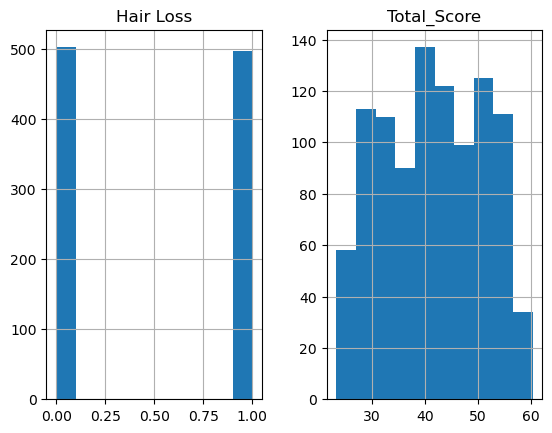

In [268]:
pre_h_df_1.hist()

In [271]:
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0            1.094567                  1.002012   
1           0                 0            1.066398                  1.100604   
2           0                 0            1.086519                  1.088531   
3           1                 1            1.066398                  1.100604   
4           0                 0            1.100604                  1.100604   
..        ...               ...                 ...                       ...   
994         1                 0            1.100604                  1.118712   
995         1                 1            1.094567                  1.100604   
996         0                 1            1.110664                  1.106640   
997         0                 1            1.088531                  1.080483   
998         1                 1            1.100604                  1.084507   

     Nutritional Deficiencies   Stress  Age  Poor Hair Care Habits   \
0                     1.092555       2   19                       1   
1                     1.092555       0   43                       1   
2                     1.094567       2   26                       1   
3                     1.092555       2   46                       1   
4                     1.080483       2   30                       0   
..                         ...     ...  ...                     ...   
994                   1.102616       1   33                       1   
995                   1.094567       1   47                       0   
996                   1.094567       2   20                       1   
997                   1.092555       2   32                       1   
998                   1.104628       1   34                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Total_Score  
0                        1        0             0          0    27.189134  
1                        1        0             0          0    48.259557  
2                        1        0             1          0    34.269617  
3                        1        0             0          0    55.259557  
4                        1        1             0          1    37.281691  
..                     ...      ...           ...        ...          ...  
994                      1        1             1          1    42.321932  
995                      0        0             1          0    54.289738  
996                      0        1             1          1    29.311871  
997                      1        1             1          1    42.261569  
998                      1        0             0          1    41.289739  

[999 rows x 13 columns]

In [274]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:, :-2], pre_h_df.iloc[:, -2]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              Hair Loss   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.501
Method:                 Least Squares   F-statistic:                              92.02
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                   5.87e-143
Time:                        16:50:10   Log-Likelihood:                         -716.49
No. Observations:                 999   AIC:                                      1455.
Df Residuals:                     988   BIC:                                      1509.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [276]:
get_vif(features)

vif_score                    feature
0      2.113838                   Genetics
1      2.064916           Hormonal Changes
2   3576.260464         Medical Conditions
3   4810.358807   Medications & Treatments
4   6293.319967  Nutritional Deficiencies 
5      2.614505                     Stress
6     14.485391                        Age
7      1.991479     Poor Hair Care Habits 
8      2.065452      Environmental Factors
9      2.098681                    Smoking
10     1.913186               Weight Loss

1.3636, 0.5202 | -1.3358, -0.0033

In [277]:
pre_h_df['Medication'] = pre_h_df['Medical Conditions'] * 1.3636 + pre_h_df['Medications & Treatments'] * 0.5202 + 2

In [278]:
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0            1.094567                  1.002012   
1           0                 0            1.066398                  1.100604   
2           0                 0            1.086519                  1.088531   
3           1                 1            1.066398                  1.100604   
4           0                 0            1.100604                  1.100604   
..        ...               ...                 ...                       ...   
994         1                 0            1.100604                  1.118712   
995         1                 1            1.094567                  1.100604   
996         0                 1            1.110664                  1.106640   
997         0                 1            1.088531                  1.080483   
998         1                 1            1.100604                  1.084507   

     Nutritional Deficiencies   Stress  Age  Poor Hair Care Habits   \
0                     1.092555       2   19                       1   
1                     1.092555       0   43                       1   
2                     1.094567       2   26                       1   
3                     1.092555       2   46                       1   
4                     1.080483       2   30                       0   
..                         ...     ...  ...                     ...   
994                   1.102616       1   33                       1   
995                   1.094567       1   47                       0   
996                   1.094567       2   20                       1   
997                   1.092555       2   32                       1   
998                   1.104628       1   34                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Total_Score  \
0                        1        0             0          0    27.189134   
1                        1        0             0          0    48.259557   
2                        1        0             1          0    34.269617   
3                        1        0             0          0    55.259557   
4                        1        1             0          1    37.281691   
..                     ...      ...           ...        ...          ...   
994                      1        1             1          1    42.321932   
995                      0        0             1          0    54.289738   
996                      0        1             1          1    29.311871   
997                      1        1             1          1    42.261569   
998                      1        0             0          1    41.289739   

     Medication  
0      4.013798  
1      4.026675  
2      4.047831  
3      4.026675  
4      4.073318  
..          ...  
994    4.082738  
995    4.065086  
996    4.090176  
997    4.046388  
998    4.064944  

[999 rows x 14 columns]

In [279]:
pre_h_df['Age & Nutrition_Defic'] = pre_h_df['Age'] * -0.0033 + pre_h_df['Nutritional Deficiencies '] * -1.3358 + 2

In [280]:
pre_h_df

Genetics  Hormonal Changes  Medical Conditions  Medications & Treatments  \
0           1                 0            1.094567                  1.002012   
1           0                 0            1.066398                  1.100604   
2           0                 0            1.086519                  1.088531   
3           1                 1            1.066398                  1.100604   
4           0                 0            1.100604                  1.100604   
..        ...               ...                 ...                       ...   
994         1                 0            1.100604                  1.118712   
995         1                 1            1.094567                  1.100604   
996         0                 1            1.110664                  1.106640   
997         0                 1            1.088531                  1.080483   
998         1                 1            1.100604                  1.084507   

     Nutritional Deficiencies   Stress  Age  Poor Hair Care Habits   \
0                     1.092555       2   19                       1   
1                     1.092555       0   43                       1   
2                     1.094567       2   26                       1   
3                     1.092555       2   46                       1   
4                     1.080483       2   30                       0   
..                         ...     ...  ...                     ...   
994                   1.102616       1   33                       1   
995                   1.094567       1   47                       0   
996                   1.094567       2   20                       1   
997                   1.092555       2   32                       1   
998                   1.104628       1   34                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Total_Score  \
0                        1        0             0          0    27.189134   
1                        1        0             0          0    48.259557   
2                        1        0             1          0    34.269617   
3                        1        0             0          0    55.259557   
4                        1        1             0          1    37.281691   
..                     ...      ...           ...        ...          ...   
994                      1        1             1          1    42.321932   
995                      0        0             1          0    54.289738   
996                      0        1             1          1    29.311871   
997                      1        1             1          1    42.261569   
998                      1        0             0          1    41.289739   

     Medication  Age & Nutrition_Defic  
0      4.013798               0.477865  
1      4.026675               0.398665  
2      4.047831               0.452077  
3      4.026675               0.388765  
4      4.073318               0.457691  
..          ...                    ...  
994    4.082738               0.418226  
995    4.065086               0.382777  
996    4.090176               0.471877  
997    4.046388               0.434965  
998    4.064944               0.412238  

[999 rows x 15 columns]

In [282]:
pre_h_df = pre_h_df.drop(labels=['Age','Nutritional Deficiencies ', 'Medical Conditions' , 'Medications & Treatments'], axis=1)
pre_h_df

Genetics  Hormonal Changes  Stress  Poor Hair Care Habits   \
0           1                 0       2                       1   
1           0                 0       0                       1   
2           0                 0       2                       1   
3           1                 1       2                       1   
4           0                 0       2                       0   
..        ...               ...     ...                     ...   
994         1                 0       1                       1   
995         1                 1       1                       0   
996         0                 1       2                       1   
997         0                 1       2                       1   
998         1                 1       1                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Total_Score  \
0                        1        0             0          0    27.189134   
1                        1        0             0          0    48.259557   
2                        1        0             1          0    34.269617   
3                        1        0             0          0    55.259557   
4                        1        1             0          1    37.281691   
..                     ...      ...           ...        ...          ...   
994                      1        1             1          1    42.321932   
995                      0        0             1          0    54.289738   
996                      0        1             1          1    29.311871   
997                      1        1             1          1    42.261569   
998                      1        0             0          1    41.289739   

     Medication  Age & Nutrition_Defic  
0      4.013798               0.477865  
1      4.026675               0.398665  
2      4.047831               0.452077  
3      4.026675               0.388765  
4      4.073318               0.457691  
..          ...                    ...  
994    4.082738               0.418226  
995    4.065086               0.382777  
996    4.090176               0.471877  
997    4.046388               0.434965  
998    4.064944               0.412238  

[999 rows x 11 columns]

In [284]:
pre_h_df = pre_h_df.drop(labels=['Total_Score'], axis=1)
pre_h_df

Genetics  Hormonal Changes  Stress  Poor Hair Care Habits   \
0           1                 0       2                       1   
1           0                 0       0                       1   
2           0                 0       2                       1   
3           1                 1       2                       1   
4           0                 0       2                       0   
..        ...               ...     ...                     ...   
994         1                 0       1                       1   
995         1                 1       1                       0   
996         0                 1       2                       1   
997         0                 1       2                       1   
998         1                 1       1                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Medication  \
0                        1        0             0          0    4.013798   
1                        1        0             0          0    4.026675   
2                        1        0             1          0    4.047831   
3                        1        0             0          0    4.026675   
4                        1        1             0          1    4.073318   
..                     ...      ...           ...        ...         ...   
994                      1        1             1          1    4.082738   
995                      0        0             1          0    4.065086   
996                      0        1             1          1    4.090176   
997                      1        1             1          1    4.046388   
998                      1        0             0          1    4.064944   

     Age & Nutrition_Defic  
0                 0.477865  
1                 0.398665  
2                 0.452077  
3                 0.388765  
4                 0.457691  
..                     ...  
994               0.418226  
995               0.382777  
996               0.471877  
997               0.434965  
998               0.412238  

[999 rows x 10 columns]

-0.0399 -0.0124 -0.0593 0.0462

In [288]:
pre_h_df['External_Factors'] = pre_h_df['Weight Loss '] * 0.0462 + 1 + pre_h_df['Poor Hair Care Habits '] * -0.0399 + 1 + \
pre_h_df['Environmental Factors'] * -0.0124 + 1 + pre_h_df['Smoking'] * -0.0593 + 1

In [289]:
pre_h_df

Genetics  Hormonal Changes  Stress  Poor Hair Care Habits   \
0           1                 0       2                       1   
1           0                 0       0                       1   
2           0                 0       2                       1   
3           1                 1       2                       1   
4           0                 0       2                       0   
..        ...               ...     ...                     ...   
994         1                 0       1                       1   
995         1                 1       1                       0   
996         0                 1       2                       1   
997         0                 1       2                       1   
998         1                 1       1                       0   

     Environmental Factors  Smoking  Weight Loss   Hair Loss  Medication  \
0                        1        0             0          0    4.013798   
1                        1        0             0          0    4.026675   
2                        1        0             1          0    4.047831   
3                        1        0             0          0    4.026675   
4                        1        1             0          1    4.073318   
..                     ...      ...           ...        ...         ...   
994                      1        1             1          1    4.082738   
995                      0        0             1          0    4.065086   
996                      0        1             1          1    4.090176   
997                      1        1             1          1    4.046388   
998                      1        0             0          1    4.064944   

     Age & Nutrition_Defic  External_Factors  
0                 0.477865            3.9477  
1                 0.398665            3.9477  
2                 0.452077            3.9939  
3                 0.388765            3.9477  
4                 0.457691            3.9283  
..                     ...               ...  
994               0.418226            3.9346  
995               0.382777            4.0462  
996               0.471877            3.9470  
997               0.434965            3.9346  
998               0.412238            3.9876  

[999 rows x 11 columns]

In [291]:
pre_h_df = pre_h_df.drop(labels=['Smoking', 'Poor Hair Care Habits ','Environmental Factors', 'Weight Loss '], axis=1)
pre_h_df

Genetics  Hormonal Changes  Stress  Hair Loss  Medication  \
0           1                 0       2          0    4.013798   
1           0                 0       0          0    4.026675   
2           0                 0       2          0    4.047831   
3           1                 1       2          0    4.026675   
4           0                 0       2          1    4.073318   
..        ...               ...     ...        ...         ...   
994         1                 0       1          1    4.082738   
995         1                 1       1          0    4.065086   
996         0                 1       2          1    4.090176   
997         0                 1       2          1    4.046388   
998         1                 1       1          1    4.064944   

     Age & Nutrition_Defic  External_Factors  
0                 0.477865            3.9477  
1                 0.398665            3.9477  
2                 0.452077            3.9939  
3                 0.388765            3.9477  
4                 0.457691            3.9283  
..                     ...               ...  
994               0.418226            3.9346  
995               0.382777            4.0462  
996               0.471877            3.9470  
997               0.434965            3.9346  
998               0.412238            3.9876  

[999 rows x 7 columns]

In [292]:
pre_h_df['target'] = pre_h_df['Hair Loss']
pre_h_df =pre_h_df.drop(labels=['Hair Loss'], axis=1)
pre_h_df

Genetics  Hormonal Changes  Stress  Medication  Age & Nutrition_Defic  \
0           1                 0       2    4.013798               0.477865   
1           0                 0       0    4.026675               0.398665   
2           0                 0       2    4.047831               0.452077   
3           1                 1       2    4.026675               0.388765   
4           0                 0       2    4.073318               0.457691   
..        ...               ...     ...         ...                    ...   
994         1                 0       1    4.082738               0.418226   
995         1                 1       1    4.065086               0.382777   
996         0                 1       2    4.090176               0.471877   
997         0                 1       2    4.046388               0.434965   
998         1                 1       1    4.064944               0.412238   

     External_Factors  target  
0              3.9477       0  
1              3.9477       0  
2              3.9939       0  
3              3.9477       0  
4              3.9283       1  
..                ...     ...  
994            3.9346       1  
995            4.0462       0  
996            3.9470       1  
997            3.9346       1  
998            3.9876       1  

[999 rows x 7 columns]

In [293]:
pre_h_df.corr()['target'].sort_values(ascending=False)[1:]

External_Factors         0.083508
Medication               0.075751
Age & Nutrition_Defic    0.052692
Genetics                 0.041309
Stress                   0.027052
Hormonal Changes         0.007104
Name: target, dtype: float64

<Axes: >

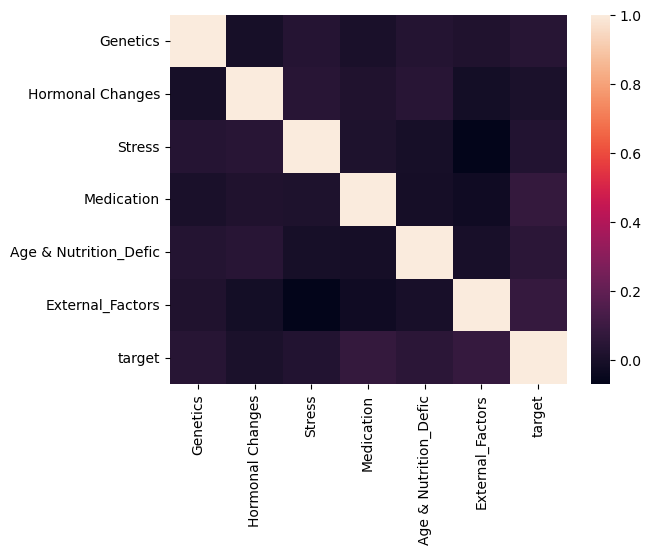

In [294]:
sns.heatmap(pre_h_df.corr())

In [295]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:,:-1], pre_h_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.501
Model:                            OLS   Adj. R-squared (uncentered):              0.498
Method:                 Least Squares   F-statistic:                              166.2
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                   3.92e-146
Time:                        17:23:39   Log-Likelihood:                         -721.54
No. Observations:                 999   AIC:                                      1455.
Df Residuals:                     993   BIC:                                      1485.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [296]:
get_vif(features)

vif_score                feature
0     2.100285               Genetics
1     2.048205       Hormonal Changes
2     2.600078                 Stress
3  6618.377410             Medication
4   153.503677  Age & Nutrition_Defic
5  6523.191075       External_Factors

In [299]:
get_vif(features.drop(labels=['Medication'], axis=1))

vif_score                feature
0    2.099982               Genetics
1    2.047334       Hormonal Changes
2    2.583340                 Stress
3  151.462799  Age & Nutrition_Defic
4  152.976214       External_Factors

In [300]:
get_vif(features.drop(labels=['External_Factors'], axis=1))

vif_score                feature
0    2.099440               Genetics
1    2.047704       Hormonal Changes
2    2.589027                 Stress
3  155.208441             Medication
4  153.305736  Age & Nutrition_Defic

In [301]:
get_vif(features.drop(labels=['Age & Nutrition_Defic'], axis=1))

vif_score           feature
0     2.098440          Genetics
1     2.043968  Hormonal Changes
2     2.599946            Stress
3  6530.384100        Medication
4  6514.779518  External_Factors

In [302]:
get_vif(features.drop(labels=['Medication', 'External_Factors'], axis=1))

vif_score                feature
0   2.093972               Genetics
1   2.045376       Hormonal Changes
2   2.561316                 Stress
3   4.470305  Age & Nutrition_Defic

array([[<Axes: title={'center': 'Genetics'}>,
        <Axes: title={'center': 'Hormonal Changes'}>,
        <Axes: title={'center': 'Stress'}>],
       [<Axes: title={'center': 'Medication'}>,
        <Axes: title={'center': 'Age & Nutrition_Defic'}>,
        <Axes: title={'center': 'External_Factors'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

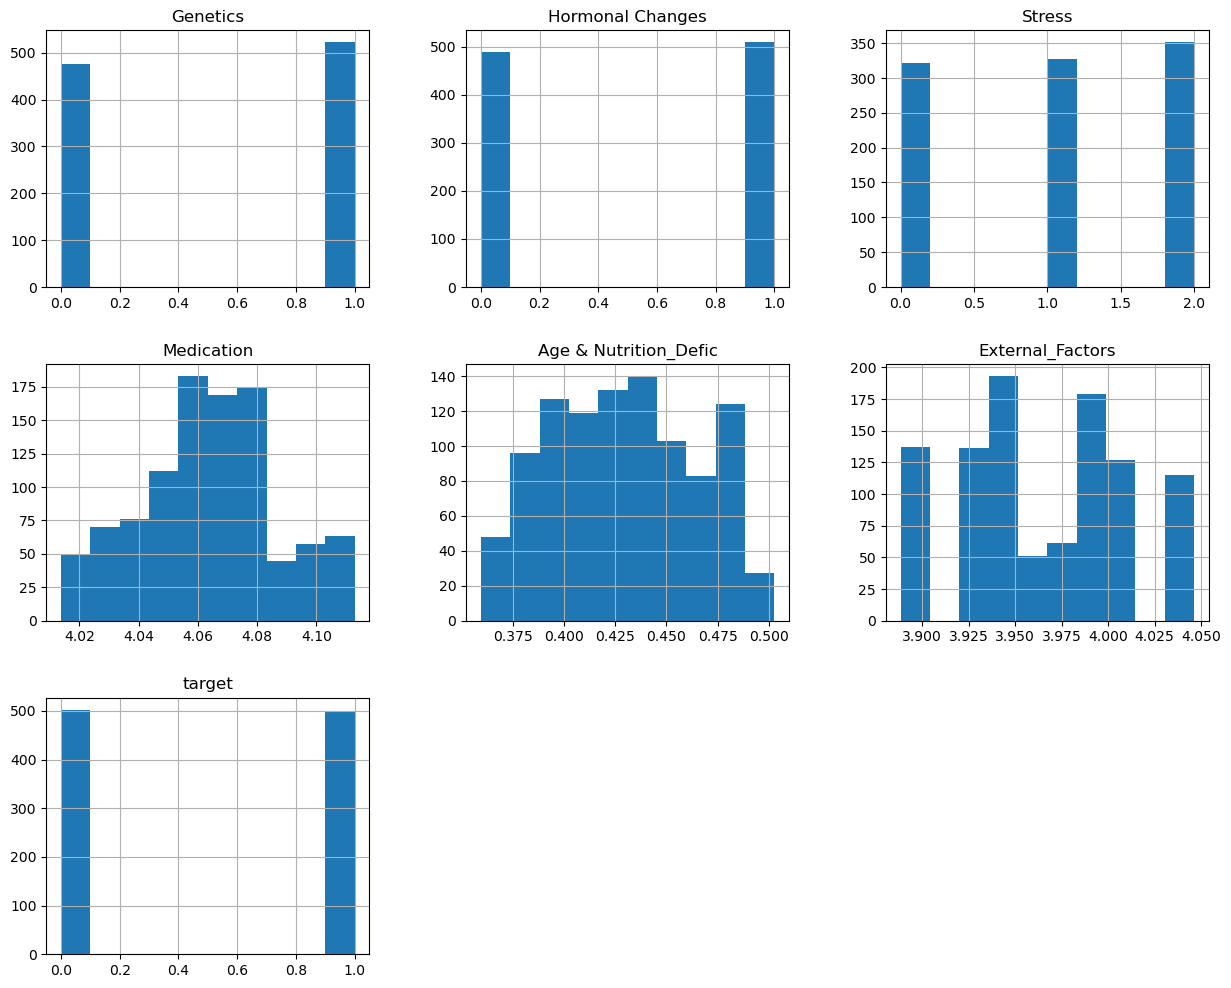

In [298]:
pre_h_df.hist(figsize=(15,12))

In [303]:
pre_h_df1 = pre_h_df.drop(labels=['Medication', 'External_Factors'], axis=1)
pre_h_df1

Genetics  Hormonal Changes  Stress  Age & Nutrition_Defic  target
0           1                 0       2               0.477865       0
1           0                 0       0               0.398665       0
2           0                 0       2               0.452077       0
3           1                 1       2               0.388765       0
4           0                 0       2               0.457691       1
..        ...               ...     ...                    ...     ...
994         1                 0       1               0.418226       1
995         1                 1       1               0.382777       0
996         0                 1       2               0.471877       1
997         0                 1       2               0.434965       1
998         1                 1       1               0.412238       1

[999 rows x 5 columns]

In [304]:
features, targets = pre_h_df1.iloc[:, :-1], pre_h_df1.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.500
Model:                            OLS   Adj. R-squared (uncentered):              0.498
Method:                 Least Squares   F-statistic:                              248.5
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                   5.38e-148
Time:                        17:28:44   Log-Likelihood:                         -722.78
No. Observations:                 999   AIC:                                      1454.
Df Residuals:                     995   BIC:                                      1473.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [305]:
get_vif(features)

vif_score                feature
0   2.093972               Genetics
1   2.045376       Hormonal Changes
2   2.561316                 Stress
3   4.470305  Age & Nutrition_Defic

array([[<Axes: title={'center': 'Genetics'}>,
        <Axes: title={'center': 'Hormonal Changes'}>],
       [<Axes: title={'center': 'Stress'}>,
        <Axes: title={'center': 'Age & Nutrition_Defic'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

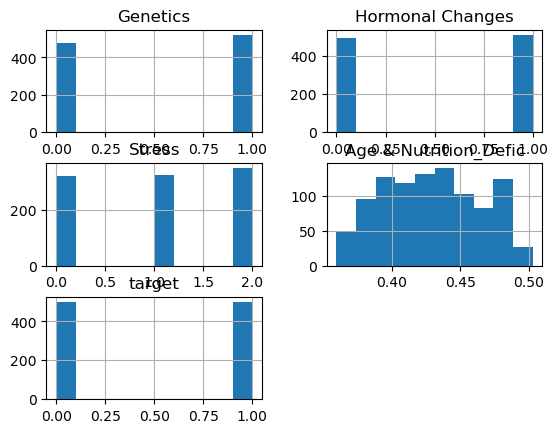

In [306]:
pre_h_df1.hist()

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.model_selection import train_test_split

features, targets = pre_h_df1.iloc[:, :-1], pre_h_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)

In [308]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2_Score = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
           .format(MSE, RMSE, MSLE, RMSLE, R2_Score))

In [309]:
get_evaluation(y_test, prediction)

MSE: 0.2476, RMSE: 0.4976, MSLE: 0.1201, RMSLE: 0.3465, R2: 0.0079


데이터 표본이 더 필요하다라고 결론 지을 수 있다.